In [1]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import pickle
from datetime import datetime
from datetime import timedelta

from scipy import stats
import statsmodels.api as sm

import seaborn as sns

# Estimated Occupancy
## Load raw estimated occupancy

In [2]:
PB_occupancy = pd.read_csv('./cleaned_occupancy_data/PB_occupancy.csv')
PLA_occupancy = pd.read_csv('./cleaned_occupancy_data/PLA_occupancy.csv')
SARA_occupancy = pd.read_csv('./cleaned_occupancy_data/SARA_occupancy.csv')
ACRA_occupancy = pd.read_csv('./cleaned_occupancy_data/ACRA_occupancy.csv')


## Sparse data
In raw estimated occupancy data, each data entry corresponds to around 111ms.

In [3]:
def sparse_estimated_occupancy(PB_occupancy, avg_point=600):
    point_num = int(np.ceil(len(PB_occupancy["Occupancy"])/avg_point))
    point_avg = []
    for i in range(point_num):
        if i == point_num:
            point_avg.append(PB_occupancy["Occupancy"][i*avg_point:].mean())
        else:
            point_avg.append(PB_occupancy["Occupancy"][i*avg_point: (i+1)*avg_point].mean())
    return np.array(point_avg)

avg_point=540 # 540 corresponds to 1 minute

point_avg_PB = sparse_estimated_occupancy(PB_occupancy, avg_point)
point_avg_PLA = sparse_estimated_occupancy(PLA_occupancy, avg_point)
point_avg_SARA = sparse_estimated_occupancy(SARA_occupancy, avg_point)
point_avg_ACRA = sparse_estimated_occupancy(ACRA_occupancy, avg_point)

sparsed_estimated_occupancy = {'PB': point_avg_PB, 'PLA': point_avg_PLA, 'SARA': point_avg_SARA, 'ACRA': point_avg_ACRA}
for i in sparsed_estimated_occupancy.keys():
    print('len of {}: {}'.format(i, len(sparsed_estimated_occupancy[i])))

len of PB: 648
len of PLA: 740
len of SARA: 203
len of ACRA: 179


In [4]:
print("point_avg_PB  : mean={0:.4f},   std = {1:.4f}".format(point_avg_PB.mean(),point_avg_PB.std()))
print("point_avg_PLA : mean={0:.4f},   std = {1:.4f}".format(point_avg_PLA.mean(),point_avg_PLA.std()))
print("point_avg_SARA: mean={0:.4f},   std = {1:.4f}".format(point_avg_SARA.mean(),point_avg_SARA.std()))
print("point_avg_ACRA: mean={0:.4f},   std = {1:.4f}".format(point_avg_ACRA.mean(),point_avg_ACRA.std()))

point_avg_PB  : mean=2.9623,   std = 2.3252
point_avg_PLA : mean=3.0709,   std = 2.6112
point_avg_SARA: mean=4.8023,   std = 3.3077
point_avg_ACRA: mean=2.2685,   std = 1.3781


## 1-way ANOVA
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

In [5]:
f_value, p_value = stats.f_oneway(point_avg_PB, point_avg_PLA, point_avg_SARA, point_avg_ACRA)
print('f_value={0:.4f}, p_value={1:.4f}'.format(f_value, p_value))

f_value=38.1896, p_value=0.0000


In [6]:
f_value, p_value = stats.f_oneway(point_avg_PB, point_avg_PLA)
print('f_value={0:.4f}, p_value={1:.4f}'.format(f_value, p_value))

f_value=0.6596, p_value=0.4168


## Kruskal-Wallis H-test for independent samples
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal

In [7]:
Kruskal_Wallis_H_statistic, p_value = stats.kruskal(point_avg_PB, point_avg_PLA, point_avg_SARA, point_avg_ACRA)
print('Kruskal_Wallis_H_statistic={0:.4f}, p_value={1:.4f}'.format(Kruskal_Wallis_H_statistic, p_value))

Kruskal_Wallis_H_statistic=76.2323, p_value=0.0000


In [8]:
Kruskal_Wallis_H_statistic, p_value = stats.kruskal(point_avg_PB, point_avg_PLA)
print('Kruskal_Wallis_H_statistic={0:.4f}, p_value={1:.4f}'.format(Kruskal_Wallis_H_statistic, p_value))

Kruskal_Wallis_H_statistic=0.0096, p_value=0.9220


## T-test
standard student test

In [9]:
t_PB_PLA, p_PB_PLA = stats.ttest_ind(point_avg_PB, point_avg_PLA)
t_PB_SARA, p_PB_SARA = stats.ttest_ind(point_avg_PB, point_avg_SARA)
t_PB_ACRA, p_PB_ACRA =stats.ttest_ind(point_avg_PB, point_avg_ACRA)
t_PLA_SARA, p_PLA_SARA =stats.ttest_ind(point_avg_PLA, point_avg_SARA)
t_PLA_ACRA, p_PLA_ACRA = stats.ttest_ind(point_avg_PLA, point_avg_ACRA)
t_SARA_ACRA, t_SARA_ACRA =stats.ttest_ind(point_avg_SARA, point_avg_ACRA)
print('t_PB_PLA={0:.4f}, p_PB_PLA={1:.4f}'.format(t_PB_PLA, p_PB_PLA))
print('t_PB_SARA={0:.4f}, p_PB_SARA={1:.4f}'.format(t_PB_SARA, p_PB_SARA))
print('t_PB_ACRA={0:.4f}, p_PB_ACRA={1:.4f}'.format(t_PB_ACRA, p_PB_ACRA))
print('t_PLA_SARA={0:.4f}, p_PLA_SARA={1:.4f}'.format(t_PLA_SARA, p_PLA_SARA))
print('t_PLA_ACRA={0:.4f}, p_PLA_ACRA={1:.4f}'.format(t_PLA_ACRA, p_PLA_ACRA))
print('t_SARA_ACRA={0:.4f}, t_SARA_ACRA={1:.4f}'.format(t_SARA_ACRA, t_SARA_ACRA))


t_PB_PLA=-0.8122, p_PB_PLA=0.4168
t_PB_SARA=-8.8100, p_PB_SARA=0.0000
t_PB_ACRA=3.8070, p_PB_ACRA=0.0002
t_PLA_SARA=-7.8640, p_PLA_SARA=0.0000
t_PLA_ACRA=3.9748, p_PLA_ACRA=0.0001
t_SARA_ACRA=0.0000, t_SARA_ACRA=0.0000


Welch’s t-test

In [10]:
t_PB_PLA, p_PB_PLA = stats.ttest_ind(point_avg_PB, point_avg_PLA, equal_var=False)
t_PB_SARA, p_PB_SARA = stats.ttest_ind(point_avg_PB, point_avg_SARA, equal_var=False)
t_PB_ACRA, p_PB_ACRA =stats.ttest_ind(point_avg_PB, point_avg_ACRA, equal_var=False)
t_PLA_SARA, p_PLA_SARA =stats.ttest_ind(point_avg_PLA, point_avg_SARA, equal_var=False)
t_PLA_ACRA, p_PLA_ACRA = stats.ttest_ind(point_avg_PLA, point_avg_ACRA, equal_var=False)
t_SARA_ACRA, t_SARA_ACRA =stats.ttest_ind(point_avg_SARA, point_avg_ACRA, equal_var=False)
print('t_PB_PLA={0:.4f}, p_PB_PLA={1:.4f}'.format(t_PB_PLA, p_PB_PLA))
print('t_PB_SARA={0:.4f}, p_PB_SARA={1:.4f}'.format(t_PB_SARA, p_PB_SARA))
print('t_PB_ACRA={0:.4f}, p_PB_ACRA={1:.4f}'.format(t_PB_ACRA, p_PB_ACRA))
print('t_PLA_SARA={0:.4f}, p_PLA_SARA={1:.4f}'.format(t_PLA_SARA, p_PLA_SARA))
print('t_PLA_ACRA={0:.4f}, p_PLA_ACRA={1:.4f}'.format(t_PLA_ACRA, p_PLA_ACRA))
print('t_SARA_ACRA={0:.4f}, t_SARA_ACRA={1:.4f}'.format(t_SARA_ACRA, t_SARA_ACRA))

t_PB_PLA=-0.8184, p_PB_PLA=0.4133
t_PB_SARA=-7.3588, p_PB_SARA=0.0000
t_PB_ACRA=5.0302, p_PB_ACRA=0.0000
t_PLA_SARA=-6.8771, p_PLA_SARA=0.0000
t_PLA_ACRA=5.6883, p_PLA_ACRA=0.0000
t_SARA_ACRA=0.0000, t_SARA_ACRA=0.0000


#### Mann–Whitney U test

In [194]:
stats.mannwhitneyu(point_avg_PB, point_avg_PLA, alternative='two-sided')

MannwhitneyuResult(statistic=239030.5, pvalue=0.9220508605125618)

In [196]:
stats.mannwhitneyu(point_avg_PB, point_avg_PLA)

MannwhitneyuResult(statistic=239030.5, pvalue=0.4610254302562809)

### Normaltiy test

In [95]:
print('\tD’Agostino and Pearson’s Test')
statistic_PB, pvalue_PB = stats.normaltest(point_avg_PB)
statistic_PLA, pvalue_PLA = stats.normaltest(point_avg_PLA)
print('\t\tPB Normality: statistic={}, pvalue={}'.format(statistic_PB, pvalue_PB))
print('\t\tPLA Normality: statistic={}, pvalue={}'.format(statistic_PLA, pvalue_PLA))

statistic_PB, pvalue_PB = stats.shapiro(point_avg_PB)
statistic_PLA, pvalue_PLA = stats.shapiro(point_avg_PB)
print('\tShapiro-Wilk Test')
print('\t\tPB Normality: statistic={}, pvalue={}'.format(statistic_PB, pvalue_PB))
print('\t\tPLA Normality: statistic={}, pvalue={}'.format(statistic_PLA, pvalue_PLA))

	D’Agostino and Pearson’s Test
		PB Normality: statistic=141.1820541971424, pvalue=2.2014380022972254e-31
		PLA Normality: statistic=212.14738397879285, pvalue=8.566055697431316e-47
	Shapiro-Wilk Test
		PB Normality: statistic=0.9025556445121765, pvalue=6.807398527043928e-20
		PLA Normality: statistic=0.9025556445121765, pvalue=6.807398527043928e-20


## Plot sparsed estimate occupancy

<IPython.core.display.Javascript object>


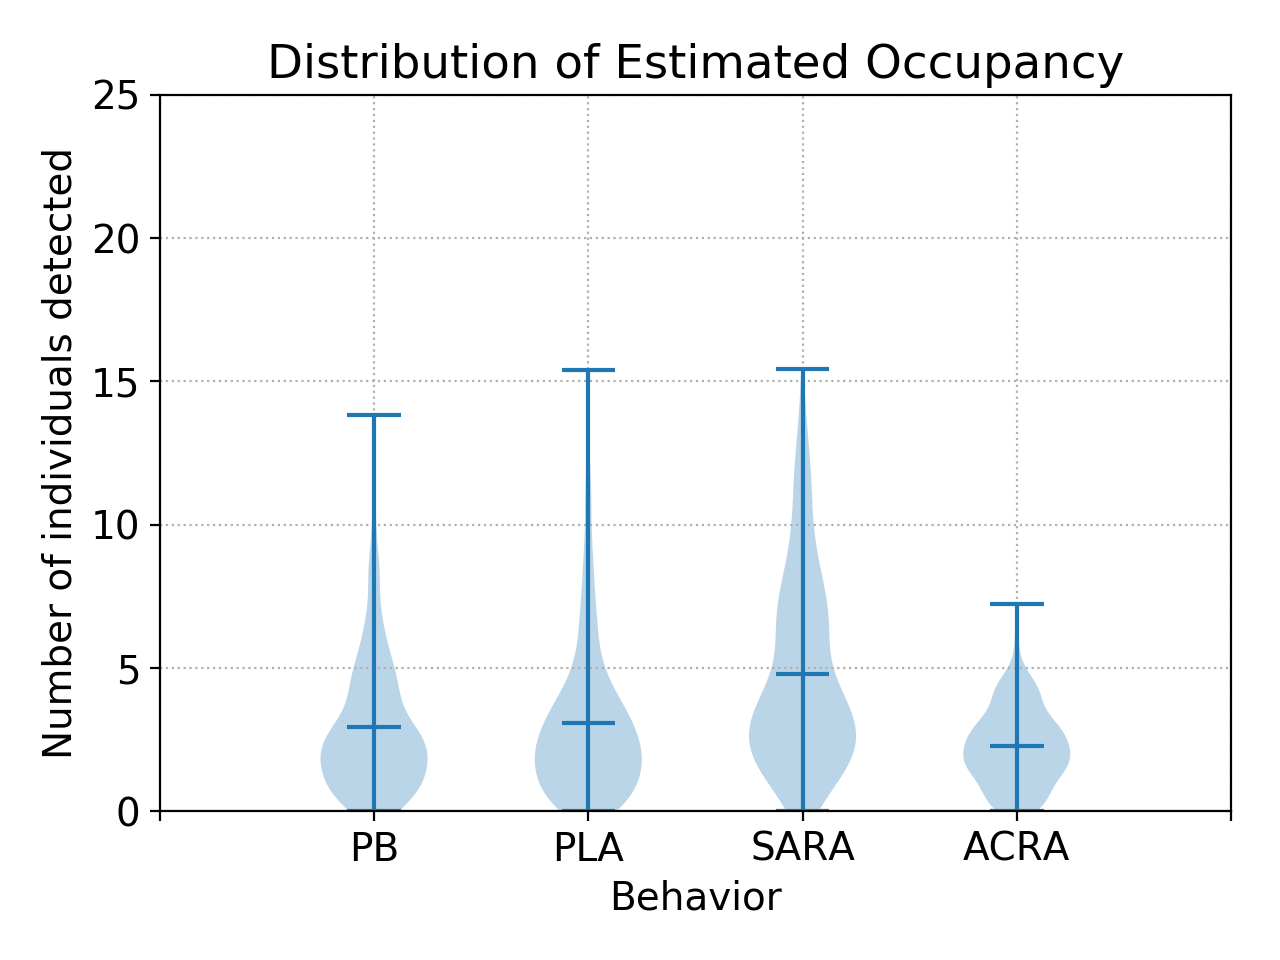

In [11]:
estimated_occupancy = [point_avg_PB, point_avg_PLA, 
                       point_avg_SARA, point_avg_ACRA]

plt.figure()
plt.rcParams.update({'font.size': 14})
plt.violinplot(estimated_occupancy, showmeans=True, showmedians=False)
plt.xticks(np.arange(0,6), ['','PB', 'PLA', 'SARA', 'ACRA'])
plt.ylim(0,25)
plt.ylabel('Number of individuals detected')
plt.xlabel('Behavior')
plt.title('Distribution of Estimated Occupancy')
plt.tight_layout()
plt.grid(True, linestyle=':')
plt.show()
plt.savefig('./figures/Distribution_of_Estimated_Occupancy_sparsed_data_point.png', dpi=300)


len_PB=648, len_PLA=740, len_SARA=203, len_ACRA=179


<IPython.core.display.Javascript object>


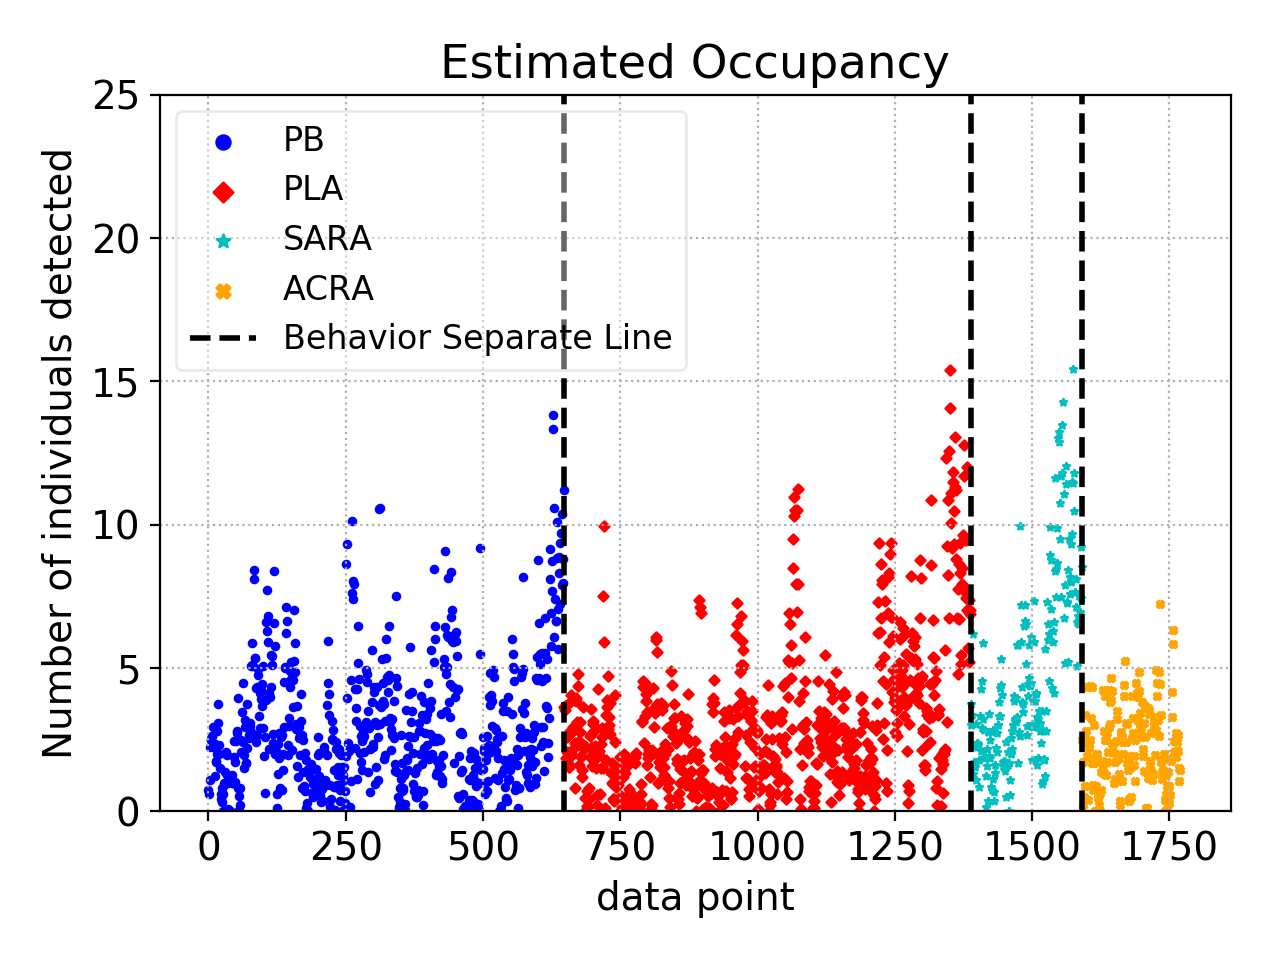

In [12]:
len_PB = len(point_avg_PB)
len_PLA = len(point_avg_PLA)
len_SARA = len(point_avg_SARA)
len_ACRA = len(point_avg_ACRA)
print('len_PB={}, len_PLA={}, len_SARA={}, len_ACRA={}'.format(len_PB, len_PLA, len_SARA, len_ACRA))

plt.figure()

handle_PB = plt.scatter(range(len_PB), point_avg_PB, c='b', marker='o', s = 6)
handle_PLA = plt.scatter(range(len_PB,len_PB+len_PLA), point_avg_PLA, c='r', marker='D', s = 6)
handle_SARA = plt.scatter(range(len_PB+len_PLA,len_PB+len_PLA+len_SARA), point_avg_SARA, c='c', marker='*', s = 6)
handle_ACRA = plt.scatter(range(len_PB+len_PLA+len_SARA,len_PB+len_PLA+len_SARA+len_ACRA), point_avg_ACRA, c='orange', marker='X', s = 6)

# plt.plot(range(len(Y)), predVals, 'r-', linewidth=3)

handle_separate_line = plt.axvline(x=len_PB, linestyle='--', color='black',linewidth=2)
plt.axvline(x=len_PB+len_PLA, linestyle='--', color='black',linewidth=2)
plt.axvline(x=len_PB+len_PLA+len_SARA, linestyle='--', color='black',linewidth=2)

plt.ylabel('Number of individuals detected')
plt.xlabel('data point')

plt.ylim(0,25)
plt.title('Estimated Occupancy')
plt.legend(handles=[handle_PB, handle_PLA, handle_SARA, handle_ACRA, handle_separate_line], 
           labels=['PB', 'PLA', 'SARA', 'ACRA', 'Behavior Separate Line'],fontsize=12, markerscale=2, framealpha=0.4)
plt.tight_layout()
plt.grid(True, linestyle=':')
plt.show()
plt.savefig('./figures/Estimated_occupancy_comparison_sparsed_data_point.png', dpi=300)

## Quantile Plot 

<IPython.core.display.Javascript object>


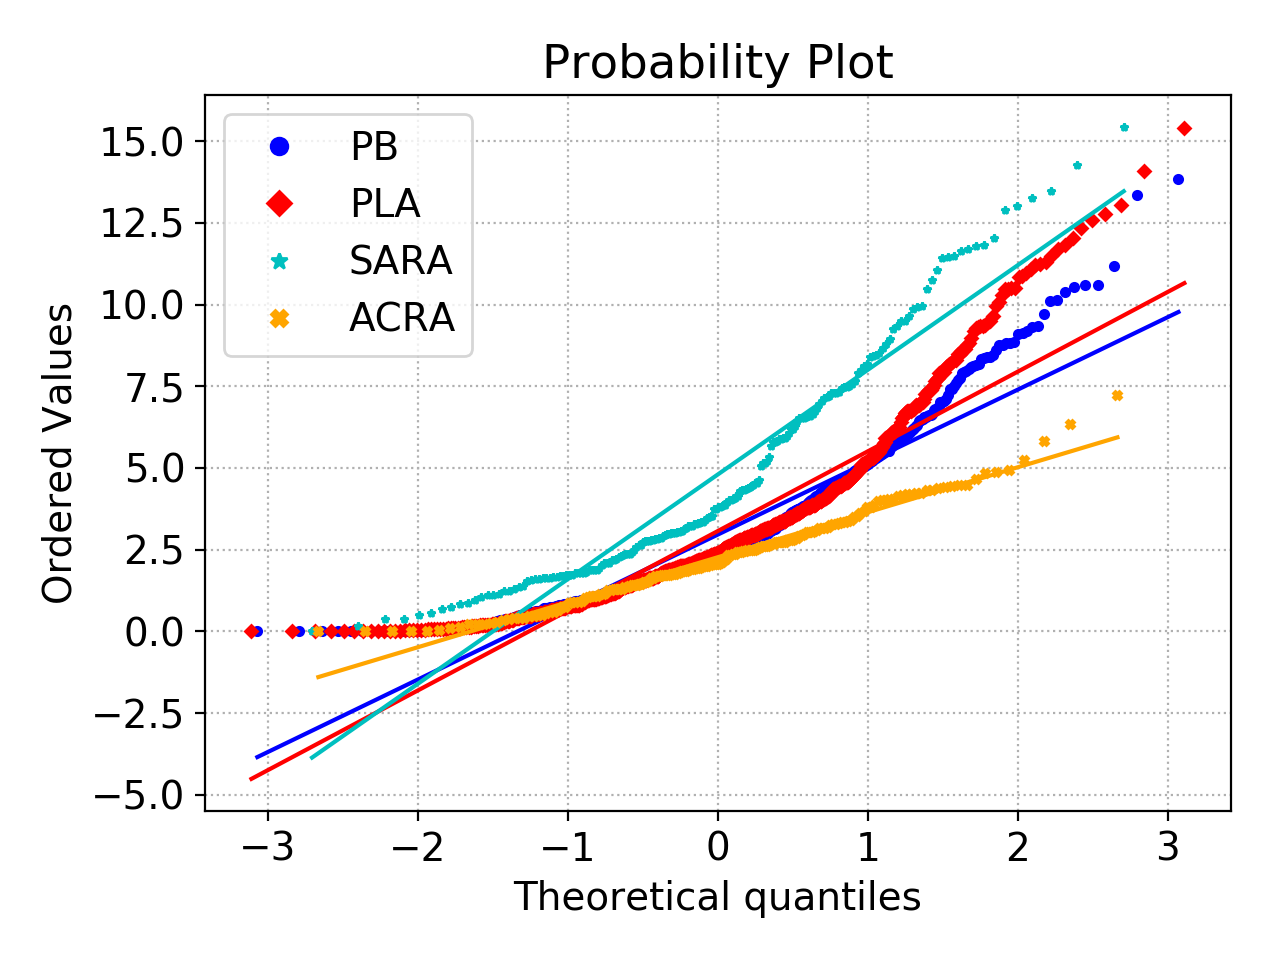

In [13]:
def quantile_plot(point_avg_PB, point_avg_PLA, point_avg_SARA, point_avg_ACRA):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    markersize = 3

    res = stats.probplot(point_avg_PB, plot=plt, fit=False)
    ax.get_lines()[0].set_marker('o')
    ax.get_lines()[0].set_markeredgecolor('b')
    ax.get_lines()[0].set_markerfacecolor('b')
    ax.get_lines()[0].set_markersize(markersize)
    ax.get_lines()[1].set_color('b')

    res = stats.probplot(point_avg_PLA, plot=plt, fit=False)
    ax.get_lines()[2].set_marker('D')
    ax.get_lines()[2].set_markeredgecolor('r')
    ax.get_lines()[2].set_markerfacecolor('r')
    ax.get_lines()[2].set_markersize(markersize)
    ax.get_lines()[3].set_color('r')

    res = stats.probplot(point_avg_SARA, plot=plt, fit=False)
    ax.get_lines()[4].set_marker('*')
    ax.get_lines()[4].set_markeredgecolor('c')
    ax.get_lines()[4].set_markerfacecolor('c')
    ax.get_lines()[4].set_markersize(markersize)
    ax.get_lines()[5].set_color('c')

    res = stats.probplot(point_avg_ACRA, plot=plt, fit=False)
    ax.get_lines()[6].set_marker('X')
    ax.get_lines()[6].set_markeredgecolor('orange')
    ax.get_lines()[6].set_markerfacecolor('orange')
    ax.get_lines()[6].set_markersize(markersize)
    ax.get_lines()[7].set_color('orange')

    plt.legend(handles=[ax.get_lines()[0],
                        ax.get_lines()[2],
                        ax.get_lines()[4],
                        ax.get_lines()[6]], labels=['PB', 'PLA', 'SARA', 'ACRA'], markerscale=2)
    plt.grid(True, linestyle=':')
    plt.tight_layout()
    plt.show()

quantile_plot(point_avg_PB, point_avg_PLA, point_avg_SARA, point_avg_ACRA)


## P-P Plot

<IPython.core.display.Javascript object>


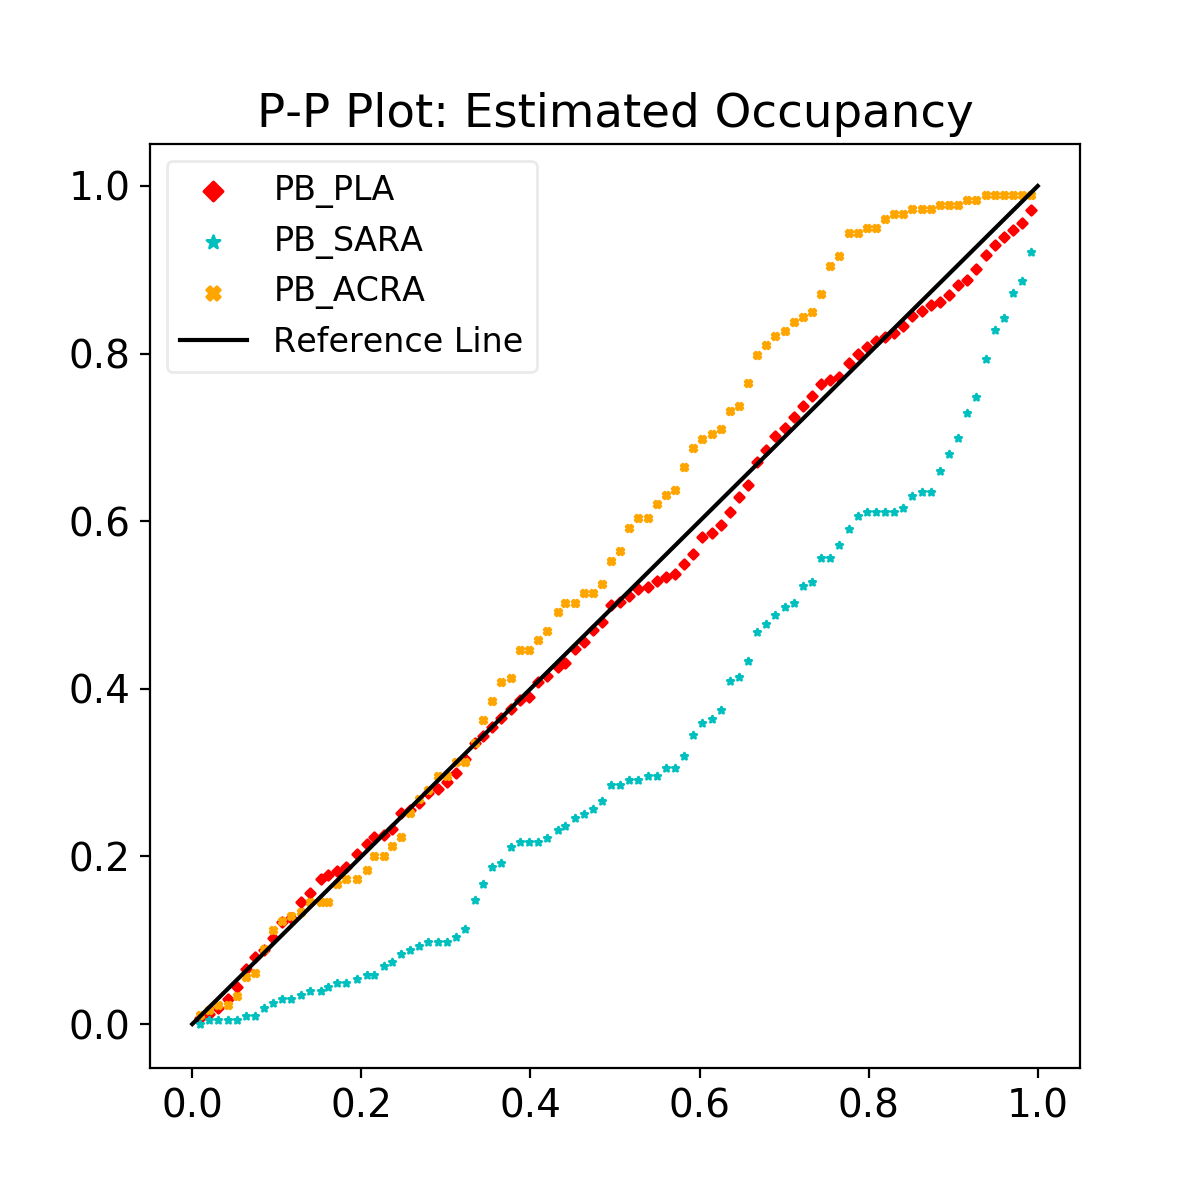

In [14]:
def pp_plot(point_avg_PB,point_avg_PLA,point_avg_SARA,point_avg_ACRA, title='Estimated Occupancy'):
    # Pick bins
    bins = 100
    
    boundaries = sorted(point_avg_PB)[::round(len(point_avg_PB)/bins)+1]
    labels = [(boundaries[i]+boundaries[i+1])/2 for i in range(len(boundaries)-1)]

    # Bin two series into equal bins
    PB_b = pd.cut(point_avg_PB, bins=boundaries, labels=labels,duplicates='drop')
    PLA_b = pd.cut(point_avg_PLA, bins=boundaries, labels=labels,duplicates='drop')
    SARA_b = pd.cut(point_avg_SARA, bins=boundaries, labels=labels,duplicates='drop')
    ACRA_b = pd.cut(point_avg_ACRA, bins=boundaries, labels=labels,duplicates='drop')
    
    # Get value counts for each bin and sort by bin
    PB_hist = PB_b.value_counts().sort_index(ascending=True)/len(PB_b)
    PLA_hist = PLA_b.value_counts().sort_index(ascending=True)/len(PLA_b)
    SARA_hist = SARA_b.value_counts().sort_index(ascending=True)/len(SARA_b)
    ACRA_hist = ACRA_b.value_counts().sort_index(ascending=True)/len(ACRA_b)

    # Make cumulative
    for ser in [PB_hist, PLA_hist,SARA_hist,ACRA_hist]:
        ttl = 0
        for idx, val in ser.iteritems():
            ttl += val
            ser.loc[idx] = ttl

    # Plot it
    fig, ax = plt.subplots(figsize=(6,6))
    handle_PB_PLA = ax.scatter(PB_hist, PLA_hist,c='r', marker='D', s = 6)
    handle_PB_SARA = ax.scatter(PB_hist, SARA_hist,c='c', marker='*', s = 6)
    handle_PB_ACRA = ax.scatter(PB_hist, ACRA_hist,c='orange', marker='X', s = 6)
    
    handle_reference_line, = ax.plot([0,1],[0,1],'k-')
    
    ax.legend(handles=[handle_PB_PLA, handle_PB_SARA, handle_PB_ACRA, handle_reference_line], 
               labels=['PB_PLA', 'PB_SARA', 'PB_ACRA', 'Reference Line'],
              fontsize=12, markerscale=2, framealpha=0.4)
    
    ax.set_title('P-P Plot: {}'.format(title))
    plt.show()

pp_plot(point_avg_PB,point_avg_PLA,point_avg_SARA,point_avg_ACRA, title='Estimated Occupancy')
    

## Q-Q Plot
qqplot only works on datasets with the same size.

In [15]:
# print(point_avg_PB.shape)
# print(point_avg_PLA.shape)

# pp_x = sm.ProbPlot(point_avg_PB, fit=True)
# pp_y = sm.ProbPlot(point_avg_PLA, fit=True)

# # # probability of exceedance
# # fig2 = pp_x.probplot(exceed=True)

# # compare x quantiles to y quantiles
# fig3 = pp_x.qqplot(other=pp_y, line='45')

# # # same as above with probabilities/percentiles
# # fig4 = pp_x.ppplot(other=pp_y, line='45')

In [16]:
a = np.linspace(0, 100, 101)
a

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

In [17]:
# print('{}_{}'.format(list('Estimated Occupancy'.split(' '))))

https://stackoverflow.com/questions/43285752/python-q-q-and-p-p-plot-of-two-distributions-of-unequal-length

2.481203703703704
2.4792407407407406
3.835555555555555
2.112185185185185


<IPython.core.display.Javascript object>


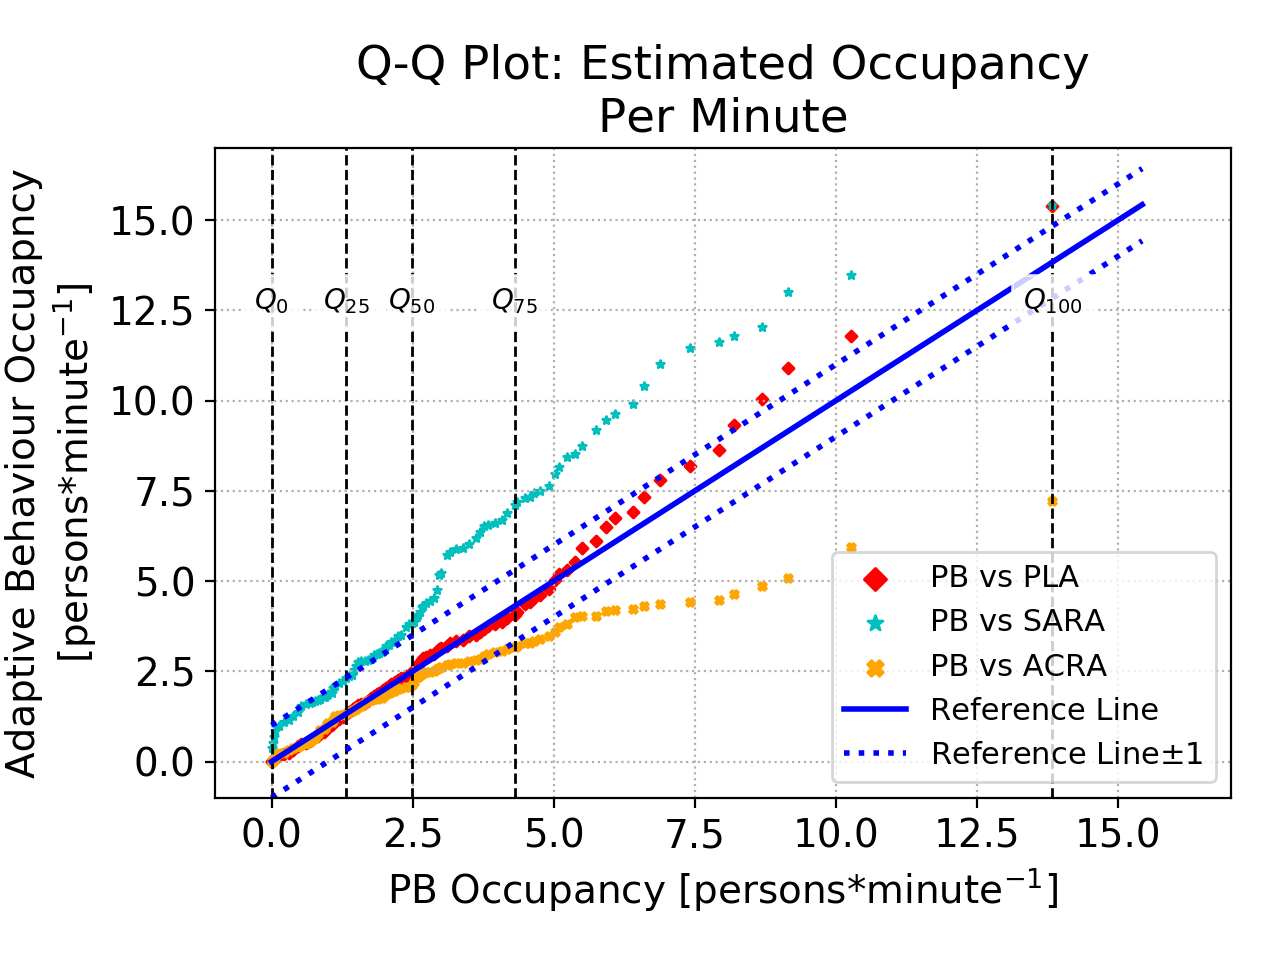

In [18]:
def qq_plot(point_avg_PB,point_avg_PLA,point_avg_SARA,point_avg_ACRA, 
            title='Estimated Occupancy', figname='', axis_lim = None, reference_line_boundary =None , 
            xlabel='PB', ylabel='Adaptive Behaviour'):
    q = np.arange(0,101,1)
    quantile_PB = np.percentile(point_avg_PB, q)
    quantile_PLA = np.percentile(point_avg_PLA, q)
    quantile_SARA = np.percentile(point_avg_SARA, q)
    quantile_ACRA = np.percentile(point_avg_ACRA, q)
    
    print(quantile_PB[51])
    print(quantile_PLA[51])
    print(quantile_SARA[51])
    print(quantile_ACRA[51])
    
    fig, ax = plt.subplots()
    marker_size = 8
    linewidth = 2
    
    handle_PB_PLA = ax.scatter(quantile_PB, quantile_PLA, 
                               c='r', marker='D', s = marker_size)
    handle_PB_SARA = ax.scatter(quantile_PB, quantile_SARA, 
                                c='c', marker='*', s = marker_size)
    handle_PB_ACRA = ax.scatter(quantile_PB, quantile_ACRA, 
                                c='orange', marker='X', s = marker_size)
    hightlight_quantile = 95
    
    if axis_lim is None:
        x_y_lim = max(ax.get_ylim()[1], ax.get_xlim()[1])
        ax.set_xlim(right=x_y_lim)
        ax.set_ylim(top=x_y_lim)
    else:
        ax.set_xlim(axis_lim)
        ax.set_ylim(axis_lim)
    
    textstr = ['$Q_{0}$','$Q_{25}$','$Q_{50}$','$Q_{75}$','$Q_{100}$']
    q_line = [0, 26,51, 76, 100]
    text_y = [0.65,0.675,0.7,0.725,0.75]
    for i, q_v in enumerate(q_line):
        handle_separate_line=ax.axvline(x=quantile_PB[q_v], linestyle='--', color='black',linewidth=1)
        ax.text(quantile_PB[q_v], ax.get_ylim()[1]*(0.75),textstr[i],
            rotation=0, fontsize=10,horizontalalignment='center',verticalalignment='center',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    
    
    #Add a reference line
    maxval = max(np.sort(point_avg_PB)[-1],
                 np.sort(point_avg_PLA)[-1],
                 np.sort(point_avg_SARA)[-1],
                 np.sort(point_avg_ACRA)[-1])
    minval = min(np.sort(point_avg_PB)[0],
                 np.sort(point_avg_PLA)[0],
                 np.sort(point_avg_SARA)[0],
                 np.sort(point_avg_ACRA)[0])
    handle_reference_line, = ax.plot([minval,maxval],[minval,maxval],'b-',linewidth=linewidth)
    if reference_line_boundary is not None:
        handle_reference_line_up, = ax.plot([minval,maxval],[minval+reference_line_boundary,maxval+reference_line_boundary],'b:',linewidth=linewidth)
        handle_reference_line_bottom, = ax.plot([minval,maxval],[minval-reference_line_boundary,maxval-reference_line_boundary],'b:',linewidth=linewidth)

        ax.legend(handles=[handle_PB_PLA, handle_PB_SARA, handle_PB_ACRA, 
                           handle_reference_line,handle_reference_line_up], 
                  labels=['PB vs PLA', 'PB vs SARA', 'PB vs ACRA', 
                          'Reference Line', 'Reference Line$\pm$1'],
                  fontsize=11, markerscale=2, framealpha=0.8, loc='lower right')
    else:
        ax.legend(handles=[handle_PB_PLA, handle_PB_SARA, handle_PB_ACRA, 
                           handle_reference_line], 
                  labels=['PB vs PLA', 'PB vs SARA', 'PB vs ACRA', 
                          'Reference Line'],
                  fontsize=11, markerscale=2, framealpha=1, loc='lower right')
    ax.set_title('Q-Q Plot: {}'.format(title))
    
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    plt.tight_layout()
    plt.grid(True, linestyle=':')
    plt.savefig('./figures/qq_plot_{}.png'.format(figname), dpi=300)

qq_plot(point_avg_PB,point_avg_PLA,point_avg_SARA,point_avg_ACRA,
        title='Estimated Occupancy\nPer Minute', figname='Estimated_Occupancy', axis_lim = [-1,17], reference_line_boundary =1,
        xlabel='PB Occupancy [persons*minute$^{-1}$]',
        ylabel='Adaptive Behaviour Occuapncy\n[persons*minute$^{-1}$]')


In [186]:
def qq_plot_PB_PLA(point_avg_PB,point_avg_PLA,point_avg_SARA,point_avg_ACRA, 
            title='Estimated Occupancy', figname='', axis_lim = None, reference_line_boundary =None , 
            xlabel='PB', ylabel='Adaptive Behaviour'):
    q = np.arange(0,101,1)
    quantile_PB = np.percentile(point_avg_PB, q)
    quantile_PLA = np.percentile(point_avg_PLA, q)
    quantile_SARA = np.percentile(point_avg_SARA, q)
    quantile_ACRA = np.percentile(point_avg_ACRA, q)
    
    print('Quantile 50:')
    print('  PB:   {}'.format(quantile_PB[51]))
    print('  PLA:  {}'.format(quantile_PLA[51]))
    print('  SARA: {}'.format(quantile_SARA[51]))
    print('  ACRA: {}'.format(quantile_ACRA[51]))
    
    print('Quantile 75:')
    print('  PB:   {}'.format(quantile_PB[76]))
    print('  PLA:  {}'.format(quantile_PLA[76]))
    print('  SARA: {}'.format(quantile_SARA[76]))
    print('  ACRA: {}'.format(quantile_ACRA[76]))
    
    fig, ax = plt.subplots()
    marker_size = 8
    linewidth = 2
    
    handle_PB_PLA = ax.scatter(quantile_PB, quantile_PLA, 
                               c='r', marker='D', s = marker_size)
#     handle_PB_SARA = ax.scatter(quantile_PB, quantile_SARA, 
#                                 c='c', marker='*', s = marker_size)
#     handle_PB_ACRA = ax.scatter(quantile_PB, quantile_ACRA, 
#                                 c='orange', marker='X', s = marker_size)
    hightlight_quantile = 95
    
    if axis_lim is None:
        x_y_lim = max(ax.get_ylim()[1], ax.get_xlim()[1])
        ax.set_xlim(right=x_y_lim)
        ax.set_ylim(top=x_y_lim)
    else:
        ax.set_xlim(axis_lim)
        ax.set_ylim(axis_lim)
    
    textstr = ['$Q_{0}$','$Q_{25}$','$Q_{50}$','$Q_{75}$','$Q_{100}$']
    q_line = [0, 26,51, 76, 100]
    text_y = [0.65,0.675,0.7,0.725,0.75]
    for i, q_v in enumerate(q_line):
        handle_separate_line=ax.axvline(x=quantile_PB[q_v], linestyle='--', color='black',linewidth=1)
        ax.text(quantile_PB[q_v], ax.get_ylim()[1]*(0.75),textstr[i],
            rotation=0, fontsize=10,horizontalalignment='center',verticalalignment='center',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    
    
    #Add a reference line
    maxval = max(np.sort(point_avg_PB)[-1],
                 np.sort(point_avg_PLA)[-1])
    minval = min(np.sort(point_avg_PB)[0],
                 np.sort(point_avg_PLA)[0])
    handle_reference_line, = ax.plot([minval,maxval],[minval,maxval],'b-',linewidth=linewidth)
    if reference_line_boundary is not None:
        handle_reference_line_up, = ax.plot([minval,maxval],[minval+reference_line_boundary,maxval+reference_line_boundary],'b:',linewidth=linewidth)
        handle_reference_line_bottom, = ax.plot([minval,maxval],[minval-reference_line_boundary,maxval-reference_line_boundary],'b:',linewidth=linewidth)

        ax.legend(handles=[handle_PB_PLA,  
                           handle_reference_line,handle_reference_line_up], 
                  labels=['PB vs PLA', 
                          'Reference Line', 'Reference Line$\pm$1'],
                  fontsize=11, markerscale=2, framealpha=0.8, loc='lower right')
    else:
        ax.legend(handles=[handle_PB_PLA, 
                           handle_reference_line], 
                  labels=['PB vs PLA', 
                          'Reference Line'],
                  fontsize=11, markerscale=2, framealpha=1, loc='lower right')
    ax.set_title('Q-Q Plot: {}'.format(title))
    
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    plt.tight_layout()
    plt.grid(True, linestyle=':')
    plt.savefig('./figures/qq_plot_{}.png'.format(figname), dpi=300)


Quantile 50:
  PB:   2.481203703703704
  PLA:  2.4792407407407406
  SARA: 3.835555555555555
  ACRA: 2.112185185185185
Quantile 75:
  PB:   4.308148148148149
  PLA:  4.059259259259259
  SARA: 7.096222222222224
  ACRA: 3.1615555555555557


<IPython.core.display.Javascript object>


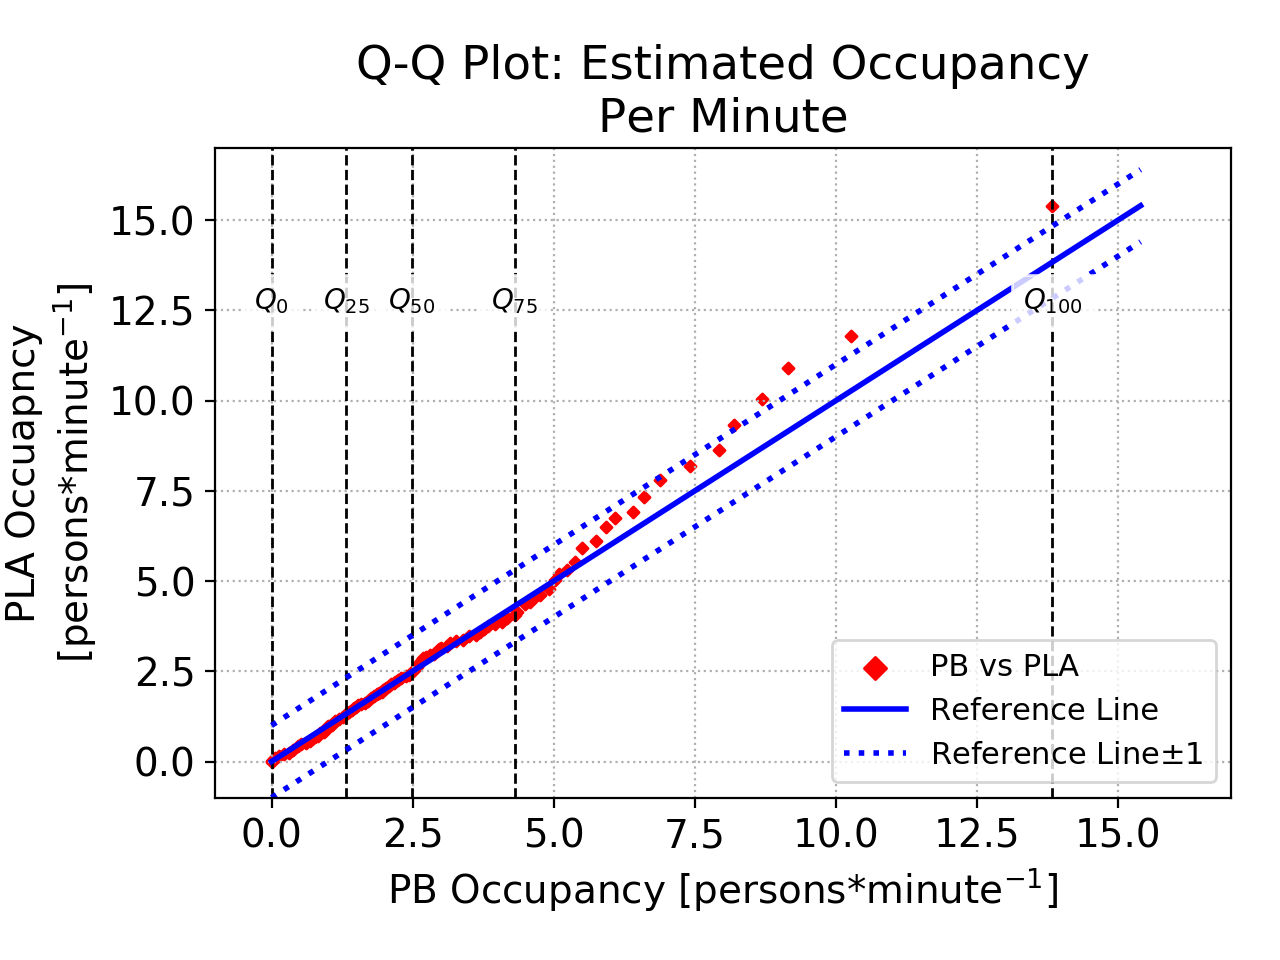

In [187]:
qq_plot_PB_PLA(point_avg_PB,point_avg_PLA,point_avg_SARA,point_avg_ACRA,
        title='Estimated Occupancy\nPer Minute', figname='Estimated_Occupancy', axis_lim = [-1,17], reference_line_boundary =1,
        xlabel='PB Occupancy [persons*minute$^{-1}$]',
        ylabel='PLA Occuapncy\n[persons*minute$^{-1}$]')

https://stackoverflow.com/questions/42658252/how-to-create-a-qq-plot-between-two-samples-of-different-size-in-python

In [22]:
print('PB: {}'.format(point_avg_PB.shape))
print('PLA: {}'.format(point_avg_PLA.shape))
print('SARA: {}'.format(point_avg_SARA.shape))
print('ACRA: {}'.format(point_avg_ACRA.shape))

PB: (648,)
PLA: (740,)
SARA: (203,)
ACRA: (179,)


In [23]:
# import numpy as np
# import pylab

# test1 = point_avg_PB
# test2 = point_avg_PLA

# #Calculate quantiles
# test1.sort()
# quantile_levels1 = np.arange(len(test1),dtype=float)/len(test1)

# test2.sort()
# quantile_levels2 = np.arange(len(test2),dtype=float)/len(test2)

# #Use the smaller set of quantile levels to create the plot
# quantile_levels = quantile_levels2

# #We already have the set of quantiles for the smaller data set
# quantiles2 = test2

# #We find the set of quantiles for the larger data set using linear interpolation
# quantiles1 = np.interp(quantile_levels,quantile_levels1,test1)

# plt.figure()
# #Plot the quantiles to create the qq plot
# plt.scatter(quantiles1,quantiles2, c='r', marker='D', s = 6)

# #Add a reference line
# maxval = max(test1[-1],test2[-1])
# minval = min(test1[0],test2[0])
# plt.plot([minval,maxval],[minval,maxval],'k-')

# plt.show()

## Average Estimated Occupancy

In [24]:
# print("point_avg_PB  : mean={},   std = {}".format(point_avg_PB.mean(),point_avg_PB.std()))
# print("point_avg_PLA : mean={},   std = {}".format(point_avg_PLA.mean(),point_avg_PLA.std()))
# print("point_avg_SARA: mean={},   std = {}".format(point_avg_SARA.mean(),point_avg_SARA.std()))
# print("point_avg_ACRA: mean={},   std = {}".format(point_avg_ACRA.mean(),point_avg_ACRA.std()))
# average_occupancy_estimate = [point_avg_PB.mean(), point_avg_PLA.mean(), point_avg_SARA.mean(), point_avg_ACRA.mean()]
# std_occuapncy = [point_avg_PB.std(), point_avg_PLA.std(), point_avg_SARA.std(), point_avg_ACRA.std()]

# plt.figure()
# plt.bar(np.arange(0,4), average_occupancy_estimate, yerr=std_occuapncy, capsize=10, color=(0.2, 0, 1, 0.6), width=0.4)
# plt.ylabel('Number of individuals detected')
# plt.xlabel('Behavior')
# plt.xticks(np.arange(0,4),['PB', 'PLA', 'SARA', 'ACRA'])
# plt.title('Average Estimated Occupancy')
# plt.grid(True, linestyle=':')
# plt.tight_layout()
# plt.savefig('./figures/Average_of_estimated_occupancy.png', dpi=300)

In [25]:
point_avg_PB.shape

(648,)

<IPython.core.display.Javascript object>


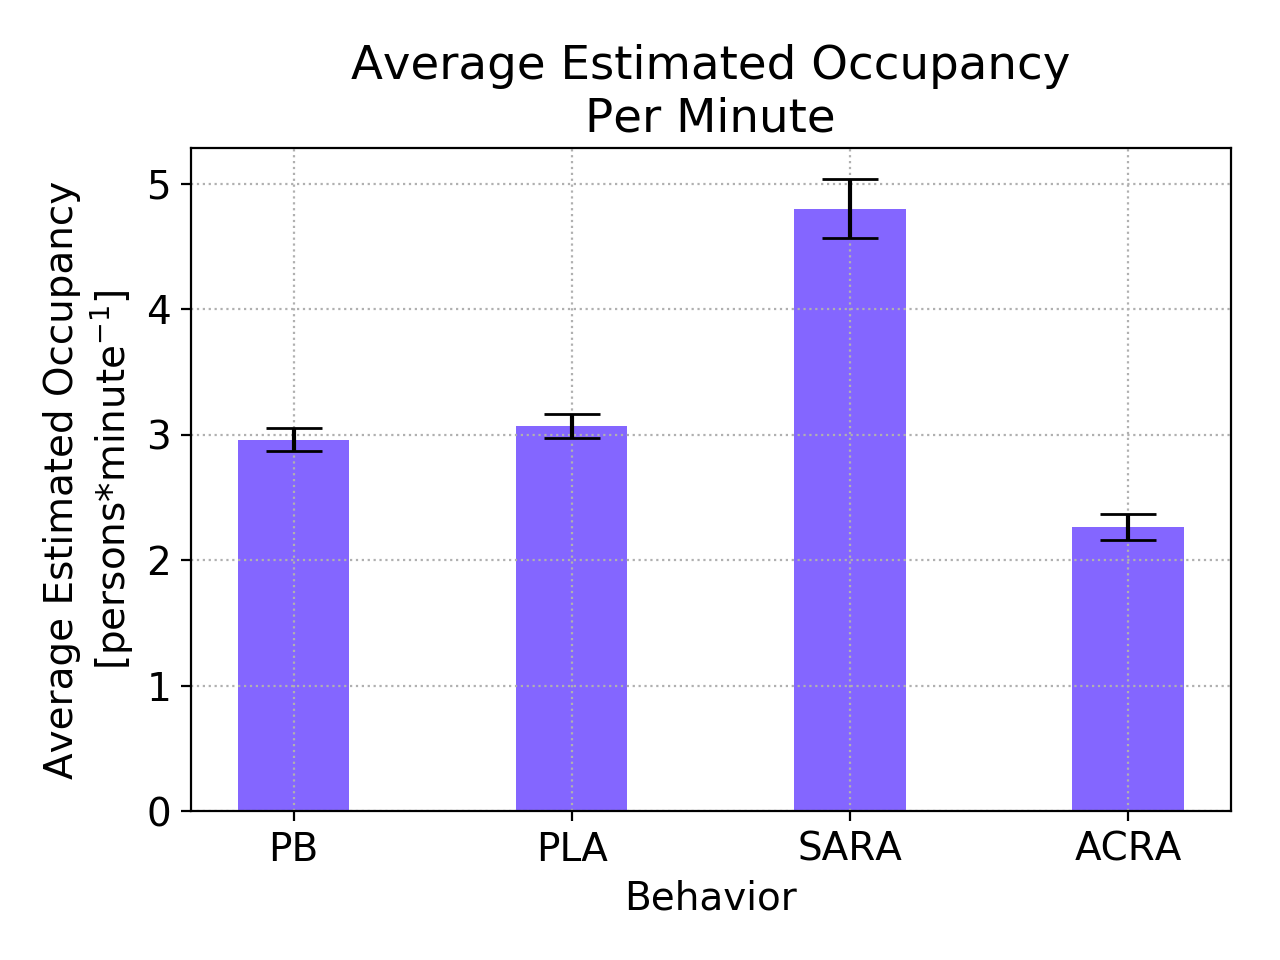

In [26]:
average_occupancy_estimate = [point_avg_PB.mean(), point_avg_PLA.mean(), point_avg_SARA.mean(), point_avg_ACRA.mean()]
SEM_occuapncy = [point_avg_PB.std()/np.sqrt(point_avg_PB.shape[0]), 
                 point_avg_PLA.std()/np.sqrt(point_avg_PLA.shape[0]), 
                 point_avg_SARA.std()/np.sqrt(point_avg_SARA.shape[0]), 
                 point_avg_ACRA.std()/np.sqrt(point_avg_ACRA.shape[0])]

plt.figure()
plt.bar(np.arange(0,4), average_occupancy_estimate, yerr=SEM_occuapncy, capsize=10, color=(0.2, 0, 1, 0.6), width=0.4)
plt.ylabel('Average Estimated Occupancy\n[persons*minute$^{-1}$]')
plt.xlabel('Behaviour')
plt.xticks(np.arange(0,4),['PB', 'PLA', 'SARA', 'ACRA'])
plt.title('Average Estimated Occupancy\nPer Minute')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.savefig('./figures/Average_Estimated_Occupancy.png', dpi=300)

<IPython.core.display.Javascript object>


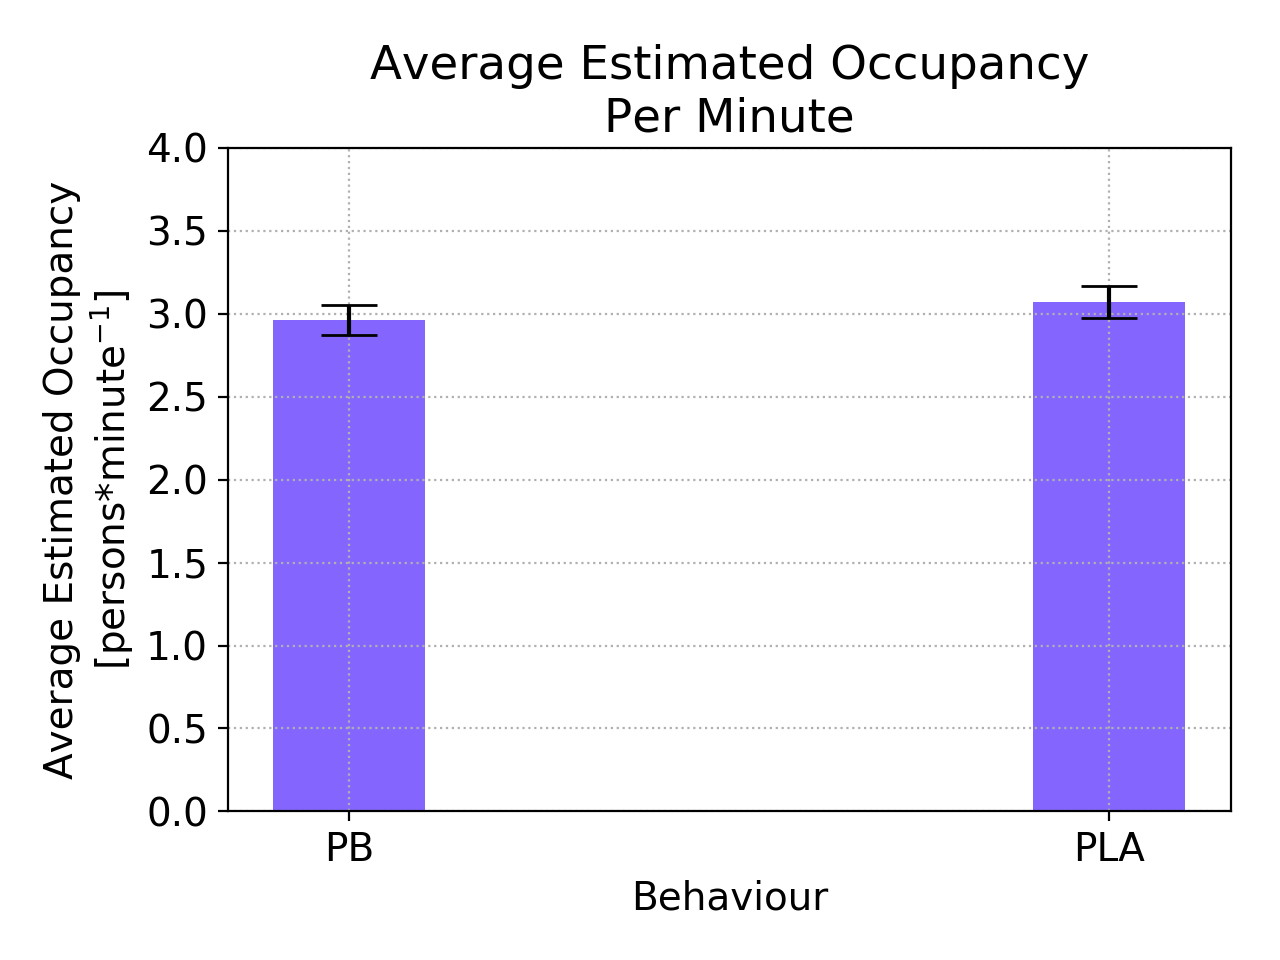

In [32]:
average_occupancy_estimate = [point_avg_PB.mean(), point_avg_PLA.mean()]
SEM_occuapncy = [point_avg_PB.std()/np.sqrt(point_avg_PB.shape[0]), 
                 point_avg_PLA.std()/np.sqrt(point_avg_PLA.shape[0])]

plt.figure()
plt.bar(np.arange(0,2), average_occupancy_estimate, yerr=SEM_occuapncy, 
        capsize=10, color=(0.2, 0, 1, 0.6), width=0.2)
plt.ylabel('Average Estimated Occupancy\n[persons*minute$^{-1}$]')
plt.xlabel('Behaviour')
plt.ylim(0,4)
plt.xticks(np.arange(0,2),['PB', 'PLA'])
plt.title('Average Estimated Occupancy\nPer Minute')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.savefig('./figures/Average_Estimated_Occupancy.png', dpi=300)

# Estimated Engagement Level
## Load data.

In [33]:
PB_raw_data = pd.read_csv('./cleaned_estimated_engagement_data/PB_estimated_engagement.csv')
PLA_raw_data = pd.read_csv('./cleaned_estimated_engagement_data/PLA_estimated_engagement.csv')
SARA_raw_data = pd.read_csv('./cleaned_estimated_engagement_data/SARA_estimated_engagement.csv')
ACRA_raw_data = pd.read_csv('./cleaned_estimated_engagement_data/ACRA_estimated_engagement.csv')

PB_estimated_engagement = PB_raw_data['reward_IR_distance'].astype(float).values
PLA_estimated_engagement = PLA_raw_data['reward_IR_distance'].astype(float).values
SARA_estimated_engagement = SARA_raw_data['reward_IR_distance'].astype(float).values
ACRA_estimated_engagement = ACRA_raw_data['reward_IR_distance'].astype(float).values

<IPython.core.display.Javascript object>


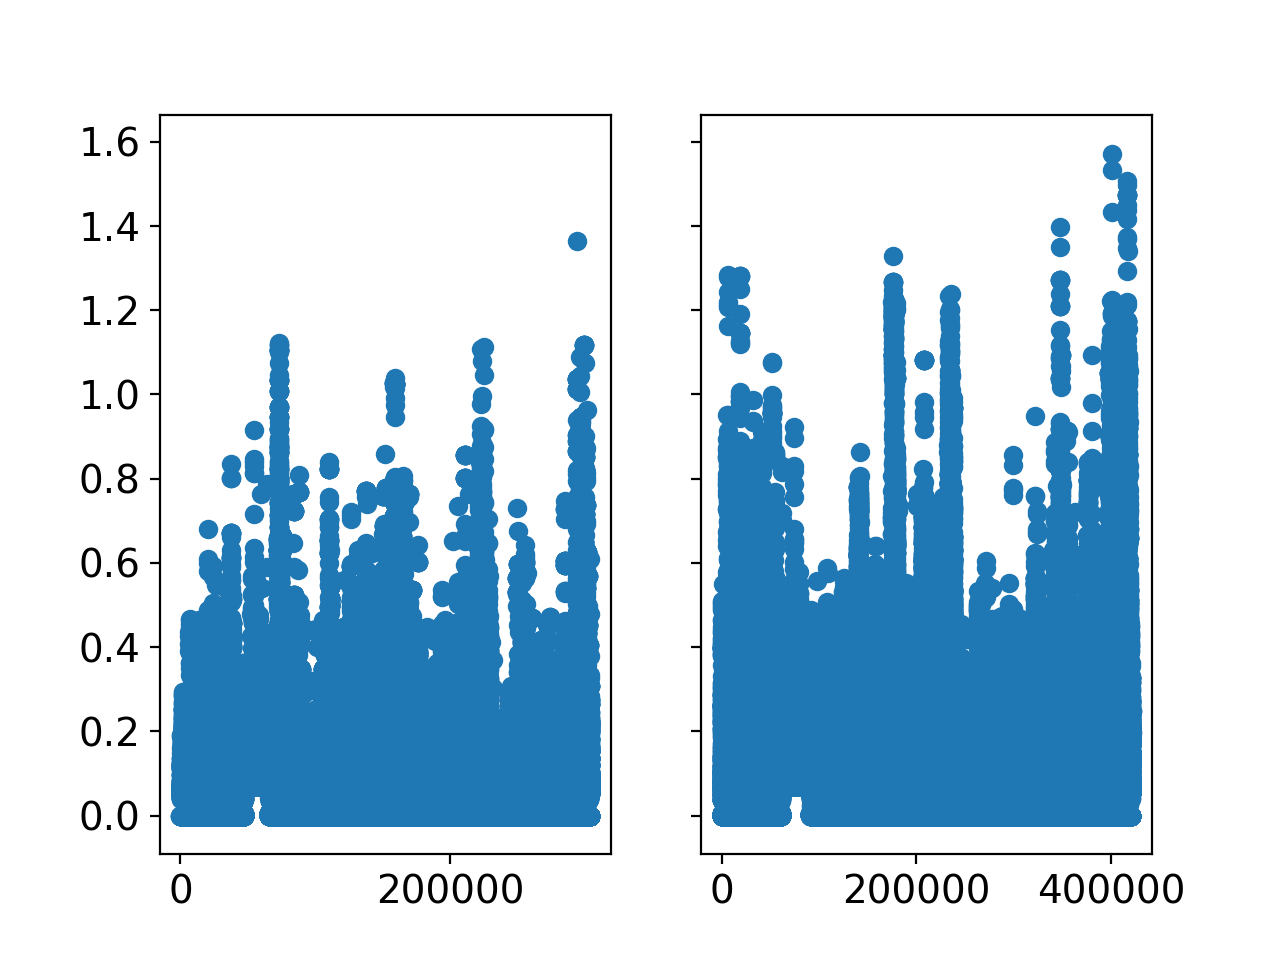

In [34]:
fig, axes = plt.subplots(1,2,sharey=True)
axes[0].scatter(np.arange(len(PB_raw_data['reward_IR_distance'])), 
                PB_raw_data['reward_IR_distance'])
axes[1].scatter(np.arange(len(PLA_raw_data['reward_IR_distance'])), 
                PLA_raw_data['reward_IR_distance'])

## Everage over 30 seconds.

In [35]:
def average_estimated_engagement(estimated_engagement, avg_point=600, mean=True):
    point_num = int(np.ceil(len(estimated_engagement)/avg_point))
    point_avg = []
    for i in range(point_num):
        if i == point_num:
            if mean:
                point_avg.append(estimated_engagement[i*avg_point:].mean())
            else:
                point_avg.append(estimated_engagement[i*avg_point:].sum())
        else:
            if mean:
                point_avg.append(estimated_engagement[i*avg_point: (i+1)*avg_point].mean())
            else:
                point_avg.append(estimated_engagement[i*avg_point: (i+1)*avg_point].sum())
    return np.array(point_avg)

# The estimated engagement based on IR reading at 10Hz
avg_point_over_second = 60#30
ir_num=24
engagement_avg_PB = average_estimated_engagement(PB_estimated_engagement, avg_point=avg_point_over_second*10,mean=True)/ir_num
engagement_avg_PLA = average_estimated_engagement(PLA_estimated_engagement, avg_point=avg_point_over_second*10,mean=True)/ir_num
engagement_avg_SARA = average_estimated_engagement(SARA_estimated_engagement, avg_point=avg_point_over_second*10,mean=True)/ir_num
engagement_avg_ACRA = average_estimated_engagement(ACRA_estimated_engagement, avg_point=avg_point_over_second*10,mean=True)/ir_num

# engagement_avg_PB = average_estimated_engagement(PB_estimated_engagement, avg_point=avg_point_over_second*10,mean=False)/(ir_num*avg_point_over_second*10)
# engagement_avg_PLA = average_estimated_engagement(PLA_estimated_engagement, avg_point=avg_point_over_second*10,mean=False)/(ir_num*avg_point_over_second*10)
# engagement_avg_SARA = average_estimated_engagement(SARA_estimated_engagement, avg_point=avg_point_over_second*10,mean=False)/(ir_num*avg_point_over_second*10)
# engagement_avg_ACRA = average_estimated_engagement(ACRA_estimated_engagement, avg_point=avg_point_over_second*10,mean=False)/(ir_num*avg_point_over_second*10)


PB: mean=0.0017, std=0.0020
PLA: mean=0.0022, std=0.0030
SARA: mean=0.0023, std=0.0025
ACRA: mean=0.0009, std=0.0007


<IPython.core.display.Javascript object>


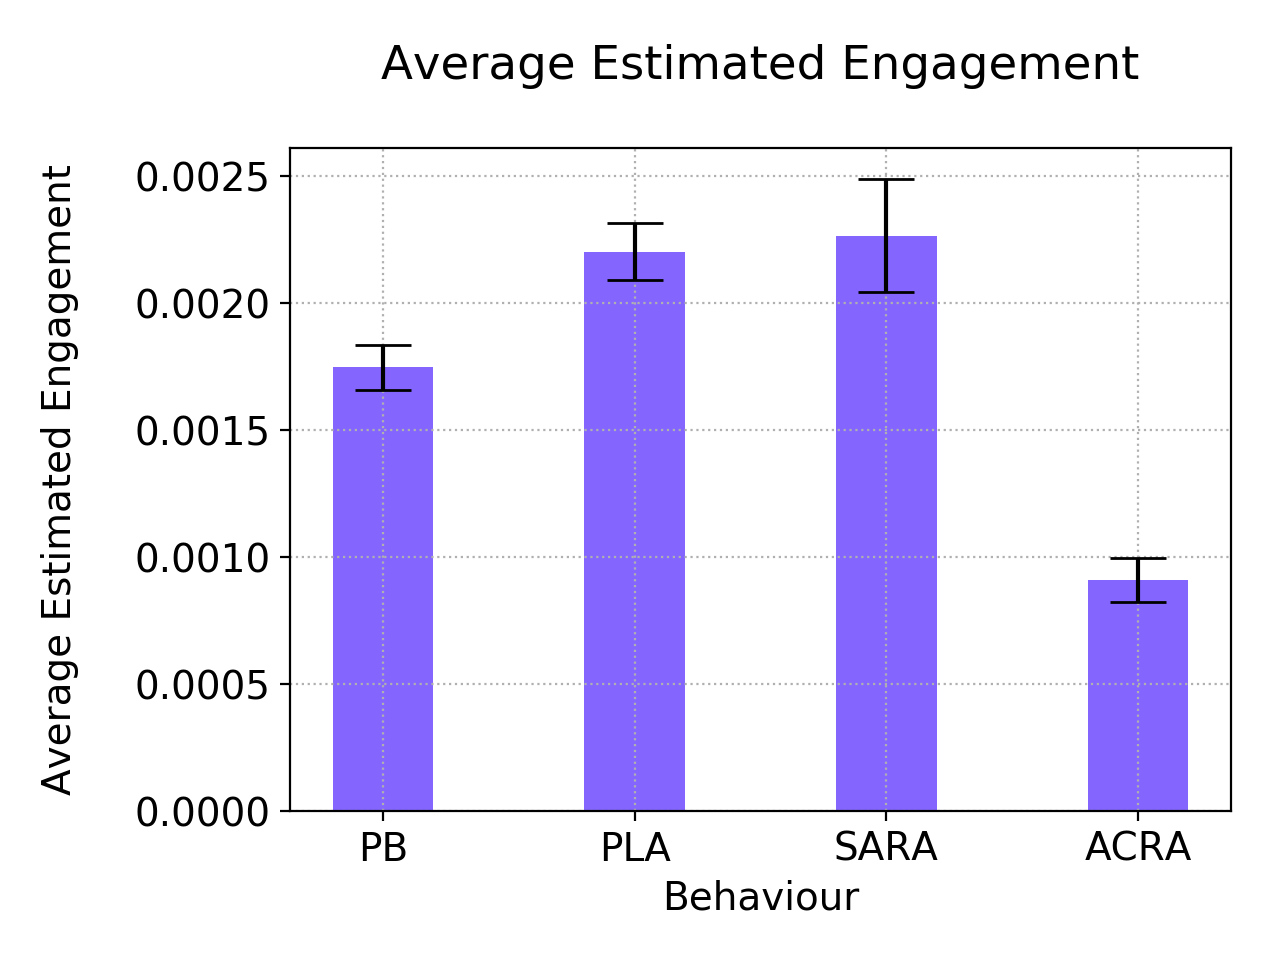

In [36]:
estimated_engagement = {'PB': engagement_avg_PB, 
                        'PLA':engagement_avg_PLA, 
                        'SARA':engagement_avg_SARA, 
                        'ACRA':engagement_avg_ACRA}
for i in estimated_engagement.keys():
    print('{0}: mean={1:.4f}, std={2:.4f}'.format(i, estimated_engagement[i].mean(), estimated_engagement[i].std()))

estimated_engagement_mean = [estimated_engagement[i].mean() for i in estimated_engagement.keys()]
estimated_engagement_std = [estimated_engagement[i].std() for i in estimated_engagement.keys()]
estimated_engagement_SEM = [estimated_engagement[i].std()/np.sqrt(estimated_engagement[i].shape[0]) for i in estimated_engagement.keys()]

plt.figure()
plt.bar(np.arange(0,4), estimated_engagement_mean,  yerr=estimated_engagement_SEM, capsize=10, color=(0.2, 0, 1, 0.6), width=0.4)
# plt.ylim(0,0.003)
# plt.yticks(np.arange(0, 0.07001, 0.01))
# ax=plt.gca()
# ax.set_yticks(ax.get_yticks()[2:])

plt.ylabel('Average Estimated Engagement\n')
plt.xlabel('Behaviour')
plt.xticks(np.arange(0,4),['PB', 'PLA', 'SARA', 'ACRA'])
plt.title('Average Estimated Engagement\n')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.savefig('./figures/Average_Estimated_Engagement.png', dpi=300)


PB: mean=0.0017, std=0.0020
PLA: mean=0.0022, std=0.0030


<IPython.core.display.Javascript object>


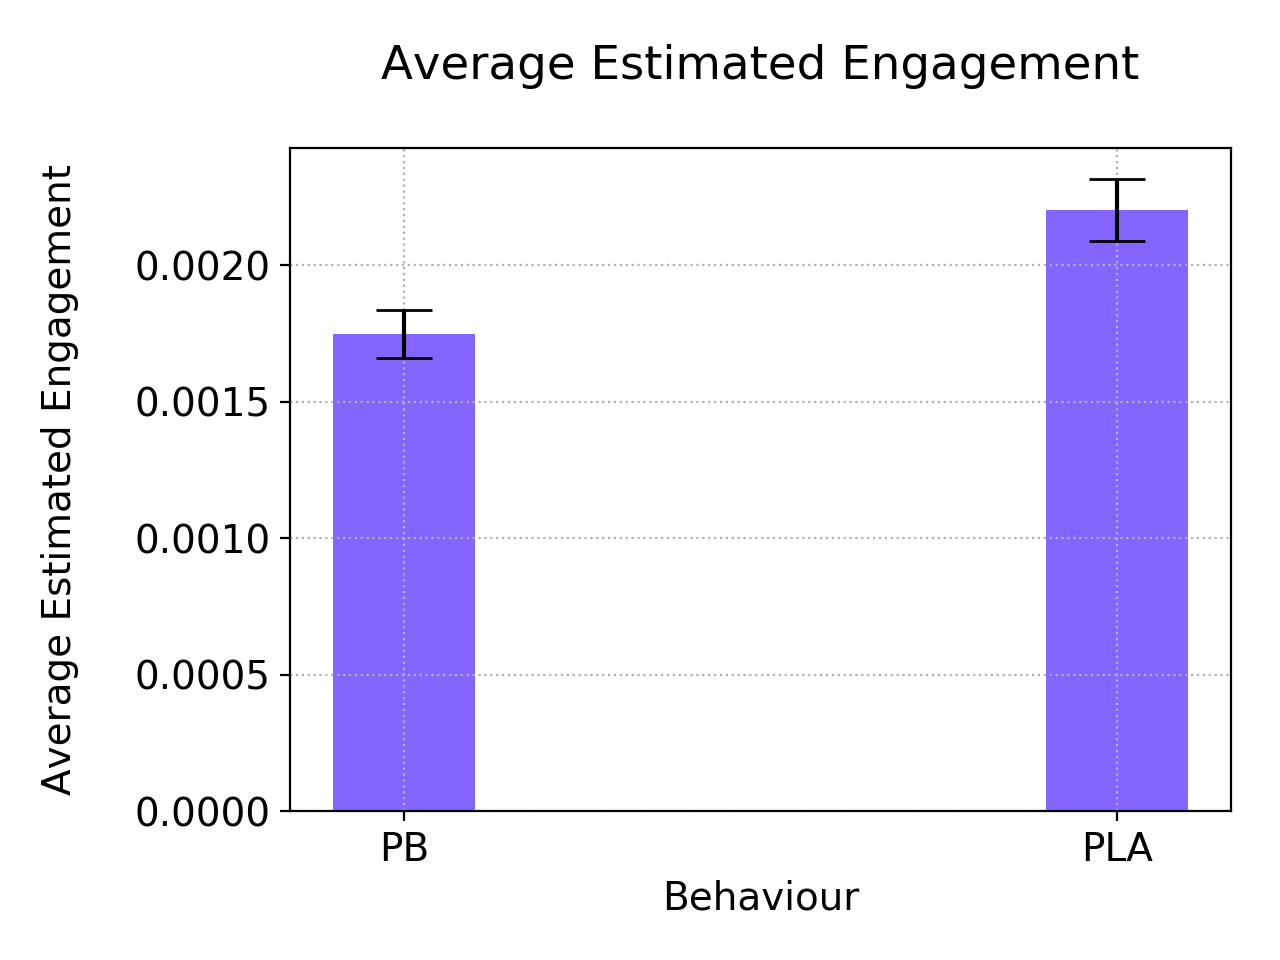

In [37]:
estimated_engagement = {'PB': engagement_avg_PB, 
                        'PLA':engagement_avg_PLA}
for i in estimated_engagement.keys():
    print('{0}: mean={1:.4f}, std={2:.4f}'.format(i, estimated_engagement[i].mean(), estimated_engagement[i].std()))

estimated_engagement_mean = [estimated_engagement[i].mean() for i in estimated_engagement.keys()]
estimated_engagement_std = [estimated_engagement[i].std() for i in estimated_engagement.keys()]
estimated_engagement_SEM = [estimated_engagement[i].std()/np.sqrt(estimated_engagement[i].shape[0]) for i in estimated_engagement.keys()]

plt.figure()
plt.bar(np.arange(0,2), estimated_engagement_mean,  yerr=estimated_engagement_SEM, 
        capsize=10, color=(0.2, 0, 1, 0.6), width=0.2)

plt.ylabel('Average Estimated Engagement\n')
plt.xlabel('Behaviour')
plt.xticks(np.arange(0,2),['PB', 'PLA'])
plt.title('Average Estimated Engagement\n')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.savefig('./figures/Average_Estimated_Engagement.png', dpi=300)


0.0009963601064407516
0.001263172721842077
0.0017102220399270163
0.0007003394156619963


<IPython.core.display.Javascript object>


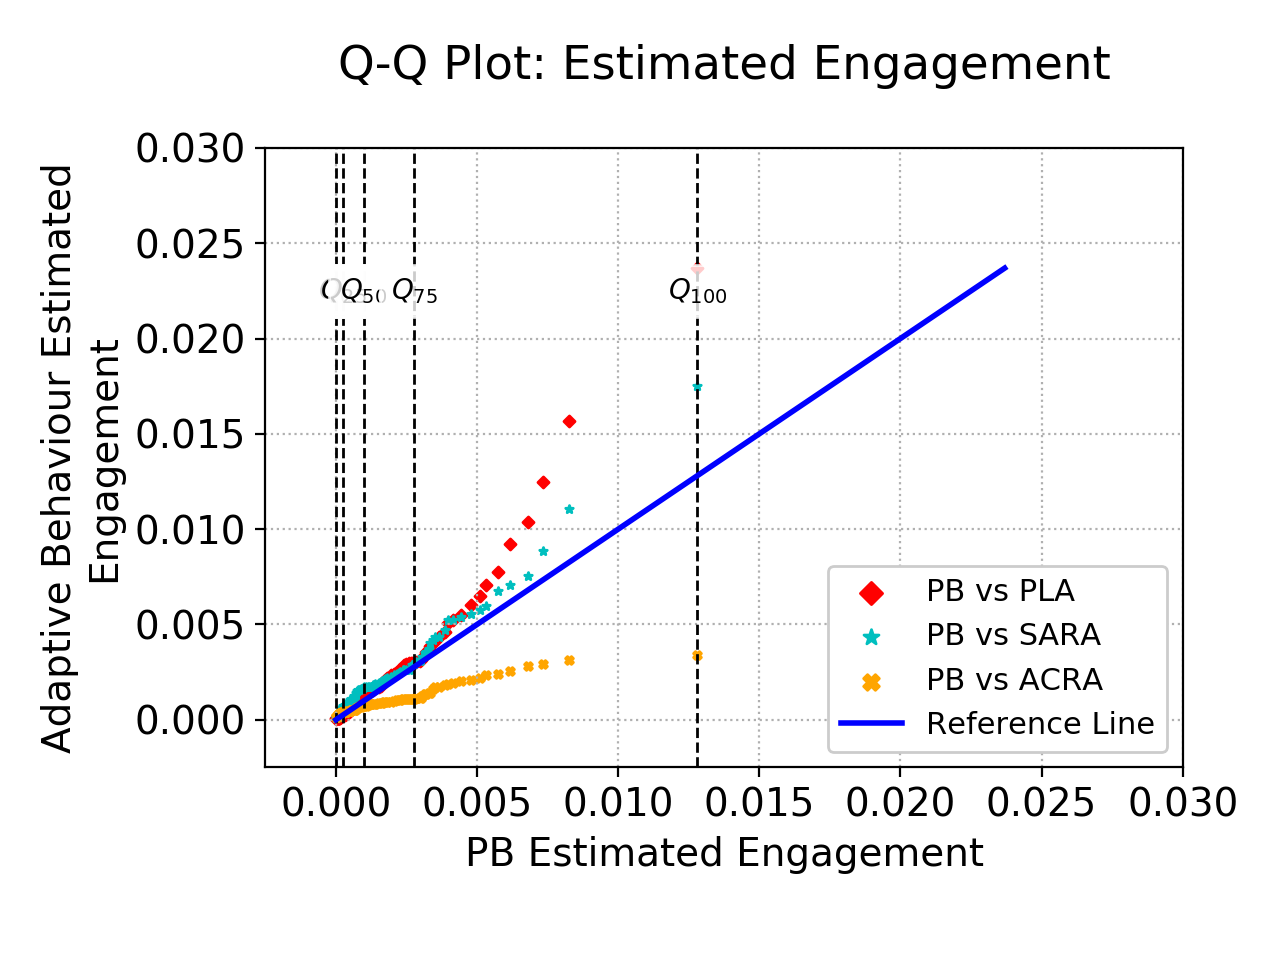

In [28]:
# qq_plot(engagement_avg_PB, engagement_avg_PLA, engagement_avg_SARA, engagement_avg_ACRA,
#         title='Estimated Engagement\nPer Minute Per IR', figname='Estimated_Engagement', axis_lim = [-0.0025,0.03],
#         xlabel='PB Estimated Engagement\n[level*IR reading$^{-1}$*IR$^{-1}$]',
#         ylabel='Adaptive Behaviour Estimated Engagement\n[level*IR reading$^{-1}$*IR$^{-1}$]')
qq_plot(engagement_avg_PB, engagement_avg_PLA, engagement_avg_SARA, engagement_avg_ACRA,
        title='Estimated Engagement\n', figname='Estimated_Engagement', axis_lim = [-0.0025,0.03],
        xlabel='PB Estimated Engagement\n',
        ylabel='Adaptive Behaviour Estimated\nEngagement')

Quantile 50:
  PB:   0.0009963601064407516
  PLA:  0.001263172721842077
  SARA: 0.00033634258050817815
  ACRA: 0.00041134166911443483
Quantile 75:
  PB:   0.002777286303899207
  PLA:  0.0029973254045834686
  SARA: 0.0009375321595325504
  ACRA: 0.0009760540371727598


<IPython.core.display.Javascript object>


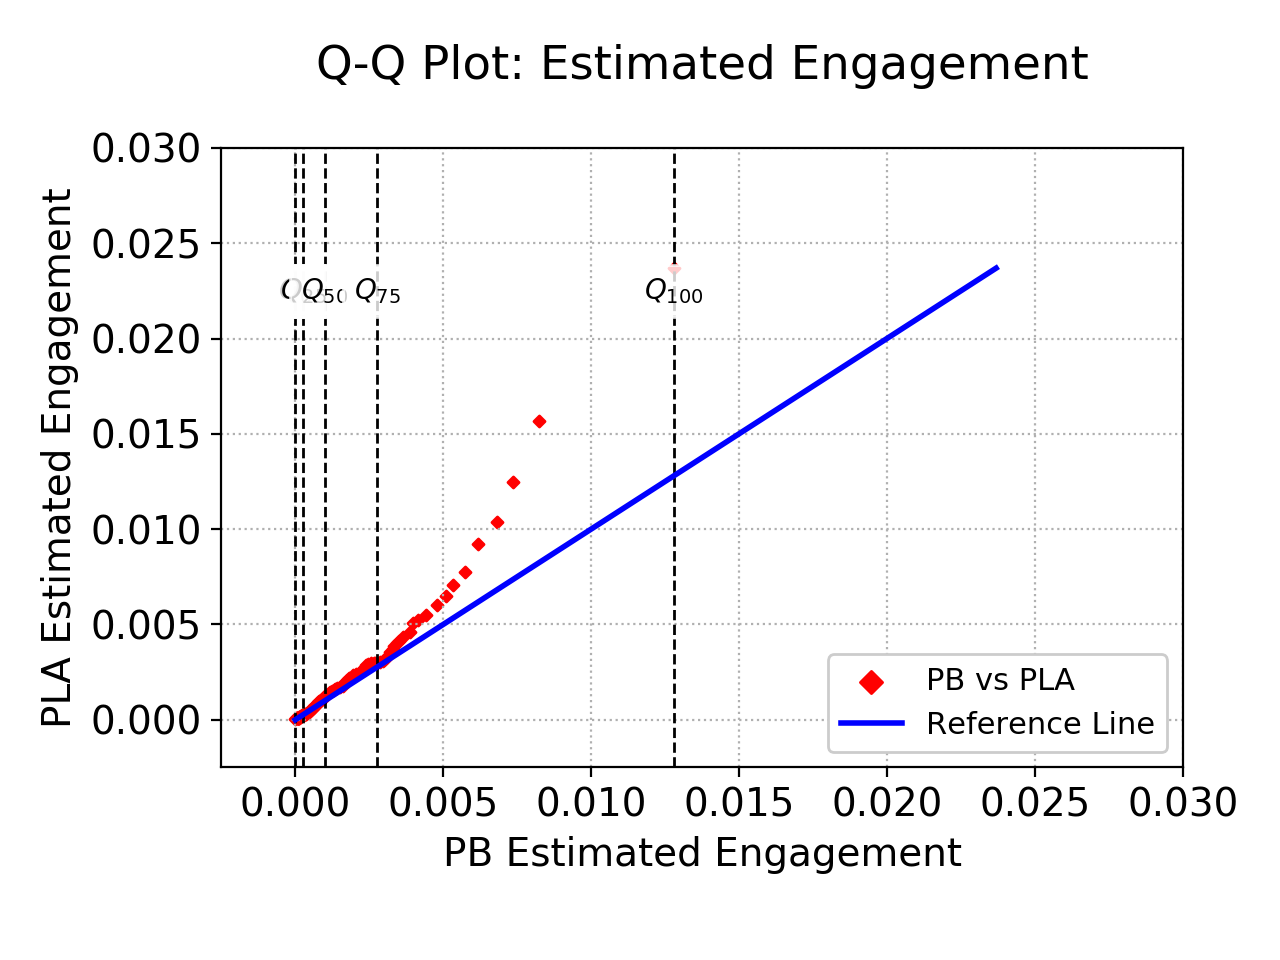

In [188]:
# def qq_plot_PB_PLA(point_avg_PB,point_avg_PLA, point_avg_PB_scaled,point_avg_PLA_scaled, 
#             title='Estimated Occupancy', figname='', axis_lim = None, reference_line_boundary =None , 
#             xlabel='PB', ylabel='Adaptive Behaviour'):
#     q = np.arange(0,101,1)
#     quantile_PB = np.percentile(point_avg_PB, q)
#     quantile_PLA = np.percentile(point_avg_PLA, q)
#     quantile_PB_scaled = np.percentile(point_avg_PB_scaled, q)
#     quantile_PLA_scaled = np.percentile(point_avg_PLA_scaled, q)
    
#     print(quantile_PB[51])
#     print(quantile_PLA[51])
#     print(quantile_PB_scaled[51])
#     print(quantile_PLA_scaled[51])
    
#     fig, ax = plt.subplots()
#     marker_size = 8
#     linewidth = 2
    
#     handle_PB_PLA = ax.scatter(quantile_PB, quantile_PLA, 
#                                c='r', marker='D', s = marker_size)
#     handle_PB_PLA_scaled = ax.scatter(quantile_PB_scaled, quantile_PLA_scaled, 
#                                 c='c', marker='*', s = marker_size)
    
#     hightlight_quantile = 95
    
#     if axis_lim is None:
#         x_y_lim = max(ax.get_ylim()[1], ax.get_xlim()[1])
#         ax.set_xlim(right=x_y_lim)
#         ax.set_ylim(top=x_y_lim)
#     else:
#         ax.set_xlim(axis_lim)
#         ax.set_ylim(axis_lim)
    
#     textstr = ['$Q_{0}$','$Q_{25}$','$Q_{50}$','$Q_{75}$','$Q_{100}$']
#     q_line = [0, 26,51, 76, 100]
#     text_y = [0.65,0.675,0.7,0.725,0.75]
#     for i, q_v in enumerate(q_line):
#         handle_separate_line=ax.axvline(x=quantile_PB[q_v], linestyle='--', color='black',linewidth=1)
#         ax.text(quantile_PB[q_v], ax.get_ylim()[1]*(0.75),textstr[i],
#             rotation=0, fontsize=10,horizontalalignment='center',verticalalignment='center',
#                 bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    
    
#     #Add a reference line
#     maxval = max(np.sort(point_avg_PB)[-1],
#                  np.sort(point_avg_PLA)[-1])
#     minval = min(np.sort(point_avg_PB)[0],
#                  np.sort(point_avg_PLA)[0])
#     handle_reference_line, = ax.plot([minval,maxval],[minval,maxval],'b-',linewidth=linewidth)
#     if reference_line_boundary is not None:
#         handle_reference_line_up, = ax.plot([minval,maxval],[minval+reference_line_boundary,maxval+reference_line_boundary],'b:',linewidth=linewidth)
#         handle_reference_line_bottom, = ax.plot([minval,maxval],[minval-reference_line_boundary,maxval-reference_line_boundary],'b:',linewidth=linewidth)

#         ax.legend(handles=[handle_PB_PLA, handle_PB_PLA_scaled, 
#                            handle_reference_line,handle_reference_line_up], 
#                   labels=['PB vs PLA', 'PB scaled vs PLA scaled', 
#                           'Reference Line', 'Reference Line$\pm$1'],
#                   fontsize=11, markerscale=2, framealpha=0.8, loc='lower right')
#     else:
#         ax.legend(handles=[handle_PB_PLA, handle_PB_PLA_scaled,
#                            handle_reference_line], 
#                   labels=['PB vs PLA', 'PB scaled vs PLA scaled', 
#                           'Reference Line'],
#                   fontsize=11, markerscale=2, framealpha=1, loc='lower right')
#     ax.set_title('Q-Q Plot: {}'.format(title))
    
    
#     ax.set_xlabel(xlabel)
#     ax.set_ylabel(ylabel)
    
#     plt.tight_layout()
#     plt.grid(True, linestyle=':')
#     plt.savefig('./figures/qq_plot_{}.png'.format(figname), dpi=300)

qq_plot_PB_PLA(engagement_avg_PB, engagement_avg_PLA, 
               engagement_avg_PB/ point_avg_PB.mean(), engagement_avg_PLA/point_avg_PLA.mean(), 
        title='Estimated Engagement\n', figname='Estimated_Engagement', axis_lim = [-0.0025,0.03],
        xlabel='PB Estimated Engagement\n',
        ylabel='PLA Estimated Engagement')

PB: mean=0.0006, std=0.0007
PLA: mean=0.0007, std=0.0010
SARA: mean=0.0005, std=0.0005
ACRA: mean=0.0004, std=0.0003


<IPython.core.display.Javascript object>


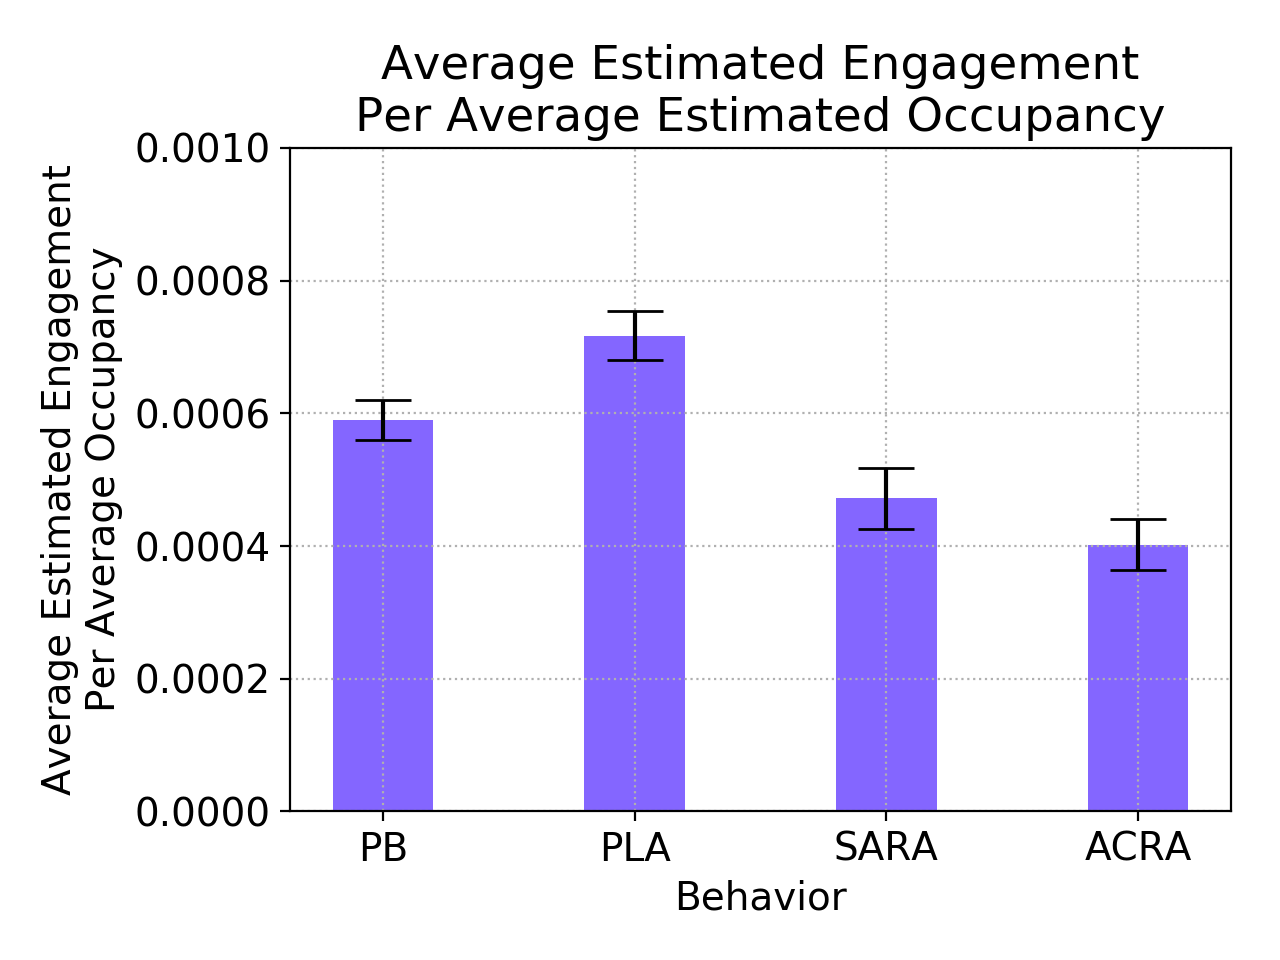

In [29]:
norm_estimated_engagement = {'PB': engagement_avg_PB/ point_avg_PB.mean(), 
                             'PLA':engagement_avg_PLA/point_avg_PLA.mean(), 
                             'SARA':engagement_avg_SARA/ point_avg_SARA.mean(), 
                             'ACRA':engagement_avg_ACRA/ point_avg_ACRA.mean()}
for i in norm_estimated_engagement.keys():
    print('{0}: mean={1:.4f}, std={2:.4f}'.format(i, norm_estimated_engagement[i].mean(), norm_estimated_engagement[i].std()))

norm_estimated_engagement_mean = [norm_estimated_engagement[i].mean() for i in norm_estimated_engagement.keys()]
norm_estimated_engagement_std = [norm_estimated_engagement[i].std() for i in norm_estimated_engagement.keys()]
norm_estimated_engagement_SEM = [norm_estimated_engagement[i].std()/np.sqrt(norm_estimated_engagement[i].shape[0]) for i in norm_estimated_engagement.keys()]

plt.figure()
plt.bar(np.arange(0,4), norm_estimated_engagement_mean,  yerr=norm_estimated_engagement_SEM, capsize=10, color=(0.2, 0, 1, 0.6), width=0.4)
plt.ylim(0,0.0010)
# plt.yticks(np.arange(0, 0.07001, 0.01))
# ax=plt.gca()
# ax.set_yticks(ax.get_yticks()[2:])

plt.ylabel('Average Estimated Engagement\nPer Average Occupancy')
# plt.ylabel('Average Estimated Engagement\n[level*average occupancy$^{-1}$]')
plt.xlabel('Behavior')
plt.xticks(np.arange(0,4),['PB', 'PLA', 'SARA', 'ACRA'])
plt.title('Average Estimated Engagement\nPer Average Estimated Occupancy')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.savefig('./figures/Average_Estimated_Engagement_Per_Average_Occupancy.png', dpi=300)


PB: mean=0.0006, std=0.0007
PLA: mean=0.0007, std=0.0010


<IPython.core.display.Javascript object>


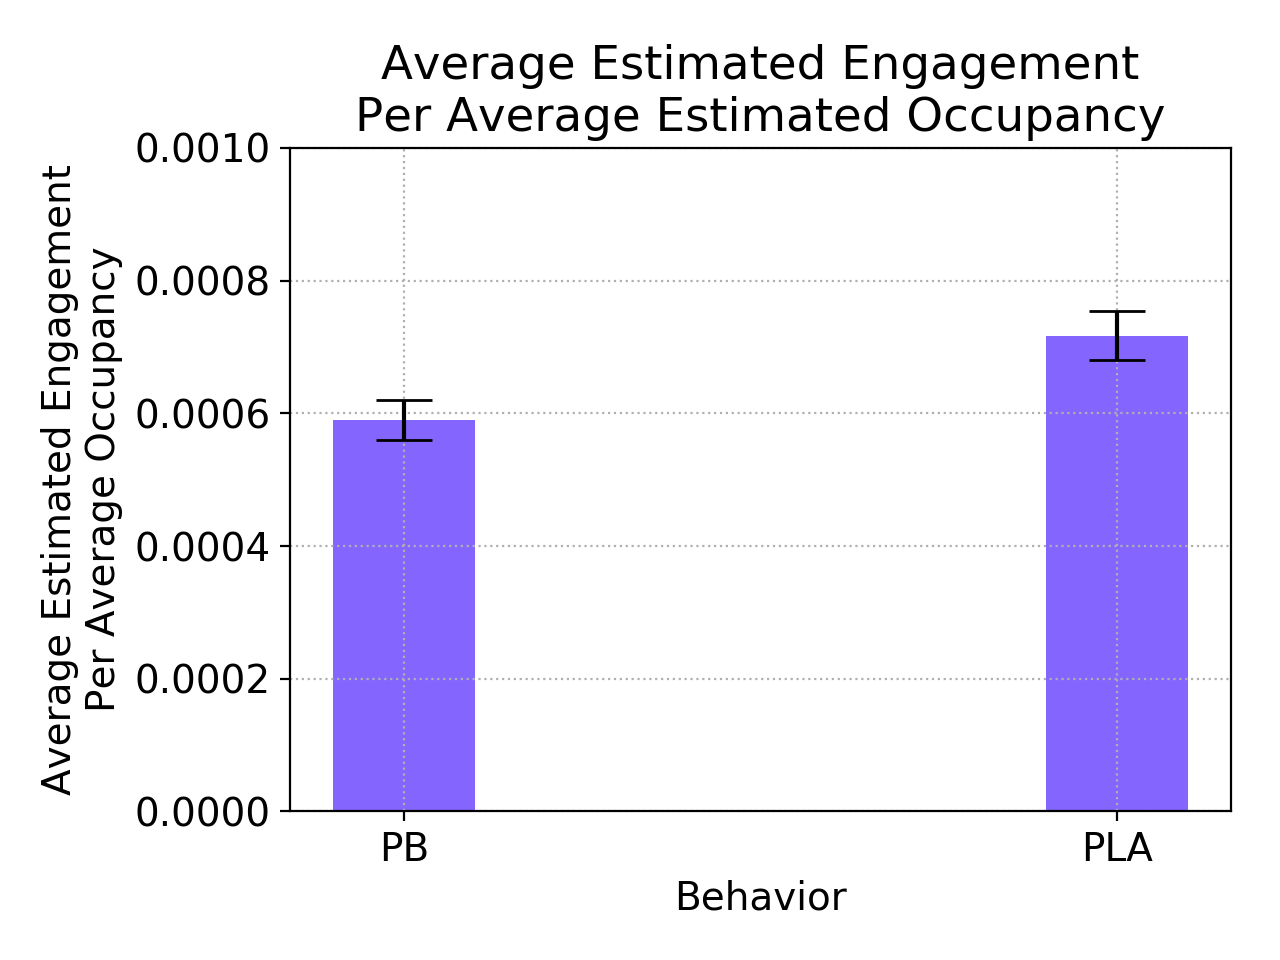

In [99]:
norm_estimated_engagement = {'PB': engagement_avg_PB/ point_avg_PB.mean(), 
                             'PLA':engagement_avg_PLA/point_avg_PLA.mean()}
for i in norm_estimated_engagement.keys():
    print('{0}: mean={1:.4f}, std={2:.4f}'.format(i, norm_estimated_engagement[i].mean(), norm_estimated_engagement[i].std()))

norm_estimated_engagement_mean = [norm_estimated_engagement[i].mean() for i in norm_estimated_engagement.keys()]
norm_estimated_engagement_std = [norm_estimated_engagement[i].std() for i in norm_estimated_engagement.keys()]
norm_estimated_engagement_SEM = [norm_estimated_engagement[i].std()/np.sqrt(norm_estimated_engagement[i].shape[0]) for i in norm_estimated_engagement.keys()]

plt.figure()
plt.bar(np.arange(0,2), norm_estimated_engagement_mean,  yerr=norm_estimated_engagement_SEM,
        capsize=10, color=(0.2, 0, 1, 0.6), width=0.2)
plt.ylim(0,0.0010)

plt.ylabel('Average Estimated Engagement\nPer Average Occupancy')
# plt.ylabel('Average Estimated Engagement\n[level*average occupancy$^{-1}$]')
plt.xlabel('Behavior')
plt.xticks(np.arange(0,2),['PB', 'PLA'])
plt.title('Average Estimated Engagement\nPer Average Estimated Occupancy')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.savefig('./figures/Average_Estimated_Engagement_Per_Average_Occupancy.png', dpi=300)


PB: mean=0.0017, std=0.0020
PLA: mean=0.0022, std=0.0030
PB: mean=0.0006, std=0.0007
PLA: mean=0.0007, std=0.0010


<IPython.core.display.Javascript object>


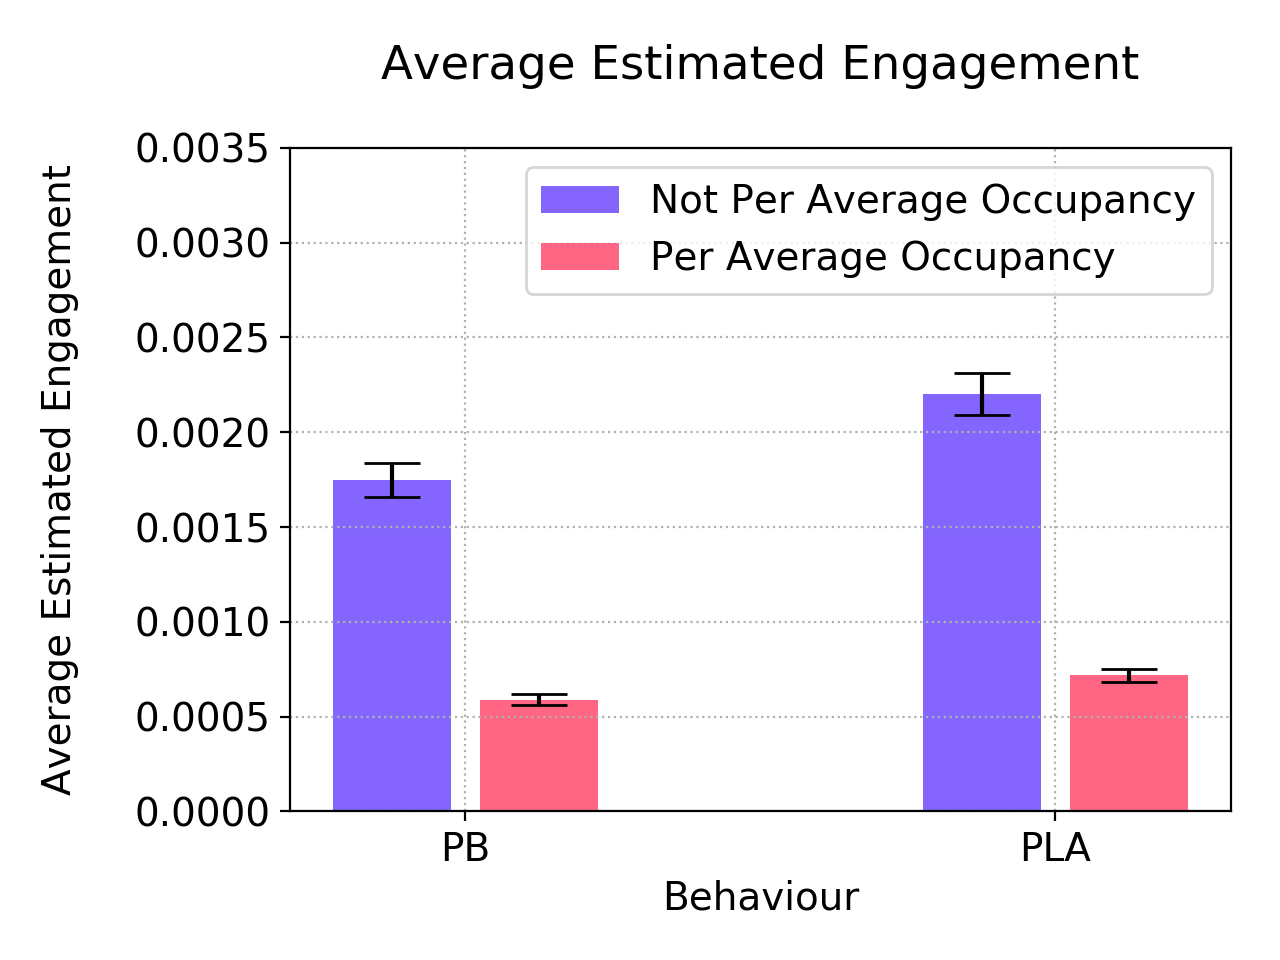

In [39]:
estimated_engagement = {'PB': engagement_avg_PB, 
                        'PLA':engagement_avg_PLA}
for i in estimated_engagement.keys():
    print('{0}: mean={1:.4f}, std={2:.4f}'.format(i, estimated_engagement[i].mean(), estimated_engagement[i].std()))

estimated_engagement_mean = [estimated_engagement[i].mean() for i in estimated_engagement.keys()]
estimated_engagement_std = [estimated_engagement[i].std() for i in estimated_engagement.keys()]
estimated_engagement_SEM = [estimated_engagement[i].std()/np.sqrt(estimated_engagement[i].shape[0]) for i in estimated_engagement.keys()]

norm_estimated_engagement = {'PB': engagement_avg_PB/ point_avg_PB.mean(), 
                             'PLA':engagement_avg_PLA/point_avg_PLA.mean()}
for i in norm_estimated_engagement.keys():
    print('{0}: mean={1:.4f}, std={2:.4f}'.format(i, norm_estimated_engagement[i].mean(), norm_estimated_engagement[i].std()))

norm_estimated_engagement_mean = [norm_estimated_engagement[i].mean() for i in norm_estimated_engagement.keys()]
norm_estimated_engagement_std = [norm_estimated_engagement[i].std() for i in norm_estimated_engagement.keys()]
norm_estimated_engagement_SEM = [norm_estimated_engagement[i].std()/np.sqrt(norm_estimated_engagement[i].shape[0]) for i in norm_estimated_engagement.keys()]

plt.figure()
plt.bar(np.arange(0,2)-0.125, estimated_engagement_mean,  yerr=estimated_engagement_SEM, 
        capsize=10, color=(0.2, 0, 1, 0.6), width=0.2)
plt.bar(np.arange(0,2)+0.125, norm_estimated_engagement_mean,  yerr=norm_estimated_engagement_SEM,
        capsize=10, color=(1, 0, 0.2, 0.6), width=0.2)
plt.ylim(0,0.0035)
plt.ylabel('Average Estimated Engagement\n')
plt.xlabel('Behaviour')
plt.xticks(np.arange(0,2), ['PB', 'PLA'])
plt.title('Average Estimated Engagement\n')
plt.grid(True, linestyle=':')
plt.legend(['Not Per Average Occupancy', 'Per Average Occupancy'])
plt.tight_layout()
plt.savefig('./figures/Average_Estimated_Engagement.png', dpi=150)


0.00033634258050817815
0.00041134166911443483
0.00035612424297333826
0.00030872209312399543


<IPython.core.display.Javascript object>


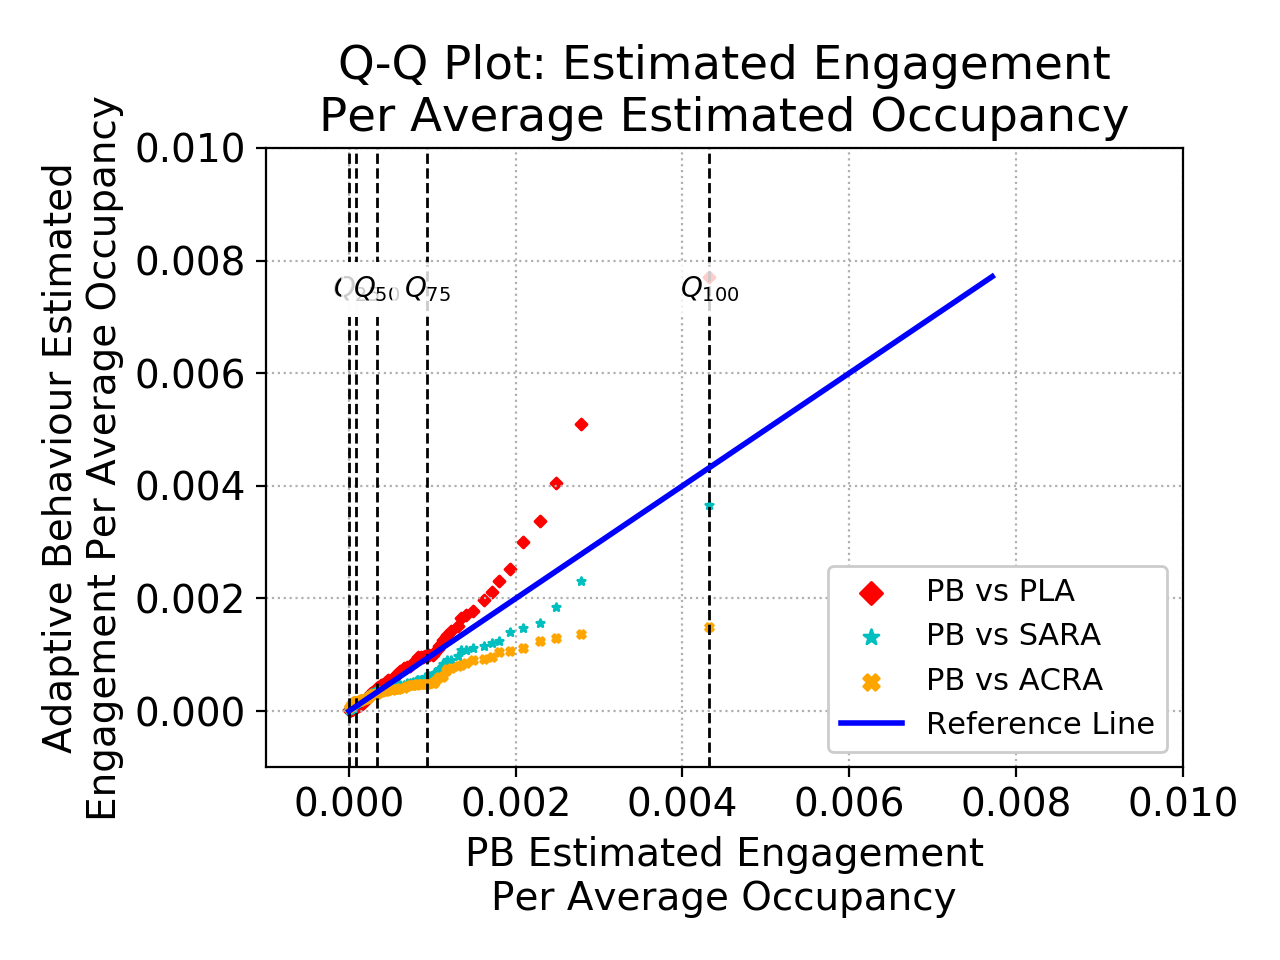

In [30]:
qq_plot(engagement_avg_PB/ point_avg_PB.mean(), engagement_avg_PLA/point_avg_PLA.mean(), 
        engagement_avg_SARA/ point_avg_SARA.mean(), engagement_avg_ACRA/ point_avg_ACRA.mean(),
        title='Estimated Engagement\nPer Average Estimated Occupancy', 
        figname='Estimated_Engagement_Per_Average_Occupancy', axis_lim = [-0.001,0.01],
        xlabel='PB Estimated Engagement\nPer Average Occupancy', 
        ylabel='Adaptive Behaviour Estimated\nEngagement Per Average Occupancy')
# qq_plot(engagement_avg_PB/ point_avg_PB.mean(), engagement_avg_PLA/point_avg_PLA.mean(), 
#         engagement_avg_SARA/ point_avg_SARA.mean(), engagement_avg_ACRA/ point_avg_ACRA.mean(),
#         title='Estimated Engagement Level\nPer Average Occupancy', 
#         figname='Estimated_Engagement_Per_Average_Occupancy', axis_lim = [-0.001,0.01],
#         xlabel='PB Estimated Engagement\n[level*average occupancy$^{-1}$]', 
#         ylabel='Adaptive Behaviour Estimated Engagement\n[level*average occupancy$^{-1}$]')

0.00033634258050817815
0.00041134166911443483
0.00035612424297333826
0.00030872209312399543


<IPython.core.display.Javascript object>


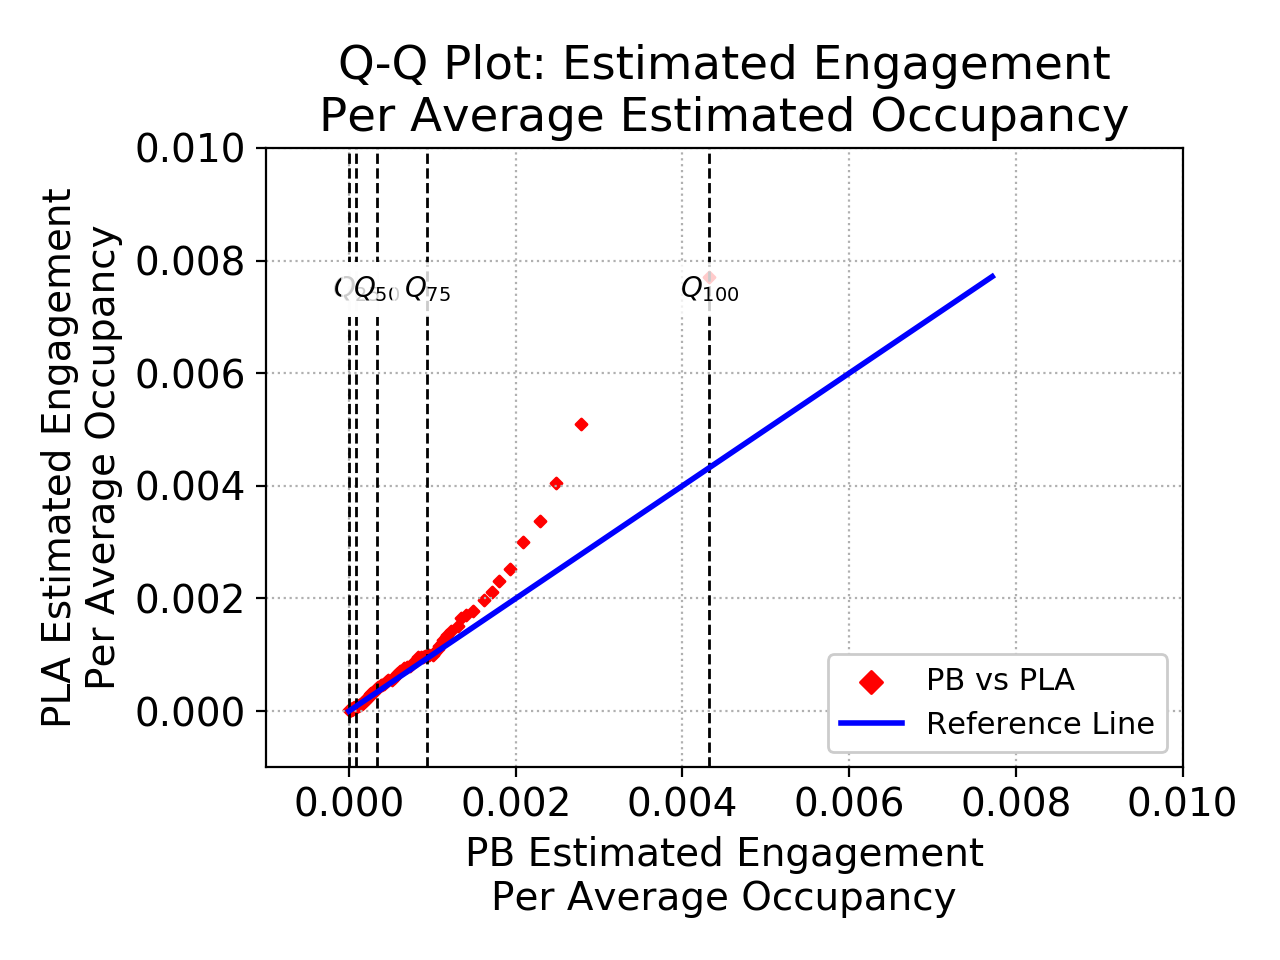

In [41]:
qq_plot_PB_PLA(engagement_avg_PB/ point_avg_PB.mean(), engagement_avg_PLA/point_avg_PLA.mean(), 
        engagement_avg_SARA/ point_avg_SARA.mean(), engagement_avg_ACRA/ point_avg_ACRA.mean(),
        title='Estimated Engagement\nPer Average Estimated Occupancy', 
        figname='Estimated_Engagement_Per_Average_Occupancy', axis_lim = [-0.001,0.01],
        xlabel='PB Estimated Engagement\nPer Average Occupancy', 
        ylabel='PLA Estimated Engagement\nPer Average Occupancy')

## No sparse

In [31]:
# ir_num=24

# estimated_engagement_PB = PB_estimated_engagement/ir_num
# estimated_engagement_PLA = PLA_estimated_engagement/ir_num
# estimated_engagement_SARA = SARA_estimated_engagement /ir_num
# estimated_engagement_ACRA = ACRA_estimated_engagement /ir_num

# estimated_engagement = {'PB': estimated_engagement_PB, 
#                              'PLA':estimated_engagement_PLA, 
#                              'SARA':estimated_engagement_SARA, 
#                              'ACRA':estimated_engagement_ACRA}
# for i in estimated_engagement.keys():
#     print('{0}: mean={1:.4f}, std={2:.4f}'.format(i, 
#                                                   estimated_engagement[i].mean(), 
#                                                   estimated_engagement[i].std()))

# estimated_engagement_mean = [estimated_engagement[i].mean() for i in estimated_engagement.keys()]
# estimated_engagement_std = [estimated_engagement[i].std() for i in estimated_engagement.keys()]
# estimated_engagement_SEM = [estimated_engagement[i].std()/np.sqrt(estimated_engagement[i].shape[0]) for i in estimated_engagement.keys()]

# plt.figure()
# plt.bar(np.arange(0,4), estimated_engagement_mean, yerr=estimated_engagement_SEM, capsize=10, 
#         color=(0.2, 0, 1, 0.6), width=0.4)
# plt.ylabel('Estimated Engagement')
# # plt.ylim(0, 0.06)
# plt.ylim(0, 0.002501)
# # ax=plt.gca()
# # ax.set_yticks(ax.get_yticks()[3:])
# plt.xlabel('Behavior')
# plt.xticks(np.arange(0,4),['PB', 'PLA', 'SARA', 'ACRA'])
# plt.title('Average Estimated Engagement\n')
# plt.grid(True, linestyle=':')
# plt.tight_layout()
# plt.savefig('./figures/Average_Estimated_Engagement.png', dpi=300)

In [32]:
# qq_plot(estimated_engagement_PB, estimated_engagement_PLA, estimated_engagement_SARA, estimated_engagement_ACRA,
#         title='Estimated Engagement\n', figname='Estimated_Engagement', axis_lim = [-0.006, 0.08])

In [33]:
# # Normalized reward
# norm_estimated_engagement_PB = (PB_estimated_engagement/ir_num) / point_avg_PB.mean()
# norm_estimated_engagement_PLA = (PLA_estimated_engagement/ir_num) / point_avg_PLA.mean()
# norm_estimated_engagement_SARA = (SARA_estimated_engagement/ir_num) / point_avg_SARA.mean()
# norm_estimated_engagement_ACRA = (ACRA_estimated_engagement/ir_num) / point_avg_ACRA.mean()

# norm_estimated_engagement = {'PB': norm_estimated_engagement_PB, 
#                              'PLA':norm_estimated_engagement_PLA, 
#                              'SARA':norm_estimated_engagement_SARA, 
#                              'ACRA':norm_estimated_engagement_ACRA}
# for i in norm_estimated_engagement.keys():
#     print('{0}: mean={1:.4f}, std={2:.4f}'.format(i, 
#                                                   norm_estimated_engagement[i].mean(), 
#                                                   norm_estimated_engagement[i].std()))

# norm_estimated_engagement_mean = [norm_estimated_engagement[i].mean() for i in norm_estimated_engagement.keys()]
# norm_estimated_engagement_std = [norm_estimated_engagement[i].std() for i in norm_estimated_engagement.keys()]
# norm_estimated_engagement_SEM = [norm_estimated_engagement[i].std()/np.sqrt(norm_estimated_engagement[i].shape[0]) for i in norm_estimated_engagement.keys()]

# plt.figure()
# plt.bar(np.arange(0,4), norm_estimated_engagement_mean, yerr=norm_estimated_engagement_SEM, capsize=10, 
#         color=(0.2, 0, 1, 0.6), width=0.4)
# plt.ylabel('Estimated Engagement')
# plt.ylim(0, 0.0008)
# # plt.ylim(0, 0.02501)
# # ax=plt.gca()
# # ax.set_yticks(ax.get_yticks()[3:])
# plt.xlabel('Behavior')
# plt.xticks(np.arange(0,4),['PB', 'PLA', 'SARA', 'ACRA'])
# plt.title('Average Estimated Engagement\nPer Average Occupancy')
# plt.grid(True, linestyle=':')
# plt.tight_layout()
# plt.savefig('./figures/Average_Estimated_Engagement_Per_Average_Occupancy.png', dpi=300)

In [34]:
# qq_plot(norm_estimated_engagement_PB, norm_estimated_engagement_PLA, 
#         norm_estimated_engagement_SARA, norm_estimated_engagement_ACRA,
#         title='Estimated Engagement\nPer Average Occupancy', figname='Estimated_Engagement_Per_Average_Occupancy', axis_lim = [-0.003,0.028])

<IPython.core.display.Javascript object>


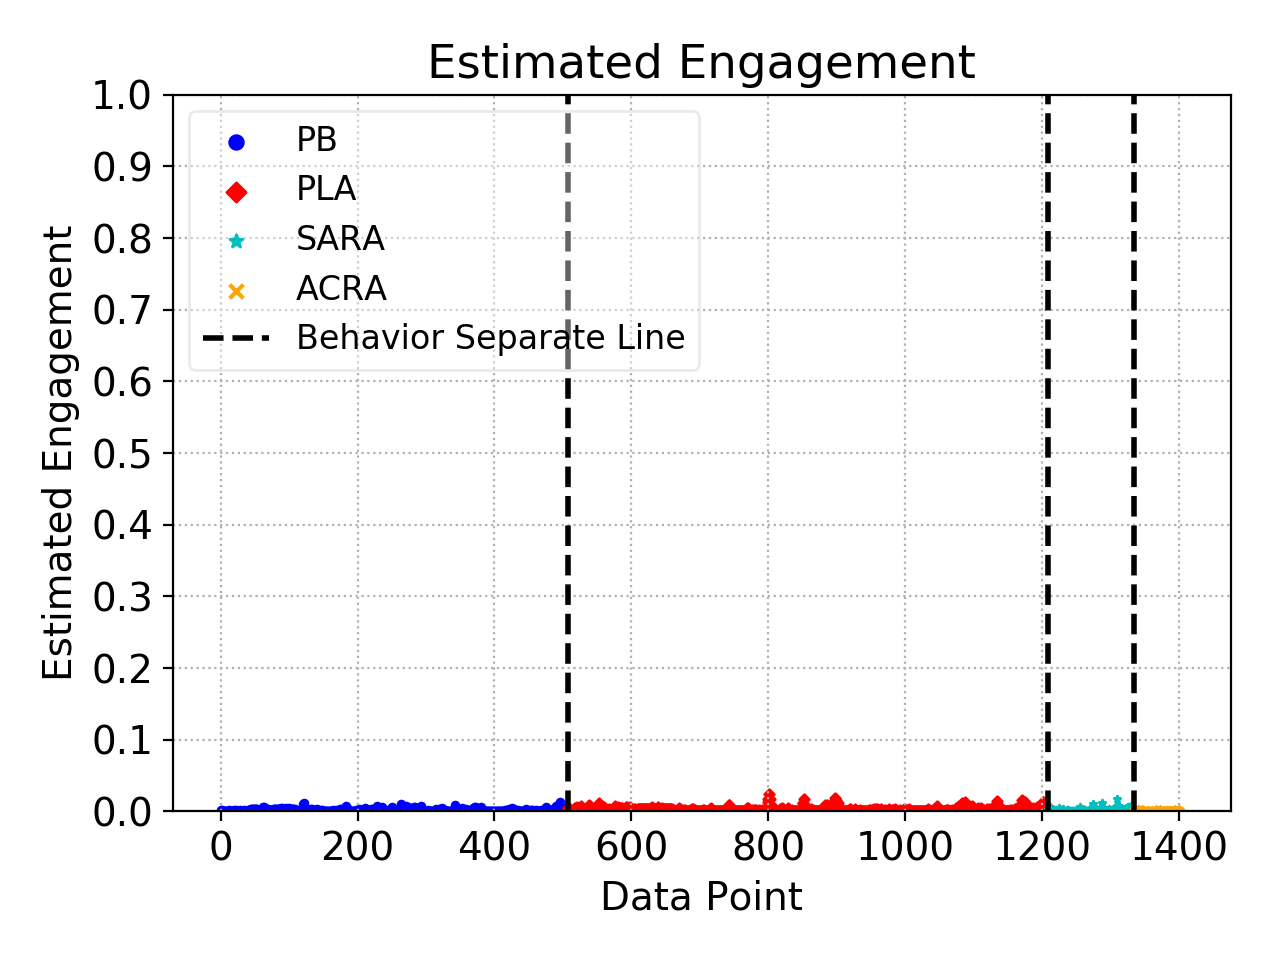

In [42]:
plt.figure()

start_PB = 0
end_PB = len(engagement_avg_PB)
handle_engage_PB = plt.scatter(np.arange(start_PB, end_PB), engagement_avg_PB, c='b', marker='o', s = 6)

start_PLA = end_PB
end_PLA = start_PLA+len(engagement_avg_PLA)
handle_engage_PLA = plt.scatter(np.arange(start_PLA, end_PLA), engagement_avg_PLA, c='r', marker='D', s = 6)

start_SARA = end_PLA
end_SARA = start_SARA+len(engagement_avg_SARA)
handle_engage_SARA = plt.scatter(np.arange(start_SARA, end_SARA), engagement_avg_SARA, c='c', marker='*', s = 6)

start_ACRA = end_SARA
end_ACRA = start_ACRA+len(engagement_avg_ACRA)
handle_engage_ACRA = plt.scatter(np.arange(start_ACRA, end_ACRA), engagement_avg_ACRA, c='orange', marker='x', s = 6)
# plt.ylim(0,0.5)

handle_engage_separate_line = plt.axvline(x=end_PB, linestyle='--', color='black',linewidth=2)
plt.axvline(x=end_PLA, linestyle='--', color='black',linewidth=2)
plt.axvline(x=end_SARA, linestyle='--', color='black',linewidth=2)

plt.ylabel('Estimated Engagement')
plt.xlabel('Data Point')

plt.ylim(0,1)
plt.yticks(np.arange(0,1.001,0.1))
plt.title('Estimated Engagement')
plt.legend(handles=[handle_engage_PB, handle_engage_PLA, handle_engage_SARA, handle_engage_ACRA, handle_engage_separate_line], 
           labels=['PB', 'PLA', 'SARA', 'ACRA', 'Behavior Separate Line'],fontsize=12, markerscale=2, framealpha=0.4)
plt.tight_layout()
plt.grid(True, linestyle=':')
plt.show()
plt.savefig('./figures/Estimated_engagement_comparison_sparsed_data_point.png', dpi=300)



In [36]:
# quantile_plot(engagement_avg_PB, engagement_avg_PLA, engagement_avg_SARA, engagement_avg_ACRA)

## Q-Q Plot

In [37]:
# qq_plot(engagement_avg_PB, engagement_avg_PLA, engagement_avg_SARA, engagement_avg_ACRA,
#         title='Estimated Engagement', figname='Estimated_Engagement', axis_lim = None,
#         xlabel='PB Estimated Engagement\n[times*minute$^{-1}$]', 
#         ylabel='Adaptive BehaviourEstimated\nEngagement [times*minute$^{-1}$*IR$^{-1}$]')



## P-P Plot

In [38]:
# pp_plot(engagement_avg_PB, engagement_avg_PLA, engagement_avg_SARA, engagement_avg_ACRA, 
#         title='Estimated Engagement')

In [39]:
# norm_engagement_avg_PB = engagement_avg_PB / point_avg_PB.mean()
# norm_engagement_avg_PLA = engagement_avg_PLA / point_avg_PLA.mean()
# norm_engagement_avg_SARA = engagement_avg_SARA / point_avg_SARA.mean()
# norm_engagement_avg_ACRA = engagement_avg_ACRA / point_avg_ACRA.mean()


# plt.figure()

# start_PB = 0
# end_PB = len(norm_engagement_avg_PB)
# handle_engage_PB = plt.scatter(np.arange(start_PB, end_PB), norm_engagement_avg_PB, c='b', marker='o', s = 6)

# start_PLA = end_PB
# end_PLA = start_PLA+len(norm_engagement_avg_PLA)
# handle_engage_PLA = plt.scatter(np.arange(start_PLA, end_PLA), norm_engagement_avg_PLA, c='r', marker='D', s = 6)

# start_SARA = end_PLA
# end_SARA = start_SARA+len(norm_engagement_avg_SARA)
# handle_engage_SARA = plt.scatter(np.arange(start_SARA, end_SARA), norm_engagement_avg_SARA, c='c', marker='*', s = 6)

# start_ACRA = end_SARA
# end_ACRA = start_ACRA+len(norm_engagement_avg_ACRA)
# handle_engage_ACRA = plt.scatter(np.arange(start_ACRA, end_ACRA), norm_engagement_avg_ACRA, c='orange', marker='x', s = 6)
# # plt.ylim(0,0.5)

# handle_engage_separate_line = plt.axvline(x=end_PB, linestyle='--', color='black',linewidth=2)
# plt.axvline(x=end_PLA, linestyle='--', color='black',linewidth=2)
# plt.axvline(x=end_SARA, linestyle='--', color='black',linewidth=2)

# plt.ylabel('Estimated Engagement')
# plt.xlabel('Data Point')

# plt.ylim(0,1)
# plt.yticks(np.arange(0,1.001,0.1))
# plt.title('Normalized Estimated Engagement')
# plt.legend(handles=[handle_engage_PB, handle_engage_PLA, handle_engage_SARA, handle_engage_ACRA, handle_engage_separate_line], 
#            labels=['PB', 'PLA', 'SARA', 'ACRA', 'Behavior Separate Line'],fontsize=12, markerscale=2, framealpha=0.4)
# plt.tight_layout()
# plt.grid(True, linestyle=':')
# plt.show()
# plt.savefig('./figures/Normalized_Estimated_engagement_comparison_sparsed_data_point.png', dpi=300)



In [40]:
# quantile_plot(norm_engagement_avg_PB, norm_engagement_avg_PLA, 
#               norm_engagement_avg_SARA, norm_engagement_avg_ACRA)

## Q-Q Plot

In [41]:
# qq_plot(norm_engagement_avg_PB, norm_engagement_avg_PLA, 
#         norm_engagement_avg_SARA, norm_engagement_avg_ACRA,
#         title='Normalized Estimated Engagement', figname='Normalized_Estimated_Engagement', axis_lim = None)

## P-P Plot

In [42]:
# pp_plot(norm_engagement_avg_PB, norm_engagement_avg_PLA, 
#         norm_engagement_avg_SARA, norm_engagement_avg_ACRA, 'Normalized Estimated Engagement')

## 1-way ANOVA

In [43]:
f_value, p_value = stats.f_oneway(engagement_avg_PB, engagement_avg_PLA, engagement_avg_SARA, engagement_avg_ACRA)
print('f_value={0:.4f}, p_value={1:.4f}'.format(f_value, p_value))

f_value=7.7751, p_value=0.0000


## Kruskal-Wallis H-test for independent samples

In [44]:
Kruskal_Wallis_H_statistic, p_value = stats.kruskal(engagement_avg_PB, engagement_avg_PLA, engagement_avg_SARA, engagement_avg_ACRA)
print('Kruskal_Wallis_H_statistic={0:.4f}, p_value={1:.4f}'.format(Kruskal_Wallis_H_statistic, p_value))

# Kruskal_Wallis_H_statistic, p_value = stats.kruskal(PB_estimated_engagement, PLA_estimated_engagement, SARA_estimated_engagement, ACRA_estimated_engagement)
# print('Kruskal_Wallis_H_statistic={0:.4f}, p_value={1:.4f}'.format(Kruskal_Wallis_H_statistic, p_value))

Kruskal_Wallis_H_statistic=14.8029, p_value=0.0020


In [192]:

Kruskal_Wallis_H_statistic, p_value = stats.kruskal(engagement_avg_PB, engagement_avg_PLA)
print('Kruskal_Wallis_H_statistic={0:.4f}, p_value={1:.4f}'.format(Kruskal_Wallis_H_statistic, p_value))

Kruskal_Wallis_H_statistic=1.3687, p_value=0.2420


<IPython.core.display.Javascript object>


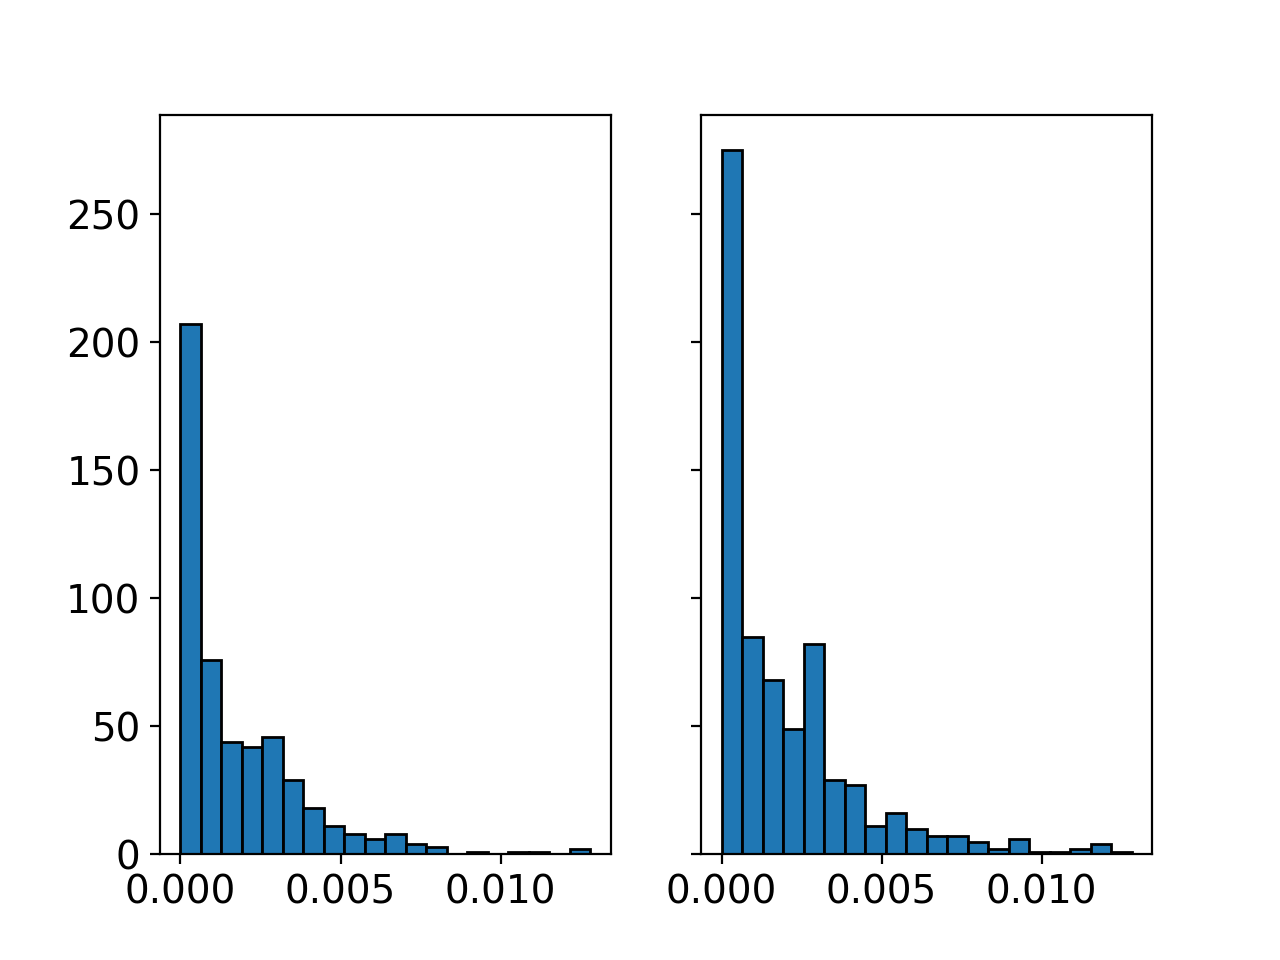

(array([275.,  85.,  68.,  49.,  82.,  29.,  27.,  11.,  16.,  10.,   7.,
          7.,   5.,   2.,   6.,   1.,   1.,   2.,   4.,   1.]),
 array([0.        , 0.00064037, 0.00128073, 0.0019211 , 0.00256146,
        0.00320183, 0.00384219, 0.00448256, 0.00512292, 0.00576329,
        0.00640365, 0.00704402, 0.00768438, 0.00832475, 0.00896511,
        0.00960548, 0.01024585, 0.01088621, 0.01152658, 0.01216694,
        0.01280731]),
 <a list of 20 Patch objects>)

In [123]:
fig, axes = plt.subplots(1,2, sharey=True, sharex=True)
_, bins, _ = axes[0].hist(engagement_avg_PB, bins=20, edgecolor='black')
axes[1].hist(engagement_avg_PLA, bins=bins, edgecolor='black')

<IPython.core.display.Javascript object>


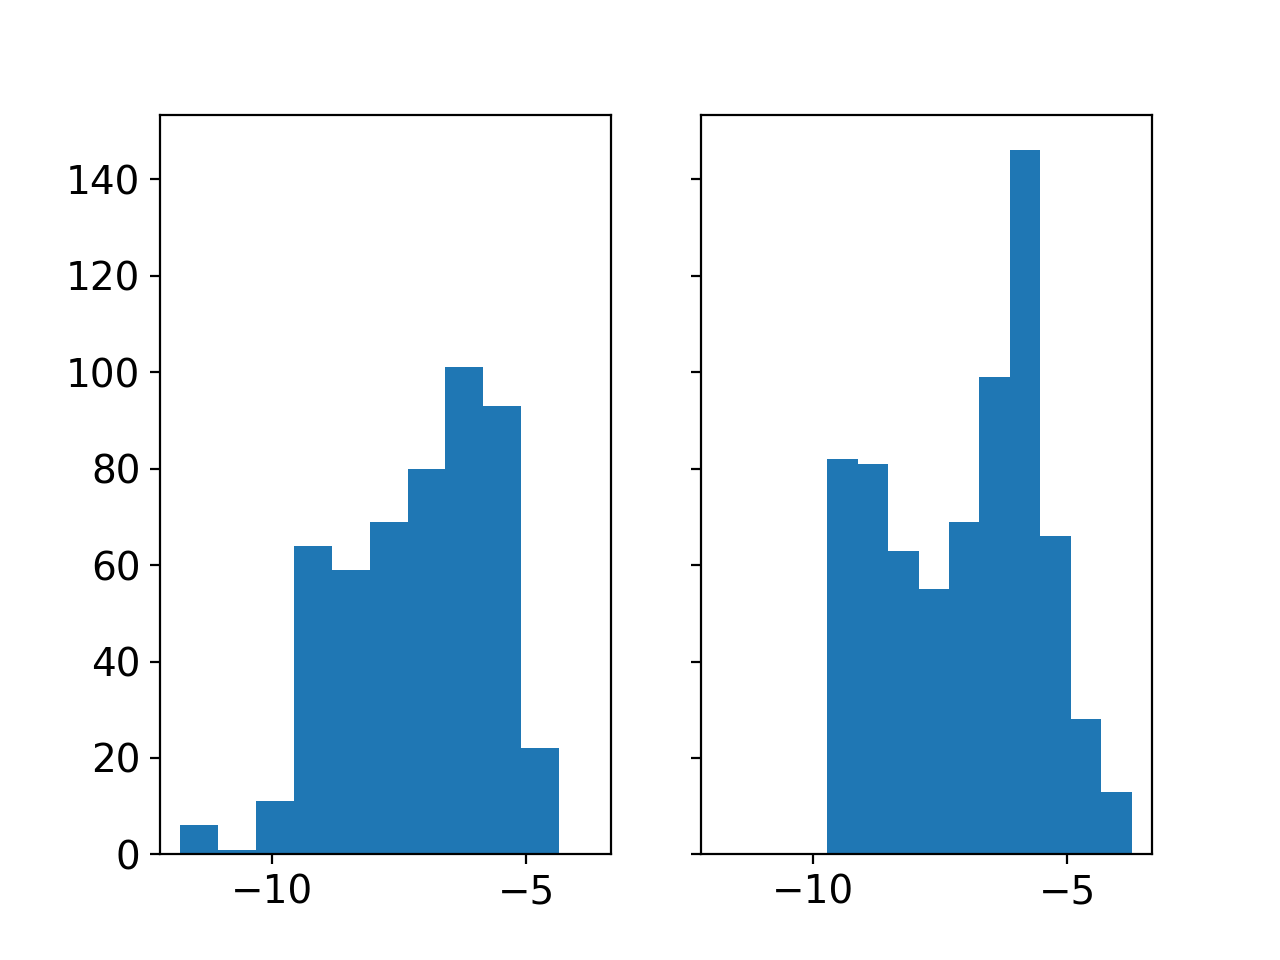

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


(array([ 82.,  81.,  63.,  55.,  69.,  99., 146.,  66.,  28.,  13.]),
 array([-9.70977248, -9.11305947, -8.51634647, -7.91963347, -7.32292047,
        -6.72620747, -6.12949446, -5.53278146, -4.93606846, -4.33935546,
        -3.74264245]),
 <a list of 10 Patch objects>)

In [169]:
fig, axes = plt.subplots(1,2, sharey=True, sharex=True)
engagement_avg_PB_log = np.log(engagement_avg_PB)
engagement_avg_PB_log = engagement_avg_PB_log[np.isfinite(engagement_avg_PB_log)]
engagement_avg_PLA_log = np.log(engagement_avg_PLA)
engagement_avg_PLA_log = engagement_avg_PLA_log[np.isfinite(engagement_avg_PLA_log)]
axes[0].hist(engagement_avg_PB_log)
axes[1].hist(engagement_avg_PLA_log)

<IPython.core.display.Javascript object>


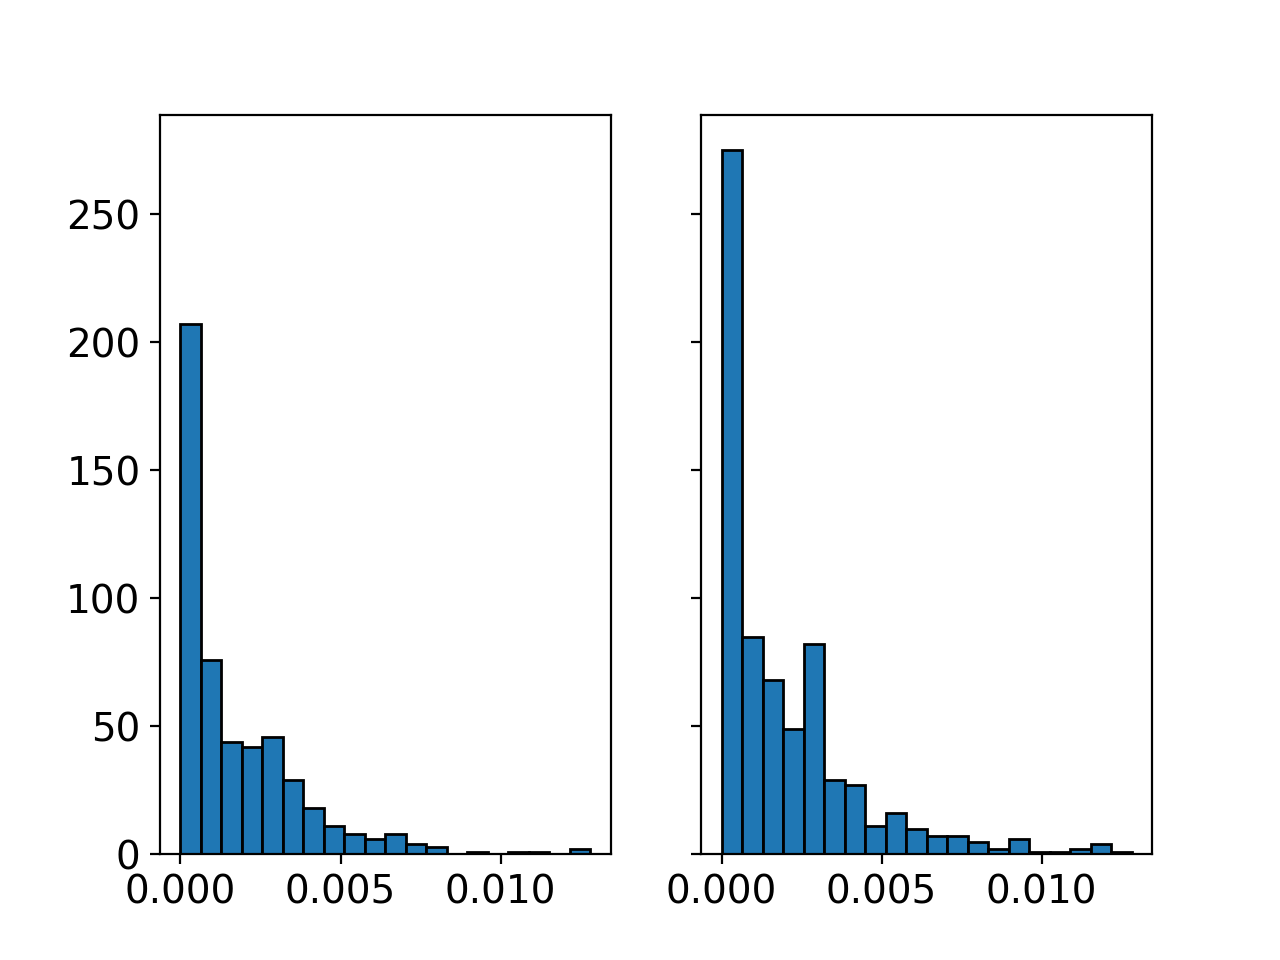

(array([275.,  85.,  68.,  49.,  82.,  29.,  27.,  11.,  16.,  10.,   7.,
          7.,   5.,   2.,   6.,   1.,   1.,   2.,   4.,   1.]),
 array([0.        , 0.00064037, 0.00128073, 0.0019211 , 0.00256146,
        0.00320183, 0.00384219, 0.00448256, 0.00512292, 0.00576329,
        0.00640365, 0.00704402, 0.00768438, 0.00832475, 0.00896511,
        0.00960548, 0.01024585, 0.01088621, 0.01152658, 0.01216694,
        0.01280731]),
 <a list of 20 Patch objects>)

In [158]:
fig, axes = plt.subplots(1,2, sharey=True, sharex=True)
_, bins, _ = axes[0].hist(engagement_avg_PB, bins=20, edgecolor='black')
axes[1].hist(engagement_avg_PLA, bins=bins, edgecolor='black')

<IPython.core.display.Javascript object>


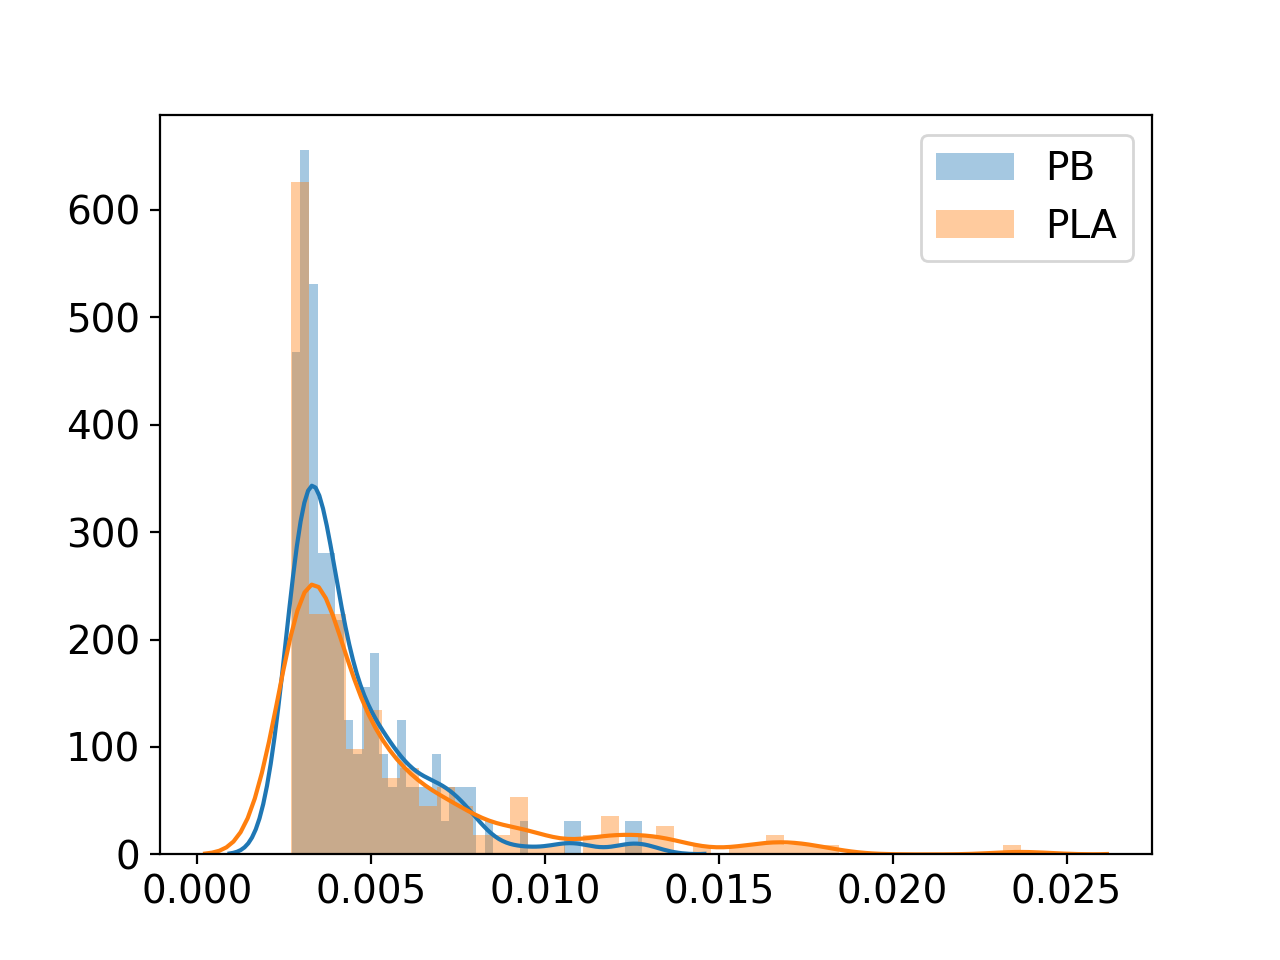

In [189]:
import seaborn as sns
fig, axes = plt.subplots(1,1)
threshold = 0.0027
sns.distplot(engagement_avg_PB[np.where(engagement_avg_PB>threshold)], bins=40, label='PB')
sns.distplot(engagement_avg_PLA[np.where(engagement_avg_PLA>threshold)], bins=40, label='PLA')
plt.legend()

<IPython.core.display.Javascript object>


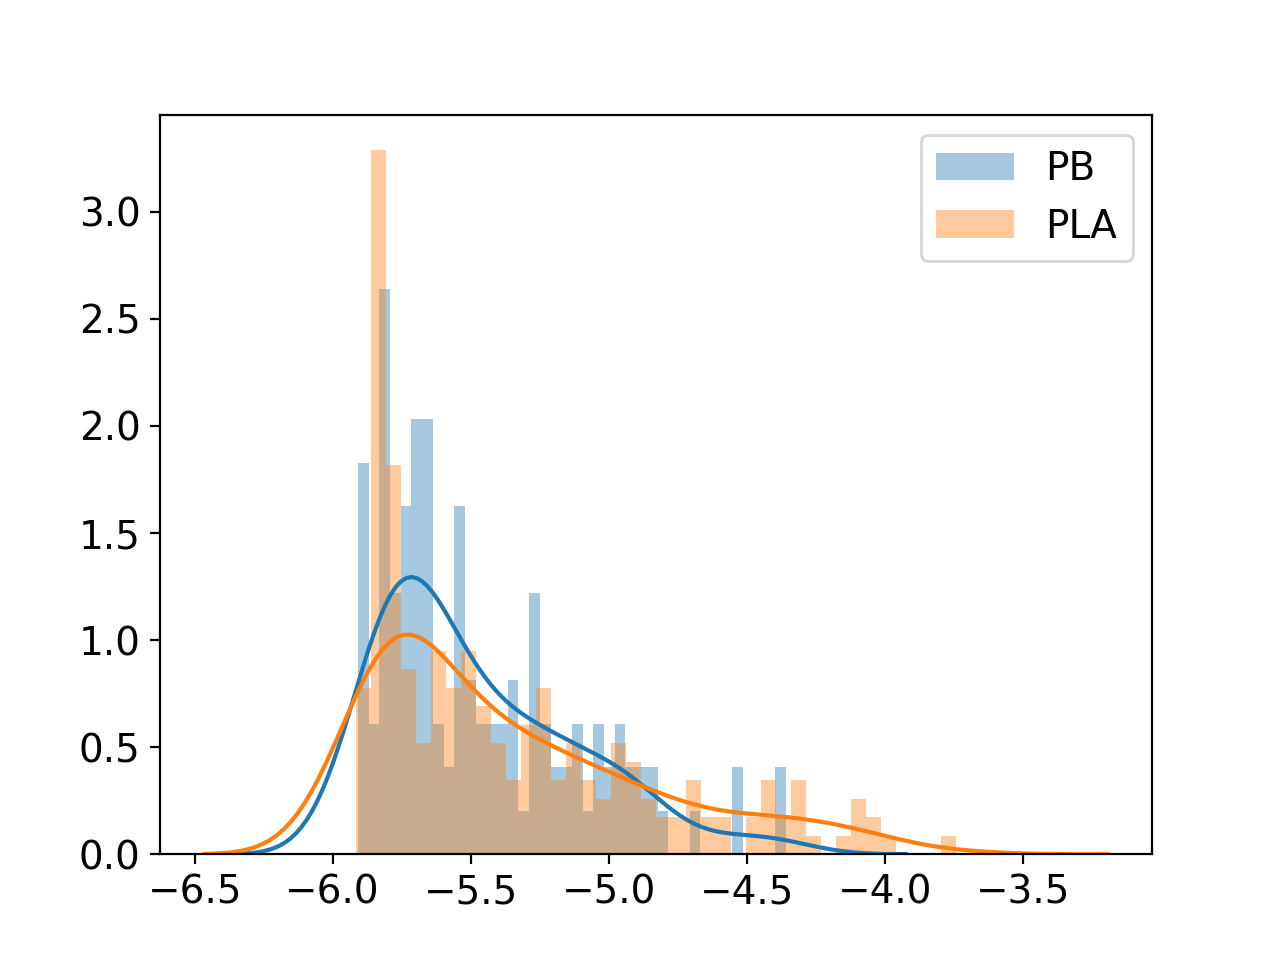

In [191]:
import seaborn as sns
threshold = 0.0027
engagement_avg_PB_log = np.log(engagement_avg_PB[np.where(engagement_avg_PB>=threshold)])
engagement_avg_PB_log = engagement_avg_PB_log[np.isfinite(engagement_avg_PB_log)]
engagement_avg_PLA_log = np.log(engagement_avg_PLA[np.where(engagement_avg_PLA>=threshold)])
engagement_avg_PLA_log = engagement_avg_PLA_log[np.isfinite(engagement_avg_PLA_log)]

fig, axes = plt.subplots(1,1)
sns.distplot(engagement_avg_PB_log, bins=40, label='PB')
sns.distplot(engagement_avg_PLA_log, bins=40, label='PLA')
plt.legend()

<IPython.core.display.Javascript object>


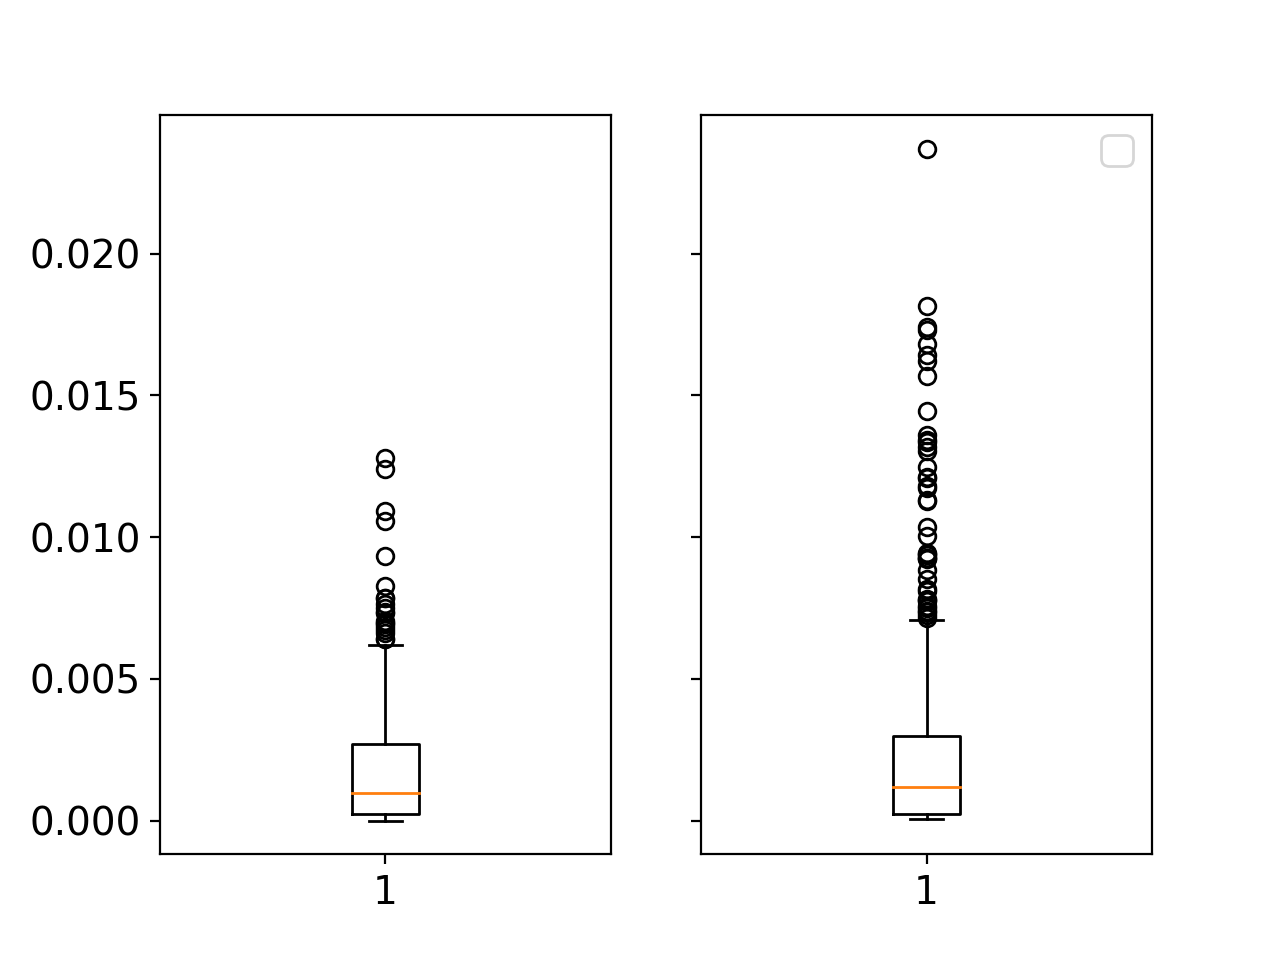

No handles with labels found to put in legend.


In [180]:
fig, axes = plt.subplots(1,2, sharey=True)
axes[0].boxplot(engagement_avg_PB)
axes[1].boxplot(engagement_avg_PLA)
plt.legend()

In [143]:
print('PB:')
print('\tmean={}, median={}, mode={}'.format(engagement_avg_PB.mean(), 
                                    np.median(engagement_avg_PB),
                                    stats.mode(engagement_avg_PB)[0][0]))

print('PLA:')
print('\tmean={}, median={}, mode={}'.format(engagement_avg_PLA.mean(), 
                                    np.median(engagement_avg_PLA),
                                    stats.mode(engagement_avg_PLA)[0][0]))

PB:
	mean=0.0017477236790719008, median=0.000969303247529054, mode=0.0001386852394916911
PLA:
	mean=0.0022023802750214343, median=0.00120129385250353, mode=6.964809384164223e-05


### Normalty test
not normal distribution

In [100]:
 # normality test
print('\tD’Agostino and Pearson’s Test')
statistic_PB, pvalue_PB = stats.normaltest(engagement_avg_PB)
statistic_PLA, pvalue_PLA = stats.normaltest(engagement_avg_PLA)
print('\t\tPB Normality: statistic={}, pvalue={}'.format(statistic_PB, pvalue_PB))
print('\t\tPLA Normality: statistic={}, pvalue={}'.format(statistic_PLA, pvalue_PLA))

statistic_PB, pvalue_PB = stats.shapiro(engagement_avg_PB)
statistic_PLA, pvalue_PLA = stats.shapiro(engagement_avg_PLA)
print('\tShapiro-Wilk Test')
print('\t\tPB Normality: statistic={}, pvalue={}'.format(statistic_PB, pvalue_PB))
print('\t\tPLA Normality: statistic={}, pvalue={}'.format(statistic_PLA, pvalue_PLA))

	D’Agostino and Pearson’s Test
		PB Normality: statistic=216.41532466395367, pvalue=1.013933213643871e-47
		PLA Normality: statistic=447.76127525555154, pvalue=5.886734829557644e-98
	Shapiro-Wilk Test
		PB Normality: statistic=0.7925273776054382, pvalue=6.422321240201549e-25
		PLA Normality: statistic=0.6899579167366028, pvalue=6.121638920344016e-34


In [170]:
engagement_avg_PB_log = np.log(engagement_avg_PB)
engagement_avg_PB_log = engagement_avg_PB_log[np.isfinite(engagement_avg_PB_log)]
engagement_avg_PLA_log = np.log(engagement_avg_PLA)
engagement_avg_PLA_log = engagement_avg_PLA_log[np.isfinite(engagement_avg_PLA_log)]

 # normality test
print('\tD’Agostino and Pearson’s Test')
statistic_PB, pvalue_PB = stats.normaltest(engagement_avg_PB_log)
statistic_PLA, pvalue_PLA = stats.normaltest(engagement_avg_PLA_log)
print('\t\tPB Normality: statistic={}, pvalue={}'.format(statistic_PB, pvalue_PB))
print('\t\tPLA Normality: statistic={}, pvalue={}'.format(statistic_PLA, pvalue_PLA))

statistic_PB, pvalue_PB = stats.shapiro(engagement_avg_PB_log)
statistic_PLA, pvalue_PLA = stats.shapiro(engagement_avg_PLA_log)
print('\tShapiro-Wilk Test')
print('\t\tPB Normality: statistic={}, pvalue={}'.format(statistic_PB, pvalue_PB))
print('\t\tPLA Normality: statistic={}, pvalue={}'.format(statistic_PLA, pvalue_PLA))

	D’Agostino and Pearson’s Test
		PB Normality: statistic=22.72570725449027, pvalue=1.1619177092552027e-05
		PLA Normality: statistic=311.3001957670795, pvalue=2.5236050132394334e-68
	Shapiro-Wilk Test
		PB Normality: statistic=0.9603680372238159, pvalue=1.9809331952558296e-10
		PLA Normality: statistic=0.950562059879303, pvalue=1.3911481931423286e-14


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [147]:
 # normality test
threshold = 0.005
print('\tD’Agostino and Pearson’s Test')
statistic_PB, pvalue_PB = stats.normaltest(engagement_avg_PB[np.where(engagement_avg_PB>threshold)])
statistic_PLA, pvalue_PLA = stats.normaltest(engagement_avg_PLA[np.where(engagement_avg_PLA>threshold)])
print('\t\tPB Normality: statistic={}, pvalue={}'.format(statistic_PB, pvalue_PB))
print('\t\tPLA Normality: statistic={}, pvalue={}'.format(statistic_PLA, pvalue_PLA))

statistic_PB, pvalue_PB = stats.shapiro(engagement_avg_PB[np.where(engagement_avg_PB>threshold)])
statistic_PLA, pvalue_PLA = stats.shapiro(engagement_avg_PLA[np.where(engagement_avg_PLA>threshold)])
print('\tShapiro-Wilk Test')
print('\t\tPB Normality: statistic={}, pvalue={}'.format(statistic_PB, pvalue_PB))
print('\t\tPLA Normality: statistic={}, pvalue={}'.format(statistic_PLA, pvalue_PLA))

	D’Agostino and Pearson’s Test
		PB Normality: statistic=17.368709847560044, pvalue=0.00016921255290807777
		PLA Normality: statistic=22.953848884956628, pvalue=1.0366569064636866e-05
	Shapiro-Wilk Test
		PB Normality: statistic=0.8160470724105835, pvalue=2.7865327865583822e-05
		PLA Normality: statistic=0.8395618200302124, pvalue=8.466498968573433e-08


In [205]:
threshold = 0.0027
stats.kruskal(engagement_avg_PB[np.where(engagement_avg_PB>threshold)], 
              engagement_avg_PLA[np.where(engagement_avg_PLA>threshold)])


KruskalResult(statistic=0.9971393233438448, pvalue=0.3180036993647286)

In [ ]:
stats.kruskal(engagement_avg_PB_log, engagement_avg_PLA_log)


## t-test
standard t-test

In [45]:
from scipy import stats
t_PB_PLA, p_PB_PLA = stats.ttest_ind(engagement_avg_PB, engagement_avg_PLA)
t_PB_SARA, p_PB_SARA = stats.ttest_ind(engagement_avg_PB, engagement_avg_SARA)
t_PB_ACRA, p_PB_ACRA =stats.ttest_ind(engagement_avg_PB, engagement_avg_ACRA)
t_PLA_SARA, p_PLA_SARA =stats.ttest_ind(engagement_avg_PLA, engagement_avg_SARA)
t_PLA_ACRA, p_PLA_ACRA = stats.ttest_ind(engagement_avg_PLA, engagement_avg_ACRA)
t_SARA_ACRA, t_SARA_ACRA =stats.ttest_ind(engagement_avg_SARA, engagement_avg_ACRA)
print('t_PB_PLA={0:.4f}, p_PB_PLA={1:.4f}'.format(t_PB_PLA, p_PB_PLA))
print('t_PB_SARA={0:.4f}, p_PB_SARA={1:.4f}'.format(t_PB_SARA, p_PB_SARA))
print('t_PB_ACRA={0:.4f}, p_PB_ACRA={1:.4f}'.format(t_PB_ACRA, p_PB_ACRA))
print('t_PLA_SARA={0:.4f}, p_PLA_SARA={1:.4f}'.format(t_PLA_SARA, p_PLA_SARA))
print('t_PLA_ACRA={0:.4f}, p_PLA_ACRA={1:.4f}'.format(t_PLA_ACRA, p_PLA_ACRA))
print('t_SARA_ACRA={0:.4f}, t_SARA_ACRA={1:.4f}'.format(t_SARA_ACRA, t_SARA_ACRA))


t_PB_PLA=-2.9835, p_PB_PLA=0.0029
t_PB_SARA=-2.4707, p_PB_SARA=0.0137
t_PB_ACRA=3.4518, p_PB_ACRA=0.0006
t_PLA_SARA=-0.2238, p_PLA_SARA=0.8230
t_PLA_ACRA=3.5795, p_PLA_ACRA=0.0004
t_SARA_ACRA=0.0000, t_SARA_ACRA=0.0000


Welch’s t-test, which does not assume equal population variance

raw

In [46]:
from scipy import stats
t_PB_PLA, p_PB_PLA = stats.ttest_ind(engagement_avg_PB, engagement_avg_PLA, equal_var=False)
t_PB_SARA, p_PB_SARA = stats.ttest_ind(engagement_avg_PB, engagement_avg_SARA, equal_var=False)
t_PB_ACRA, p_PB_ACRA =stats.ttest_ind(engagement_avg_PB, engagement_avg_ACRA, equal_var=False)
t_PLA_SARA, p_PLA_SARA =stats.ttest_ind(engagement_avg_PLA, engagement_avg_SARA, equal_var=False)
t_PLA_ACRA, p_PLA_ACRA = stats.ttest_ind(engagement_avg_PLA, engagement_avg_ACRA, equal_var=False)
t_SARA_ACRA, t_SARA_ACRA =stats.ttest_ind(engagement_avg_SARA, engagement_avg_ACRA, equal_var=False)
print('t_PB_PLA={0:.4f}, p_PB_PLA={1:.4f}'.format(t_PB_PLA, p_PB_PLA))
print('t_PB_SARA={0:.4f}, p_PB_SARA={1:.4f}'.format(t_PB_SARA, p_PB_SARA))
print('t_PB_ACRA={0:.4f}, p_PB_ACRA={1:.4f}'.format(t_PB_ACRA, p_PB_ACRA))
print('t_PLA_SARA={0:.4f}, p_PLA_SARA={1:.4f}'.format(t_PLA_SARA, p_PLA_SARA))
print('t_PLA_ACRA={0:.4f}, p_PLA_ACRA={1:.4f}'.format(t_PLA_ACRA, p_PLA_ACRA))
print('t_SARA_ACRA={0:.4f}, t_SARA_ACRA={1:.4f}'.format(t_SARA_ACRA, t_SARA_ACRA))


t_PB_PLA=-3.1743, p_PB_PLA=0.0015
t_PB_SARA=-2.1618, p_PB_SARA=0.0321
t_PB_ACRA=6.7400, p_PB_ACRA=0.0000
t_PLA_SARA=-0.2538, p_PLA_SARA=0.7999
t_PLA_ACRA=9.0715, p_PLA_ACRA=0.0000
t_SARA_ACRA=0.0000, t_SARA_ACRA=0.0000


normalized

In [47]:
from scipy import stats
norm_engagement_avg_PB = engagement_avg_PB / point_avg_PB.mean()
norm_engagement_avg_PLA = engagement_avg_PLA / point_avg_PLA.mean()
norm_engagement_avg_SARA = engagement_avg_SARA / point_avg_SARA.mean()
norm_engagement_avg_ACRA = engagement_avg_ACRA / point_avg_ACRA.mean()

t_PB_PLA, p_PB_PLA = stats.ttest_ind(norm_engagement_avg_PB, norm_engagement_avg_PLA, equal_var=False)
t_PB_SARA, p_PB_SARA = stats.ttest_ind(norm_engagement_avg_PB, norm_engagement_avg_SARA, equal_var=False)
t_PB_ACRA, p_PB_ACRA =stats.ttest_ind(norm_engagement_avg_PB, norm_engagement_avg_ACRA, equal_var=False)
t_PLA_SARA, p_PLA_SARA =stats.ttest_ind(norm_engagement_avg_PLA, norm_engagement_avg_SARA, equal_var=False)
t_PLA_ACRA, p_PLA_ACRA = stats.ttest_ind(norm_engagement_avg_PLA, norm_engagement_avg_ACRA, equal_var=False)
t_SARA_ACRA, t_SARA_ACRA =stats.ttest_ind(norm_engagement_avg_SARA, norm_engagement_avg_ACRA, equal_var=False)
print('t_PB_PLA={0:.4f}, p_PB_PLA={1:.4f}'.format(t_PB_PLA, p_PB_PLA))
print('t_PB_SARA={0:.4f}, p_PB_SARA={1:.4f}'.format(t_PB_SARA, p_PB_SARA))
print('t_PB_ACRA={0:.4f}, p_PB_ACRA={1:.4f}'.format(t_PB_ACRA, p_PB_ACRA))
print('t_PLA_SARA={0:.4f}, p_PLA_SARA={1:.4f}'.format(t_PLA_SARA, p_PLA_SARA))
print('t_PLA_ACRA={0:.4f}, p_PLA_ACRA={1:.4f}'.format(t_PLA_ACRA, p_PLA_ACRA))
print('t_SARA_ACRA={0:.4f}, t_SARA_ACRA={1:.4f}'.format(t_SARA_ACRA, t_SARA_ACRA))


t_PB_PLA=-2.6892, p_PB_PLA=0.0073
t_PB_SARA=2.1428, p_PB_SARA=0.0331
t_PB_ACRA=3.8704, p_PB_ACRA=0.0002
t_PLA_SARA=4.1507, p_PLA_SARA=0.0000
t_PLA_ACRA=5.9435, p_PLA_ACRA=0.0000
t_SARA_ACRA=0.2473, t_SARA_ACRA=0.2473


In [202]:
stats.kruskal(engagement_avg_PB, engagement_avg_PLA)


KruskalResult(statistic=1.3686770813616076, pvalue=0.24203930950454206)

In [201]:
stats.kruskal(norm_engagement_avg_PB, norm_engagement_avg_PLA)

KruskalResult(statistic=0.5202587002681002, pvalue=0.47073134868866606)

In [197]:
stats.mannwhitneyu(engagement_avg_PB, engagement_avg_PLA, alternative='two-sided')

MannwhitneyuResult(statistic=170948.5, pvalue=0.24207290277111382)

In [198]:
stats.mannwhitneyu(norm_engagement_avg_PB, norm_engagement_avg_PLA, alternative='two-sided')

MannwhitneyuResult(statistic=173636.0, pvalue=0.4707826910461057)

In [103]:
#stats.wilcoxon(engagement_avg_PB, engagement_avg_PLA)

ks-test

In [48]:
# KS_PB_PLA, p_PB_PLA = stats.ks_2samp(engagement_avg_PB, engagement_avg_PLA)
# KS_PB_SARA, p_PB_SARA = stats.ks_2samp(engagement_avg_PB, engagement_avg_SARA)
# KS_PB_ACRA, p_PB_ACRA =stats.ks_2samp(engagement_avg_PB, engagement_avg_ACRA)
# KS_PLA_SARA, p_PLA_SARA =stats.ks_2samp(engagement_avg_PLA, engagement_avg_SARA)
# KS_PLA_ACRA, p_PLA_ACRA = stats.ks_2samp(engagement_avg_PLA, engagement_avg_ACRA)
# KS_SARA_ACRA, p_SARA_ACRA =stats.ks_2samp(engagement_avg_SARA, engagement_avg_ACRA)
# print('KS_PB_PLA={0:.4f}, p_PB_PLA={1:.4f}'.format(KS_PB_PLA, p_PB_PLA*2))
# print('KS_PB_SARA={0:.4f}, p_PB_SARA={1:.4f}'.format(KS_PB_SARA, p_PB_SARA*2))
# print('KS_PB_ACRA={0:.4f}, p_PB_ACRA={1:.4f}'.format(KS_PB_ACRA, p_PB_ACRA*2))
# print('KS_PLA_SARA={0:.4f}, p_PLA_SARA={1:.4f}'.format(KS_PLA_SARA, p_PLA_SARA*2))
# print('KS_PLA_ACRA={0:.4f}, p_PLA_ACRA={1:.4f}'.format(KS_PLA_ACRA, p_PLA_ACRA*2))
# print('KS_SARA_ACRA={0:.4f}, p_SARA_ACRA={1:.4f}'.format(KS_SARA_ACRA, p_SARA_ACRA*2))

In [49]:
# norm_engagement_avg_PB = engagement_avg_PB / point_avg_PB.mean()
# norm_engagement_avg_PLA = engagement_avg_PLA / point_avg_PLA.mean()
# norm_engagement_avg_SARA = engagement_avg_SARA / point_avg_SARA.mean()
# norm_engagement_avg_ACRA = engagement_avg_ACRA / point_avg_ACRA.mean()

# KS_PB_PLA, p_PB_PLA = stats.ks_2samp(norm_engagement_avg_PB, norm_engagement_avg_PLA)
# KS_PB_SARA, p_PB_SARA = stats.ks_2samp(norm_engagement_avg_PB, norm_engagement_avg_SARA)
# KS_PB_ACRA, p_PB_ACRA =stats.ks_2samp(norm_engagement_avg_PB, norm_engagement_avg_ACRA)
# KS_PLA_SARA, p_PLA_SARA =stats.ks_2samp(norm_engagement_avg_PLA, norm_engagement_avg_SARA)
# KS_PLA_ACRA, p_PLA_ACRA = stats.ks_2samp(norm_engagement_avg_PLA, norm_engagement_avg_ACRA)
# KS_SARA_ACRA, p_SARA_ACRA =stats.ks_2samp(norm_engagement_avg_SARA, norm_engagement_avg_ACRA)
# print('KS_PB_PLA={0:.4f}, p_PB_PLA={1:.4f}'.format(KS_PB_PLA, p_PB_PLA*2))
# print('KS_PB_SARA={0:.4f}, p_PB_SARA={1:.4f}'.format(KS_PB_SARA, p_PB_SARA*2))
# print('KS_PB_ACRA={0:.4f}, p_PB_ACRA={1:.4f}'.format(KS_PB_ACRA, p_PB_ACRA*2))
# print('KS_PLA_SARA={0:.4f}, p_PLA_SARA={1:.4f}'.format(KS_PLA_SARA, p_PLA_SARA*2))
# print('KS_PLA_ACRA={0:.4f}, p_PLA_ACRA={1:.4f}'.format(KS_PLA_ACRA, p_PLA_ACRA*2))
# print('KS_SARA_ACRA={0:.4f}, p_SARA_ACRA={1:.4f}'.format(KS_SARA_ACRA, p_SARA_ACRA*2))

# Active Interaction

In [50]:
with open('./cleaned_active_interaction_data/PB_active_interaction.pickle', 'rb') as handle:
    PB_data = pickle.load(handle)
    
with open('./cleaned_active_interaction_data/PLA_active_interaction.pickle', 'rb') as handle:
    PLA_data = pickle.load(handle)

with open('./cleaned_active_interaction_data/SARA_active_interaction.pickle', 'rb') as handle:
    SARA_data = pickle.load(handle)

with open('./cleaned_active_interaction_data/ACRA_active_interaction.pickle', 'rb') as handle:
    ACRA_data = pickle.load(handle)


In [51]:
def add_explanatory_variable_columns(data, 
                                     behavior_mode='PB', 
                                     time_window=5,
                                     IR_reading_based_counting = False,
                                     active_interaction_reward_threshold=0.5,
                                     active_interaction_IR_threshold=0.1):
    """
    Add date code, time code, behavior code for each row.
    
    Args:
        data (dict):
            data['data']:
            data['separate_line']:
            data['date']:
        behavior_mode (str):
            1. 'PB'
            2. 'PLA'
            3. 'SARA'
            4. 'ACRA'
        time_window (int): minutes
        IR_reading_based_counting (bool): default = False
            if True, based on IR reading; Otherwise, based on reward.
        active_interaction_reward_threshold (float): default=0.5,
        active_interaction_IR_threshold  (float): default=0.1
    """
    date_code = {'2018-09-14':5,
                 '2018-09-17':1, '2018-09-18':2, '2018-09-19':3, '2018-09-20':4, '2018-09-21':5,
                 '2018-09-24':1, '2018-09-25':2, '2018-09-26':3, '2018-09-27':4, '2018-09-28':5,
                 '2018-10-02':2, '2018-10-03':3, '2018-10-05':5}
#     date_code = {'2018-09-14':0,
#                  '2018-09-17':1, '2018-09-18':2, '2018-09-19':3, '2018-09-20':4, '2018-09-21':5,
#                  '2018-09-24':6, '2018-09-25':7, '2018-09-26':8, '2018-09-27':9, '2018-09-28':10,
#                  '2018-10-02':11, '2018-10-03':12, '2018-10-05':13}
    time_code = {'1': ['13:00:00', '13:29:59'],
                 '2': ['13:30:00', '13:59:59'],
                 '3': ['14:00:00', '14:29:59'],
                 '4': ['14:30:00', '14:59:59'],
                 '5': ['15:00:00', '15:29:59'], 
                 '6': ['15:30:00', '15:59:59']}
    behavior_code = {'PB': 0, 'PLA': 1, 'SARA': 2, 'ACRA': 3}
    
    explanatory_vars = {'behavior_code':[], 
                        'date_code':[], 
                        'time_code':[], 
                        'active_interaction_count':[],
                        'total_interaction_count':[],
                        'date':[]}
    # datetime format
    datetime_format = '%Y-%m-%d %H:%M:%S.%f'
    
    day_separate_line = list(data['separate_line'])
    day_separate_line.insert(0, 0)
    day_num = len(day_separate_line)-1
    print('Behavior: {}, total_days={}'.format(behavior_mode, day_num))
    
    for day_i in range(day_num):
        # get start and end index of a day
        day_start_index = day_separate_line[day_i]
        day_end_index = day_separate_line[day_i+1]-1
        #print('day {}: day_start_index={}, day_end_index={}'.format(day_i+1, day_start_index, day_end_index))
        
        # get start and end time of a day
        day_start_time = datetime.strptime(data['data'].iloc[day_start_index]['timestamp'], datetime_format)
        day_end_time = datetime.strptime(data['data'].iloc[day_end_index]['timestamp'], datetime_format)
        print('day {}: day_start_time={}, day_end_time={}'.format(day_i+1, day_start_time, day_end_time))
        
        # get time window
        stop_time_series = []
        for i in range(day_start_index, day_end_index):
            sensor_reading = data['data'].iloc[i]
            time = datetime.strptime(sensor_reading['timestamp'], datetime_format)
            if i == day_start_index:
                stop_time = time+timedelta(minutes=time_window-1, seconds=59)
                #print('stop_time={}'.format(stop_time.strftime("%Y-%m-%d %H:%M:%S.%f")))
                stop_time_series.append(stop_time)
            elif time >= stop_time_series[len(stop_time_series)-1]:
                stop_time = time+timedelta(minutes=time_window)
                if stop_time>day_end_time:
                    stop_time = day_end_time
                #print('stop_time={}'.format(stop_time.strftime("%Y-%m-%d %H:%M:%S.%f")))
                stop_time_series.append(stop_time)
        
        # count within a time window
        active_interaction_count = 0
        total_interaction_count = 0
        time_window_count = 0
        for i in range(day_start_index, day_end_index+1):
            
            sensor_reading = data['data'].iloc[i]
            time = datetime.strptime(sensor_reading['timestamp'], datetime_format) 
#             import pdb
#             pdb.set_trace()
            
            if time <= stop_time_series[time_window_count]:
                if IR_reading_based_counting == True:
                    for IR in sensor_reading.index[1:25]:
                        if sensor_reading[IR] >= active_interaction_IR_threshold:
                            active_interaction_count += 1
                    total_interaction_count += 1
                else:
                    if sensor_reading['reward_IR_distance'] >= active_interaction_reward_threshold:
                        active_interaction_count += 1
                    total_interaction_count += 1
            
            if time > stop_time_series[time_window_count] or time == day_end_time:
                #i = i-1
                sensor_reading = data['data'].iloc[i-1]
                time = datetime.strptime(sensor_reading['timestamp'], datetime_format)
                #print('stop_time_series[time_window_count]={}, time={}'.format(stop_time_series[time_window_count], time))
                
                bc_tmp = behavior_code[behavior_mode]
                dc_tmp = date_code[time.strftime("%Y-%m-%d")]
                tc_tmp = -1
                for k in time_code.keys():
                    if time_code[k][0]<=time.strftime("%H:%M:%S") and time.strftime("%H:%M:%S")<=time_code[k][1]:
                        tc_tmp = int(k)
                if tc_tmp == -1:
                    print('No time code for {}'.format(time))
                
                explanatory_vars['behavior_code'].append(bc_tmp)
                explanatory_vars['date_code'].append(dc_tmp)
                explanatory_vars['time_code'].append(tc_tmp)
                explanatory_vars['date'].append(time.strftime("%Y-%m-%d"))

                explanatory_vars['active_interaction_count'].append(active_interaction_count)
                explanatory_vars['total_interaction_count'].append(total_interaction_count)
                
                # reset
                time_window_count = time_window_count+1
                active_interaction_count = 0
                total_interaction_count = 0
    
    return pd.DataFrame(explanatory_vars)


time_window=1 # minutes
IR_reading_based_counting = True#True#False
active_interaction_reward_threshold=0.5
# IR range [10cm, 80cm] is converted into [1, 0]
#     0.25 corresponds to about closer than 62.5cm.
#     0.5 corresponds to about colser than 55 cm.
#     0.75 corresponds to about closer than 27.5cm.
active_interaction_IR_threshold = 0.25#0.2

add_explanatory_variables_PB = add_explanatory_variable_columns(PB_data, 
                                                                'PB', 
                                                                time_window, 
                                                                IR_reading_based_counting,
                                                                active_interaction_reward_threshold,
                                                                active_interaction_IR_threshold)
add_explanatory_variables_PLA = add_explanatory_variable_columns(PLA_data,
                                                                 'PLA', 
                                                                 time_window, 
                                                                 IR_reading_based_counting,
                                                                 active_interaction_reward_threshold,
                                                                 active_interaction_IR_threshold)

add_explanatory_variables_SARA = add_explanatory_variable_columns(SARA_data,
                                                                 'SARA', 
                                                                 time_window, 
                                                                 IR_reading_based_counting,
                                                                 active_interaction_reward_threshold,
                                                                 active_interaction_IR_threshold)

add_explanatory_variables_ACRA = add_explanatory_variable_columns(ACRA_data,
                                                                 'ACRA', 
                                                                 time_window, 
                                                                 IR_reading_based_counting,
                                                                 active_interaction_reward_threshold,
                                                                 active_interaction_IR_threshold)


Behavior: PB, total_days=14
day 1: day_start_time=2018-09-14 14:30:00.071998, day_end_time=2018-09-14 15:59:59.899390
day 2: day_start_time=2018-09-17 15:00:00.072148, day_end_time=2018-09-17 15:59:59.867383
day 3: day_start_time=2018-09-18 14:30:00.047061, day_end_time=2018-09-18 15:59:59.982582
day 4: day_start_time=2018-09-19 14:30:00.013349, day_end_time=2018-09-19 15:59:59.932554
day 5: day_start_time=2018-09-20 13:02:22.916799, day_end_time=2018-09-20 13:59:59.794765
day 6: day_start_time=2018-09-21 14:00:00.074933, day_end_time=2018-09-21 14:59:59.969794
day 7: day_start_time=2018-09-24 14:00:02.075400, day_end_time=2018-09-24 14:59:59.777977
day 8: day_start_time=2018-09-25 13:00:00.008425, day_end_time=2018-09-25 13:59:59.850318
day 9: day_start_time=2018-09-26 14:00:00.082711, day_end_time=2018-09-26 14:59:59.854474
day 10: day_start_time=2018-09-27 13:00:00.046482, day_end_time=2018-09-27 13:59:59.954526
day 11: day_start_time=2018-09-28 13:00:00.038597, day_end_time=2018-09

In [52]:
add_explanatory_variables_PB['date'].unique()
add_explanatory_variables_PLA['date'].unique()

array(['2018-09-17', '2018-09-18', '2018-09-19', '2018-09-20',
       '2018-09-21', '2018-09-24', '2018-09-25', '2018-09-26',
       '2018-09-27', '2018-09-28', '2018-10-02', '2018-10-03',
       '2018-10-05'], dtype=object)

In [53]:
def daily_average_active_interaction(add_explanatory_variables_PB, delete_zero=False):
    add_explanatory_variables_PB['date'].unique()
    average_active_interaction_PB = []
    for date in add_explanatory_variables_PB['date'].unique():
        date_active_interaction = add_explanatory_variables_PB.loc[add_explanatory_variables_PB['date'] == date]['active_interaction_count']
        if delete_zero:
            zero_num = np.count_nonzero(date_active_interaction==0)
            print('zeros: {}, total: {}'.format(zero_num, len(date_active_interaction)))
            if zero_num != len(date_active_interaction):
                tmp_avg = date_active_interaction.sum() / (len(date_active_interaction)-zero_num)
            else:
                tmp_avg = 0
            average_active_interaction_PB.append(tmp_avg)
        else:
            tmp_avg = date_active_interaction.mean()
            average_active_interaction_PB.append(tmp_avg)
    return np.asarray(average_active_interaction_PB)

delete_zero=False
daily_average_active_interaction_PB = daily_average_active_interaction(add_explanatory_variables_PB, delete_zero)
daily_average_active_interaction_PLA = daily_average_active_interaction(add_explanatory_variables_PLA, delete_zero)


In [54]:
# ig, axes = plt.subplots(1,1)
# axes.scatter(x=np.arange(len(daily_average_active_interaction_PB)), 
#              y=daily_average_active_interaction_PB, 
#                  marker="+", color="dodgerblue")
# axes.scatter(x=np.arange(len(daily_average_active_interaction_PLA)), 
#              y=daily_average_active_interaction_PLA,
#                  marker="o", color="deeppink")

<IPython.core.display.Javascript object>


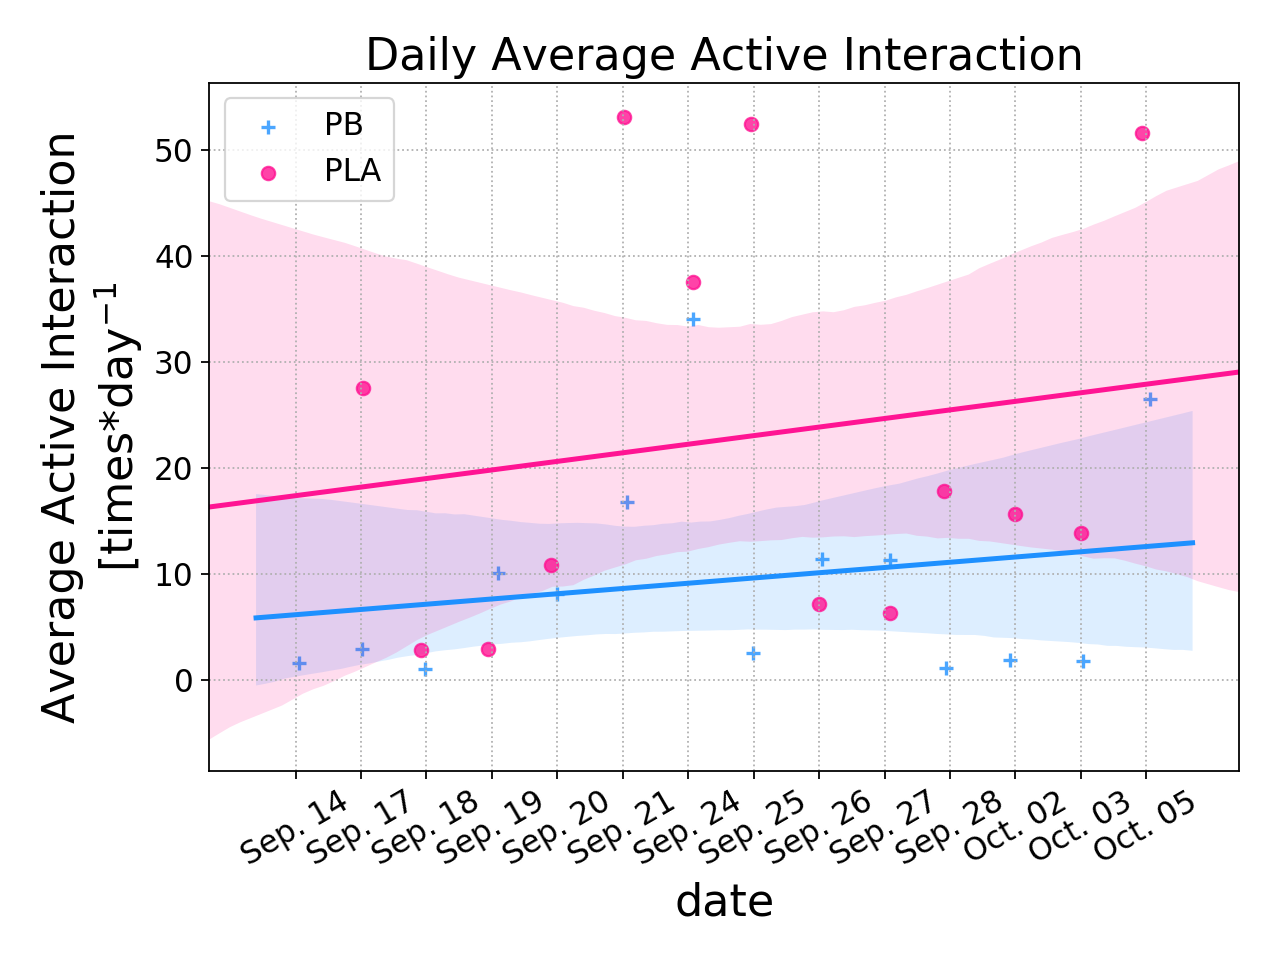

In [57]:
fig, axes = plt.subplots(1,1, figsize=(8,6), dpi= 80)
ci=95
ax = sns.regplot(x=np.arange(len(daily_average_active_interaction_PB)), y=daily_average_active_interaction_PB, ci=ci, x_jitter=.1, 
                 marker="+", color="dodgerblue",label='PB')
ax = sns.regplot(x=np.arange(1, len(daily_average_active_interaction_PLA)+1), y=daily_average_active_interaction_PLA, ci=ci, x_jitter=.1, 
                 marker="o", color="deeppink",label='PLA')
plt.xlabel('date', fontsize=20)
plt.ylabel('Average Active Interaction\n[times*day$^{-1}$', fontsize=20)
plt.xticks(np.arange(len(daily_average_active_interaction_PB)), 
           ('Sep. 14', 'Sep. 17', 'Sep. 18', 'Sep. 19', 'Sep. 20',
            'Sep. 21', 'Sep. 24', 'Sep. 25', 'Sep. 26', 'Sep. 27',
            'Sep. 28', 'Oct. 02', 'Oct. 03', 'Oct. 05'),
           rotation=30)
plt.title('Daily Average Active Interaction', fontsize=20)
plt.grid(True, linestyle=':')
plt.legend()
plt.tight_layout()
plt.savefig('./figures/Daily_Average_Active_Interaction_Comparison.jpg', dpi=150)

<IPython.core.display.Javascript object>


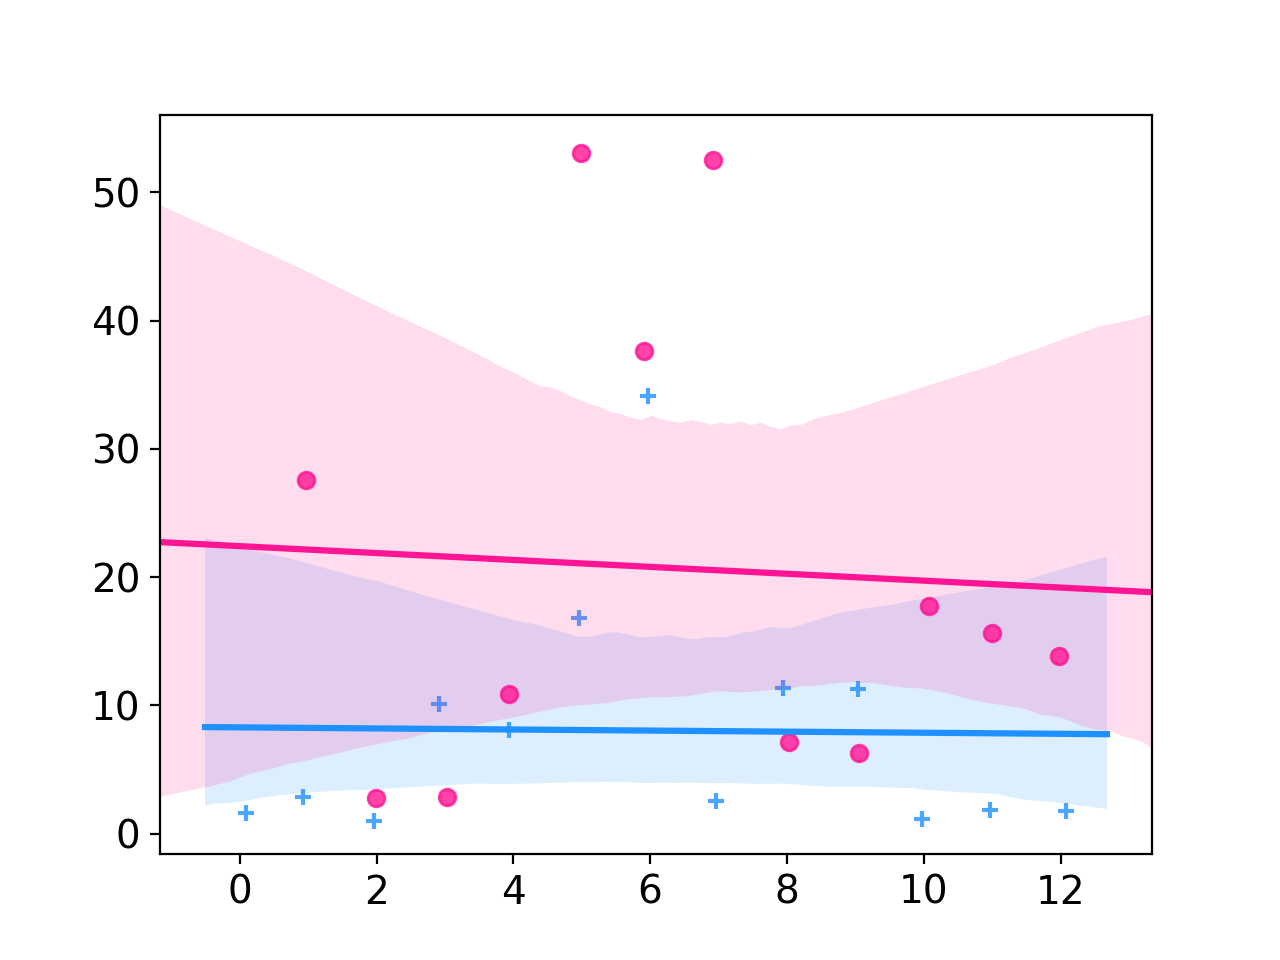

In [58]:
fig, axes = plt.subplots(1,1)
ax = sns.regplot(x=np.arange(len(daily_average_active_interaction_PB)-1), y=daily_average_active_interaction_PB[:-1], ci=ci, x_jitter=.1, 
                 marker="+", color="dodgerblue",label='PB')
ax = sns.regplot(x=np.arange(1, len(daily_average_active_interaction_PLA)+1-1), y=daily_average_active_interaction_PLA[:-1], ci=ci, x_jitter=.1, 
                 marker="o", color="deeppink",label='PLA')

## Without delete zero

<IPython.core.display.Javascript object>


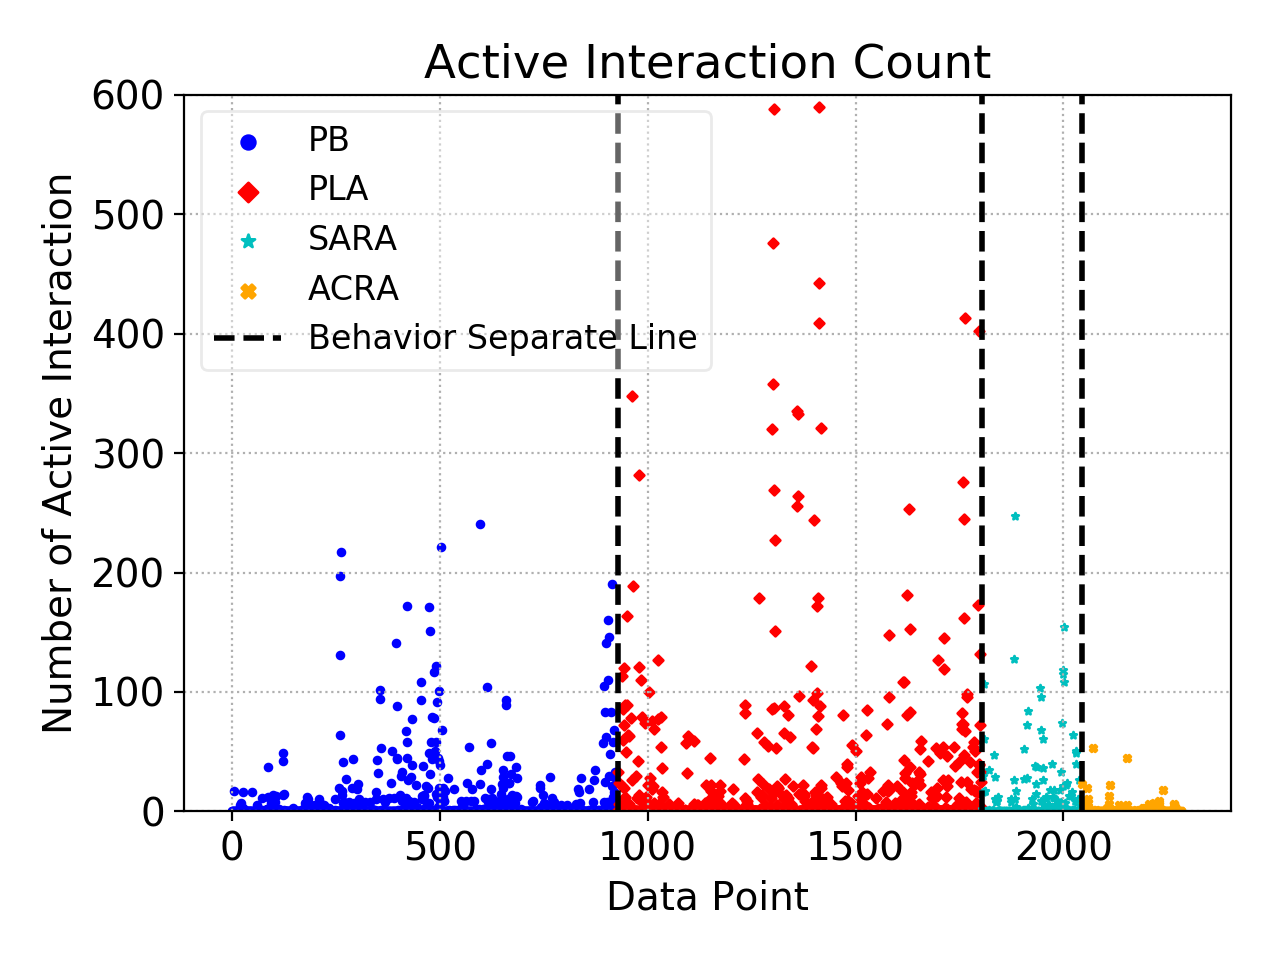

In [59]:
# divide by 10 to reduce sample frequency to 1hz and make the value more reasonable
norm_hz = 1#10
active_interaction_PB = add_explanatory_variables_PB['active_interaction_count'] / norm_hz
active_interaction_PLA = add_explanatory_variables_PLA['active_interaction_count'] / norm_hz
active_interaction_SARA = add_explanatory_variables_SARA['active_interaction_count'] / norm_hz
active_interaction_ACRA = add_explanatory_variables_ACRA['active_interaction_count'] / norm_hz

activate_interaction_datapoint_ylim = 600
activate_interaction_average_ylim = 100

# Y_PB_PLA
# separate_line_PB_PLA
# Y_SARA_ACRA
# separate_line_SARA_ACRA

plt.figure()

start_PB = 0
end_PB = len(active_interaction_PB)
handle_PB = plt.scatter(range(start_PB, end_PB), active_interaction_PB, c='b', marker='o', s = 6)

start_PLA = end_PB
end_PLA = end_PB + len(active_interaction_PLA)
handle_PLA = plt.scatter(range(start_PLA, end_PLA), active_interaction_PLA, c='r', marker='D', s = 6)

start_SARA = end_PLA
end_SARA = end_PLA + len(active_interaction_SARA)
handle_SARA = plt.scatter(range(start_SARA,end_SARA), active_interaction_SARA, c='c', marker='*', s = 6)

start_ACRA = end_SARA
end_ACRA = end_SARA + len(active_interaction_ACRA)
handle_ACRA = plt.scatter(range(start_ACRA,end_ACRA), active_interaction_ACRA, c='orange', marker='X', s = 6)

# plt.plot(range(len(Y)), predVals, 'r-', linewidth=3)

handle_separate_line = plt.axvline(x=end_PB, linestyle='--', color='black',linewidth=2)
plt.axvline(x=end_PLA, linestyle='--', color='black',linewidth=2)
plt.axvline(x=end_SARA, linestyle='--', color='black',linewidth=2)

plt.ylabel('Number of Active Interaction')
plt.xlabel('Data Point')

# plt.ylim(0,1700)
plt.ylim(0,activate_interaction_datapoint_ylim)
plt.title('Active Interaction Count')
plt.legend(handles=[handle_PB, handle_PLA, handle_SARA, handle_ACRA, handle_separate_line], 
           labels=['PB', 'PLA', 'SARA', 'ACRA', 'Behavior Separate Line'],fontsize=12, markerscale=2, framealpha=0.4)
plt.tight_layout()
plt.grid(True, linestyle=':')
plt.show()
plt.savefig('./figures/Active_Interaction_Count.png', dpi=300)


In [60]:
# quantile_plot(active_interaction_PB, active_interaction_PLA, 
#               active_interaction_SARA, active_interaction_ACRA)

## Q-Q Plot

In [61]:
# qq_plot(active_interaction_PB, active_interaction_PLA, 
#         active_interaction_SARA, active_interaction_ACRA,
#         title='Active Interaction Count\nPer Minute', figname='Active_Interaction_Count',axis_lim = None,
#         xlabel='PB Active Interaction\n[times/minute]', ylabel='Adaptive Behaviour Active\nInteraction [times/minute]')

In [62]:

# qq_plot((active_interaction_PB) / point_avg_PB.mean(), 
#         (active_interaction_PLA) / point_avg_PLA.mean(), 
#         (active_interaction_SARA) / point_avg_SARA.mean(), 
#         (active_interaction_ACRA) / point_avg_ACRA.mean(),
#         title='Active Interaction Count\nPer Minute Per Average Occupancy',
#         figname='Active_Interaction_Count_Per_Average_Occupancy',axis_lim = [-2,22],
#         xlabel='PB Active Interaction\n[times/minute/average occupancy]', 
#         ylabel='Adaptive Behaviour Active Interaction\n[times/minute/average occupancy]')

## P-P Plot

In [63]:
# pp_plot(active_interaction_PB, active_interaction_PLA, 
#         active_interaction_SARA, active_interaction_ACRA, 'Active Interaction')

## Delete zero

In [64]:
print(np.where(active_interaction_PB.values == 0)[0].shape[0])
print(np.where(active_interaction_PLA.values == 0)[0].shape[0])
print(np.where(active_interaction_SARA.values == 0)[0].shape[0])
print(np.where(active_interaction_ACRA.values == 0)[0].shape[0])

609
483
133
194


<IPython.core.display.Javascript object>


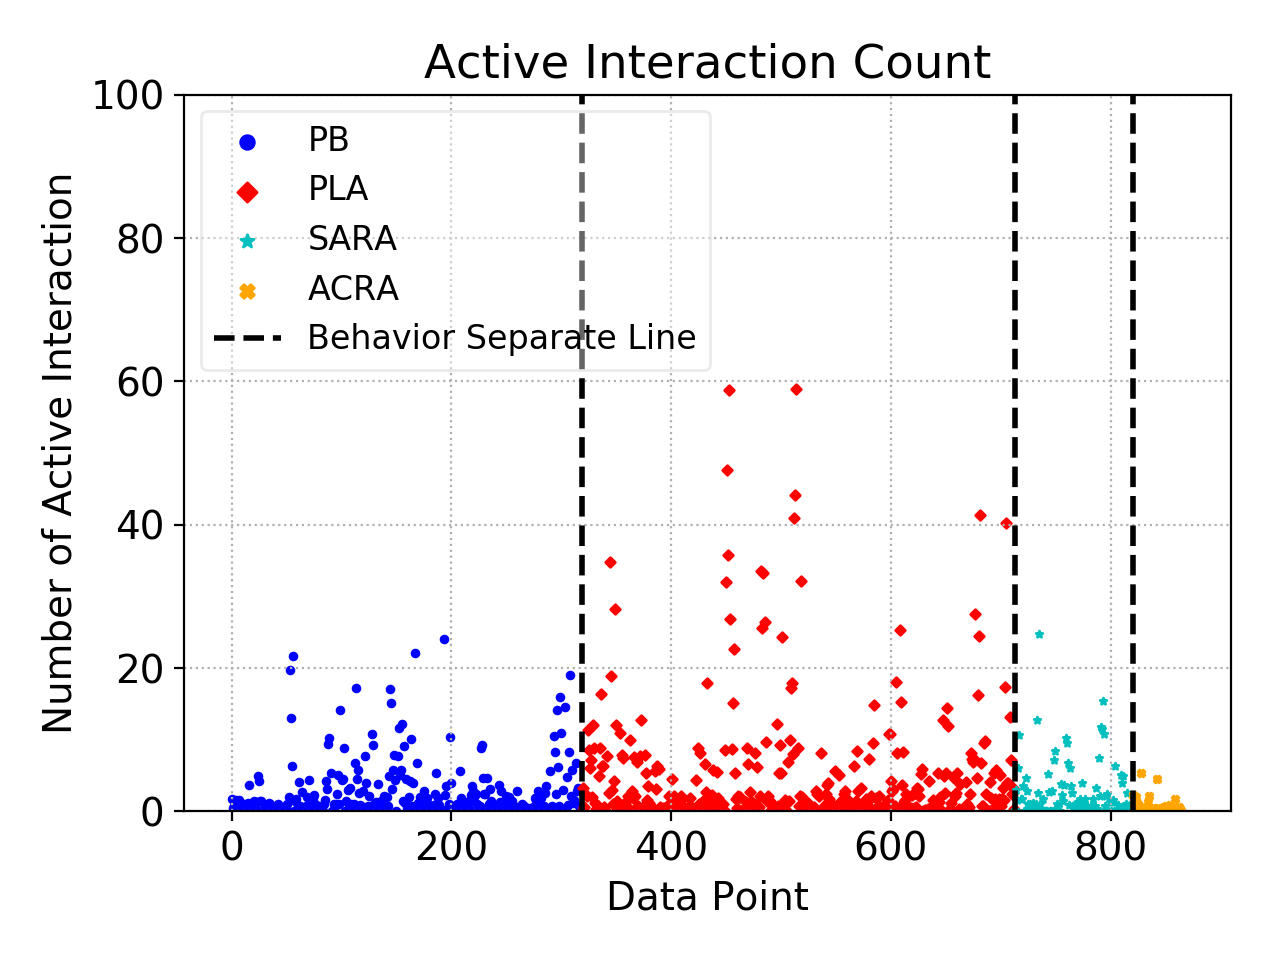

In [65]:
interact_freq = 10
active_interaction_PB_delete_zero = np.delete(active_interaction_PB.values, 
                                              np.where(active_interaction_PB.values == 0), axis=0) /interact_freq

active_interaction_PLA_delete_zero = np.delete(active_interaction_PLA.values, 
                                               np.where(active_interaction_PLA.values == 0), axis=0)/interact_freq

active_interaction_SARA_delete_zero = np.delete(active_interaction_SARA.values, 
                                                np.where(active_interaction_SARA.values == 0), axis=0)/interact_freq

active_interaction_ACRA_delete_zero = np.delete(active_interaction_ACRA.values, 
                                                np.where(active_interaction_ACRA.values == 0), axis=0)/interact_freq

plt.figure()

start_PB = 0
end_PB = len(active_interaction_PB_delete_zero)
handle_PB = plt.scatter(range(start_PB, end_PB), active_interaction_PB_delete_zero, c='b', marker='o', s = 6)

start_PLA = end_PB
end_PLA = end_PB + len(active_interaction_PLA_delete_zero)
handle_PLA = plt.scatter(range(start_PLA, end_PLA), active_interaction_PLA_delete_zero, c='r', marker='D', s = 6)

start_SARA = end_PLA
end_SARA = end_PLA + len(active_interaction_SARA_delete_zero)
handle_SARA = plt.scatter(range(start_SARA,end_SARA), active_interaction_SARA_delete_zero, c='c', marker='*', s = 6)

start_ACRA = end_SARA
end_ACRA = end_SARA + len(active_interaction_ACRA_delete_zero)
handle_ACRA = plt.scatter(range(start_ACRA,end_ACRA), active_interaction_ACRA_delete_zero, c='orange', marker='X', s = 6)

# plt.plot(range(len(Y)), predVals, 'r-', linewidth=3)

handle_separate_line = plt.axvline(x=end_PB, linestyle='--', color='black',linewidth=2)
plt.axvline(x=end_PLA, linestyle='--', color='black',linewidth=2)
plt.axvline(x=end_SARA, linestyle='--', color='black',linewidth=2)

plt.ylabel('Number of Active Interaction')
plt.xlabel('Data Point')

# plt.ylim(0,1700)
plt.ylim(0,100)
plt.title('Active Interaction Count')
plt.legend(handles=[handle_PB, handle_PLA, handle_SARA, handle_ACRA, handle_separate_line], 
           labels=['PB', 'PLA', 'SARA', 'ACRA', 'Behavior Separate Line'],fontsize=12, markerscale=2, framealpha=0.4)
plt.tight_layout()
plt.grid(True, linestyle=':')
plt.show()
plt.savefig('./figures/Active_Interaction_Count.png', dpi=300)


In [66]:
# quantile_plot(active_interaction_PB_delete_zero, active_interaction_PLA_delete_zero, 
#               active_interaction_SARA_delete_zero, active_interaction_ACRA_delete_zero)

1.0
1.6
1.1060000000000003
0.5


<IPython.core.display.Javascript object>


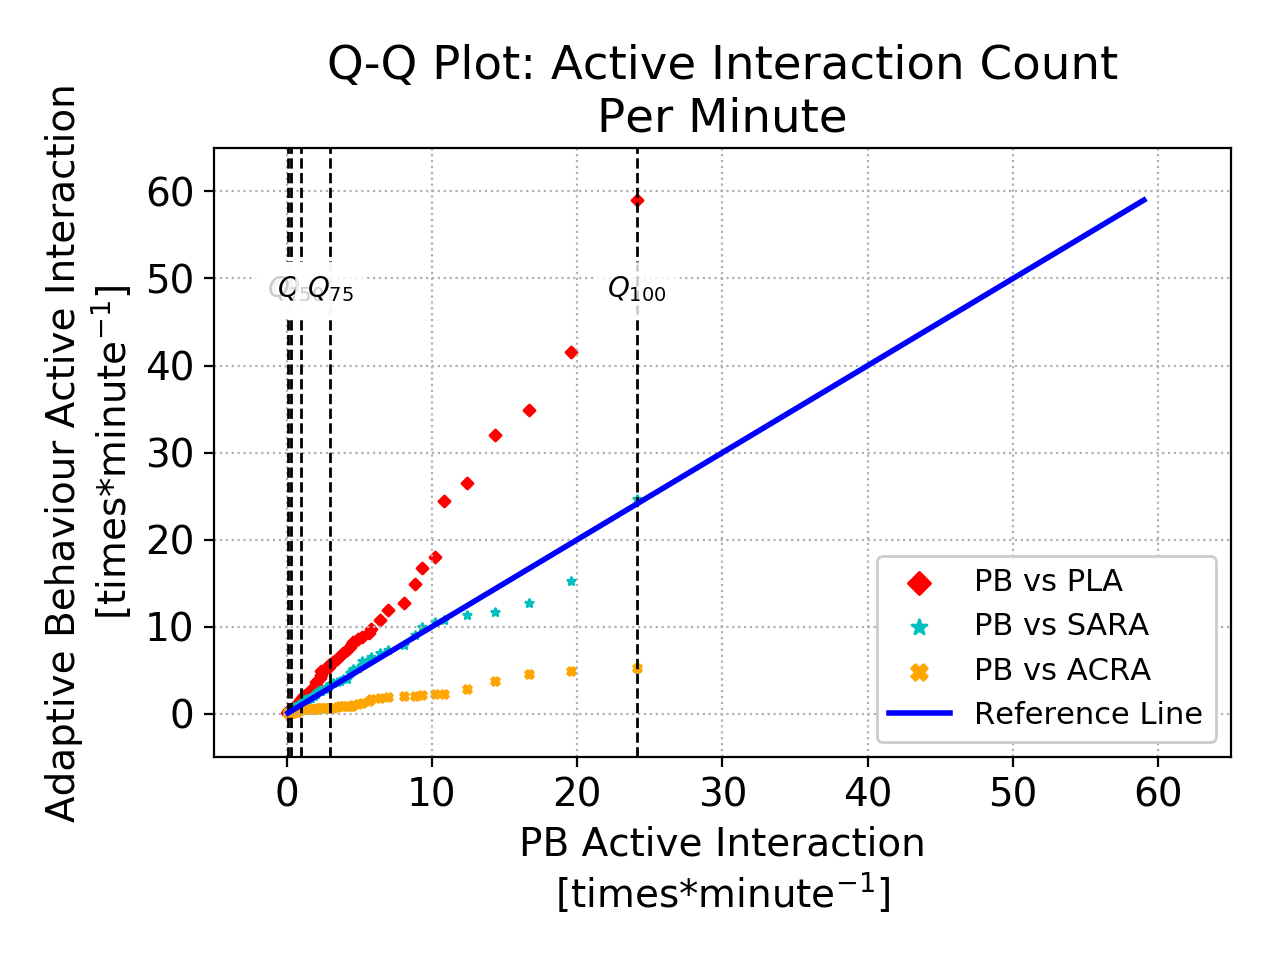

In [67]:

qq_plot(active_interaction_PB_delete_zero, active_interaction_PLA_delete_zero,
        active_interaction_SARA_delete_zero, active_interaction_ACRA_delete_zero,
        title='Active Interaction Count\nPer Minute',figname='Active_Interaction_Count',axis_lim = [-5, 65],
        xlabel='PB Active Interaction\n[times*minute$^{-1}$]', 
        ylabel='Adaptive Behaviour Active Interaction\n[times*minute$^{-1}$]')

1.0
1.6
1.1060000000000003
0.5


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


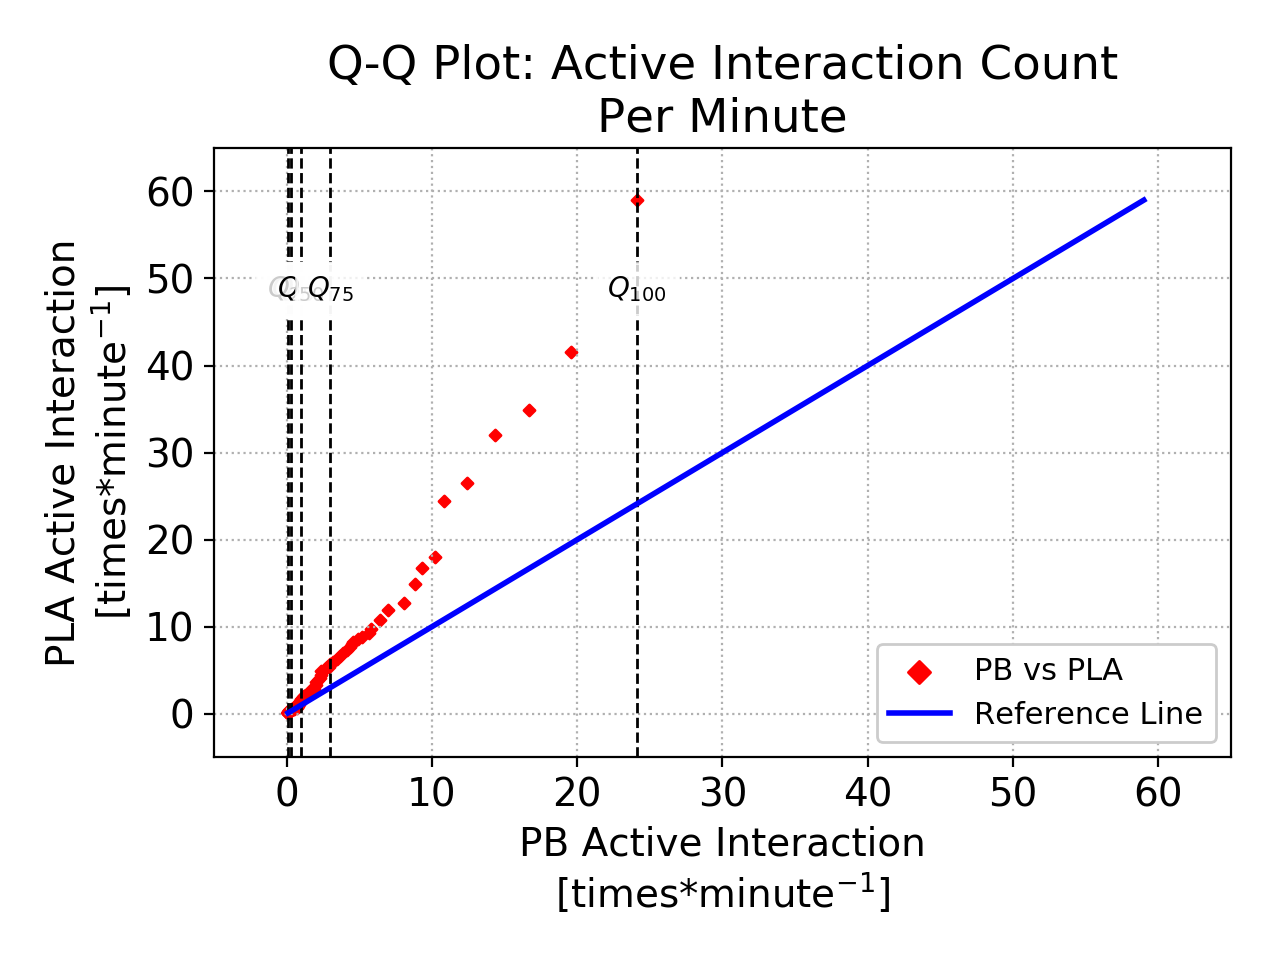

In [68]:
qq_plot_PB_PLA(active_interaction_PB_delete_zero, active_interaction_PLA_delete_zero,
        active_interaction_SARA_delete_zero, active_interaction_ACRA_delete_zero,
        title='Active Interaction Count\nPer Minute',figname='Active_Interaction_Count',axis_lim = [-5, 65],
        xlabel='PB Active Interaction\n[times*minute$^{-1}$]', 
        ylabel='PLA Active Interaction\n[times*minute$^{-1}$]')

<IPython.core.display.Javascript object>


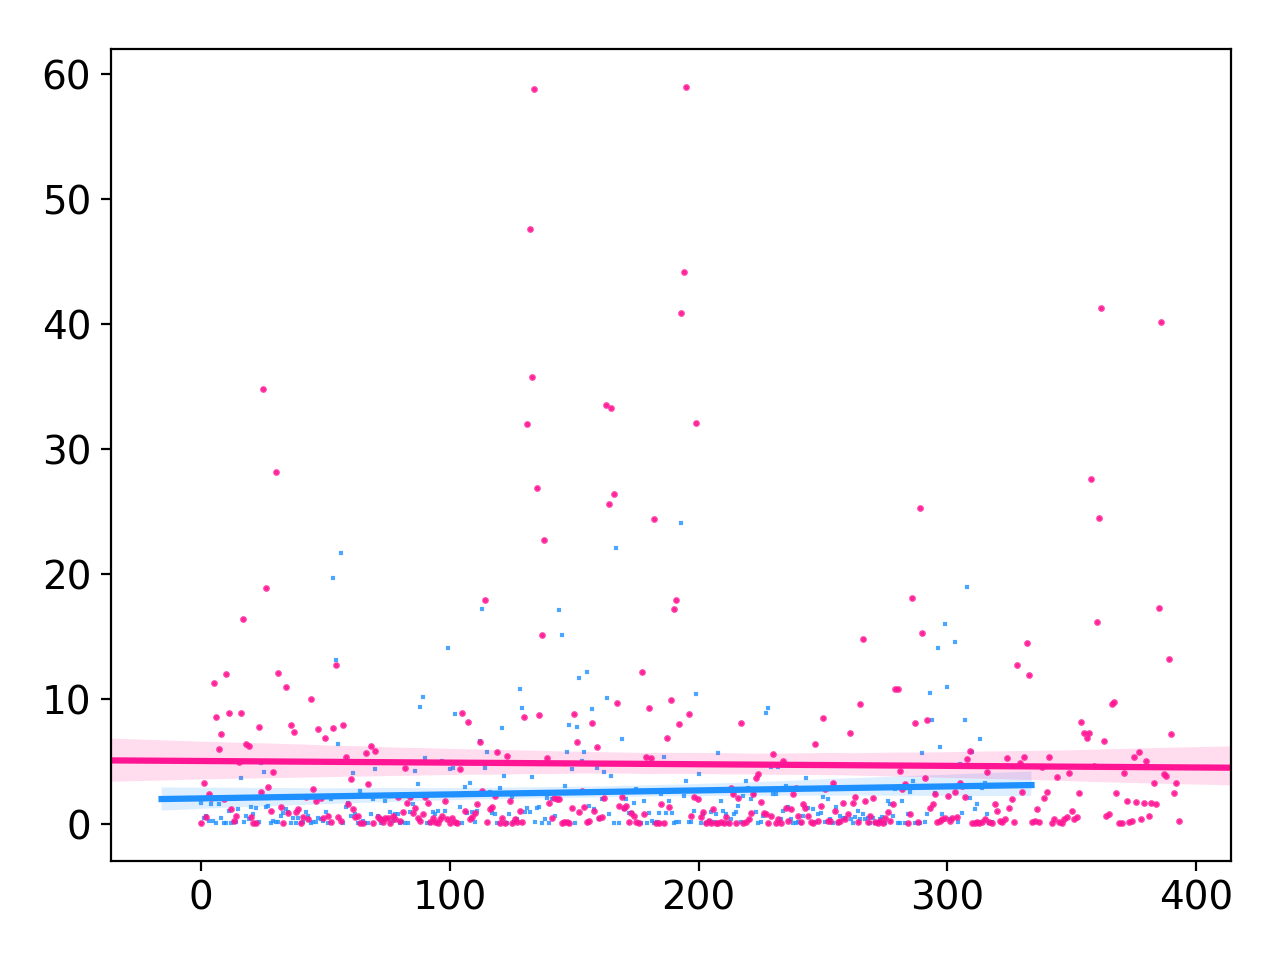

In [69]:
fig, axes = plt.subplots(1,1)
ci = 95
ax = sns.regplot(x=np.arange(len(active_interaction_PB_delete_zero)), 
                 y=active_interaction_PB_delete_zero, ci=ci, x_jitter=.1, 
                 marker="+", color="dodgerblue",label='PB', scatter_kws={'s':2})
ax = sns.regplot(x=np.arange(len(active_interaction_PLA_delete_zero)), 
                 y=active_interaction_PLA_delete_zero, ci=ci, x_jitter=.1, 
                 marker="o", color="deeppink",label='PLA', scatter_kws={'s':2})
plt.tight_layout()

<IPython.core.display.Javascript object>


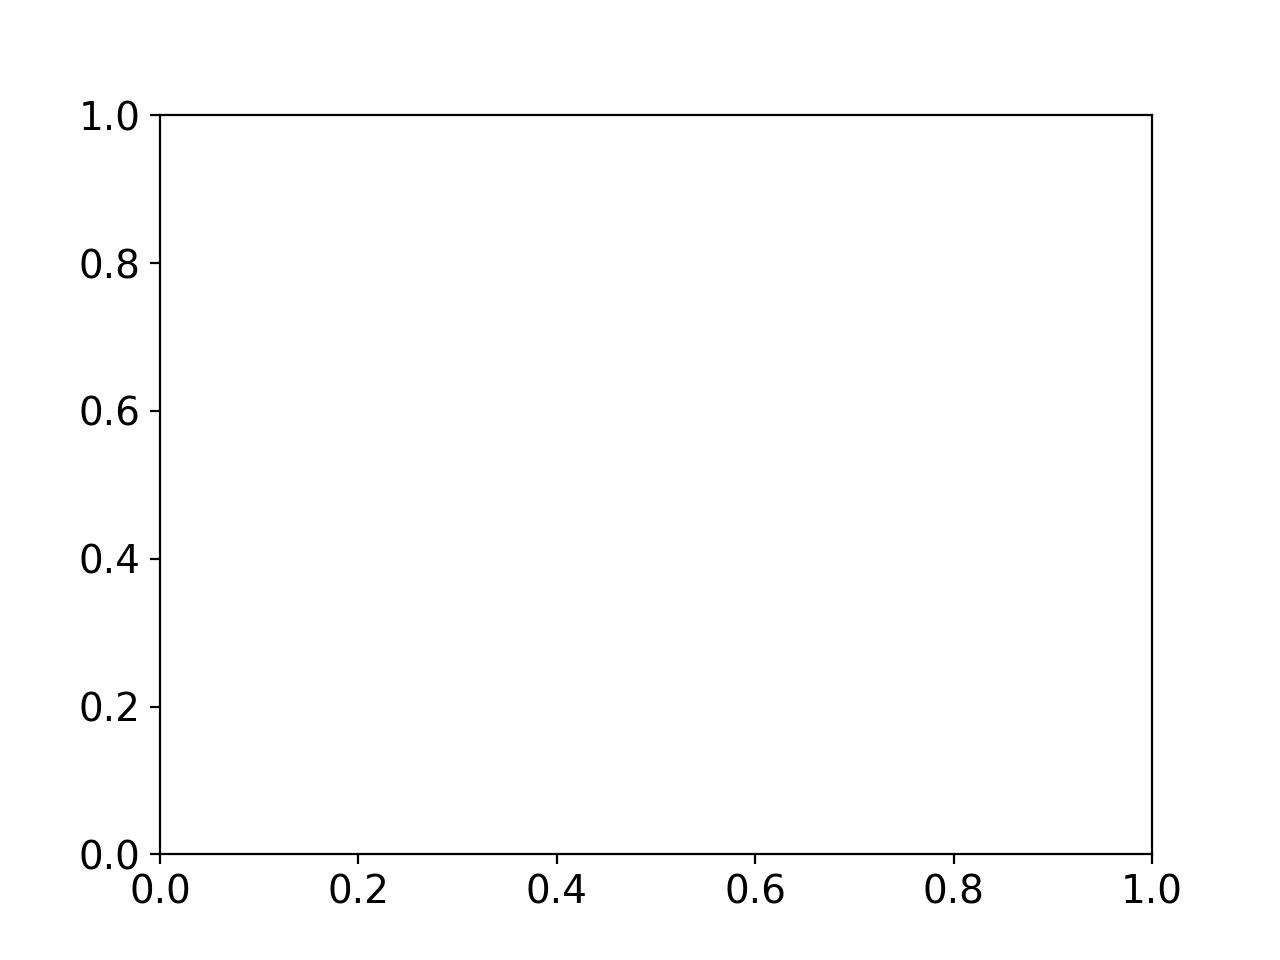

NameError: name 'PB_daily_average_occupancy' is not defined

In [70]:

fig, axes = plt.subplots(1,1)
ax = sns.regplot(x=np.arange(1,len(PB_daily_average_occupancy)+1), y=PB_daily_average_occupancy, ci=ci, x_jitter=.1, 
                 marker="+", color="dodgerblue",label='PB')
ax = sns.regplot(x=np.arange(1,len(PLA_daily_average_occupancy)+1), y=PLA_daily_average_occupancy, ci=ci, x_jitter=.1, 
                 marker="o", color="deeppink",label='PLA')
plt.title('Daily Average Estimated Occupancy\n ')
plt.xlabel('date')
plt.ylabel('Estimated Occupancy\n[persons*day$^{-1}$')
plt.xticks(np.arange(1,len(PB_daily_average_occupancy)+1), 
           ('Sep. 17', 'Sep. 18', 'Sep. 19', 'Sep. 20',
            'Sep. 21', 'Sep. 24', 'Sep. 25', 'Sep. 26', 'Sep. 27',
            'Sep. 28', 'Oct. 02', 'Oct. 03', 'Oct. 05'),
           rotation=30)
plt.grid(True, linestyle=':')
plt.tight_layout()

## Normalized by occupancy

<IPython.core.display.Javascript object>


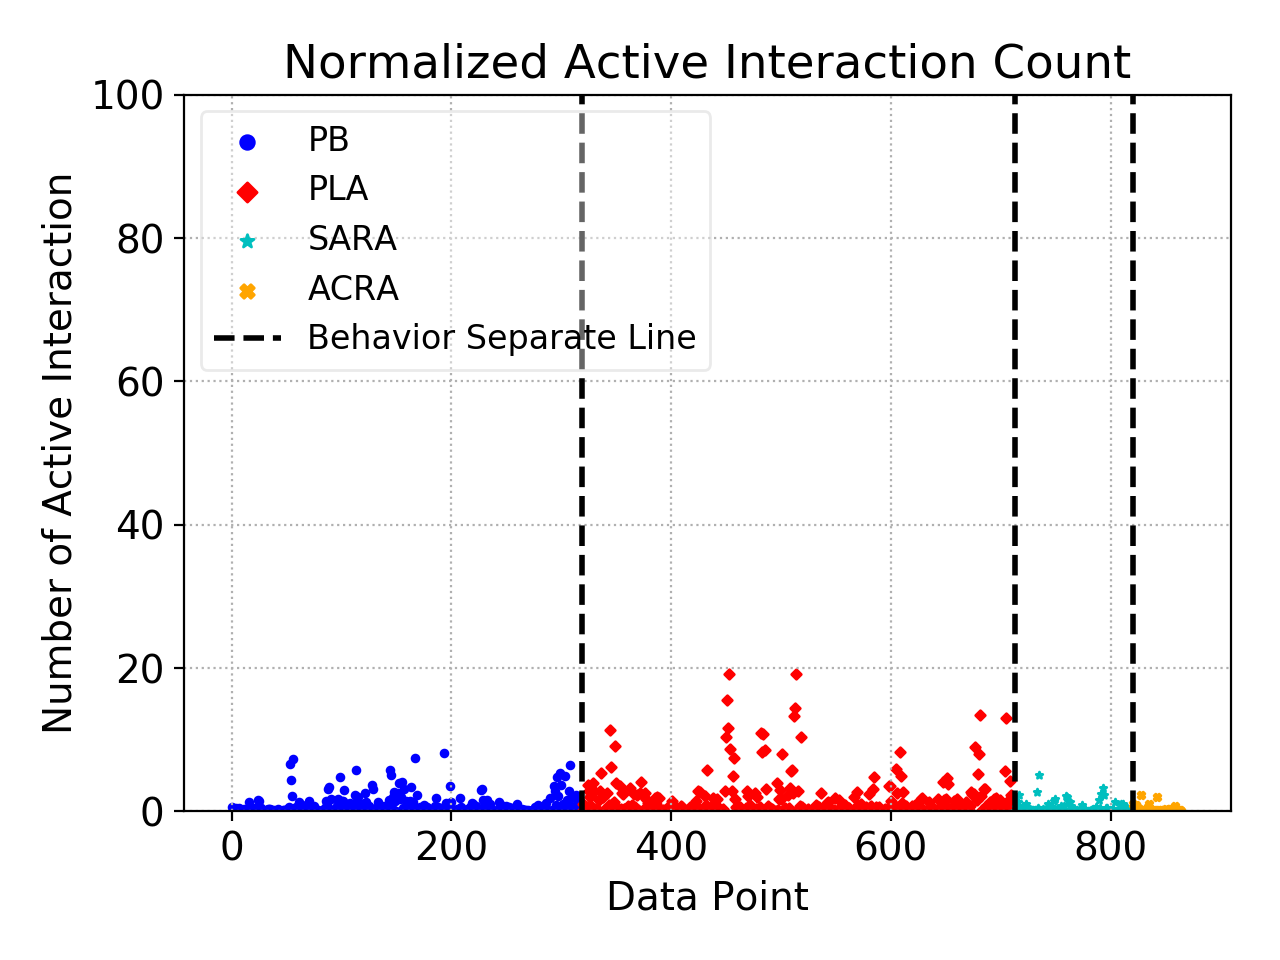

In [71]:


plt.figure()

start_PB = 0
end_PB = len(active_interaction_PB_delete_zero)
handle_PB = plt.scatter(range(start_PB, end_PB), active_interaction_PB_delete_zero/ point_avg_PB.mean(), c='b', marker='o', s = 6)

start_PLA = end_PB
end_PLA = end_PB + len(active_interaction_PLA_delete_zero)
handle_PLA = plt.scatter(range(start_PLA, end_PLA), active_interaction_PLA_delete_zero/ point_avg_PLA.mean(), c='r', marker='D', s = 6)

start_SARA = end_PLA
end_SARA = end_PLA + len(active_interaction_SARA_delete_zero)
handle_SARA = plt.scatter(range(start_SARA,end_SARA), active_interaction_SARA_delete_zero/ point_avg_SARA.mean(), c='c', marker='*', s = 6)

start_ACRA = end_SARA
end_ACRA = end_SARA + len(active_interaction_ACRA_delete_zero)
handle_ACRA = plt.scatter(range(start_ACRA,end_ACRA), active_interaction_ACRA_delete_zero/ point_avg_ACRA.mean(), c='orange', marker='X', s = 6)

# plt.plot(range(len(Y)), predVals, 'r-', linewidth=3)

handle_separate_line = plt.axvline(x=end_PB, linestyle='--', color='black',linewidth=2)
plt.axvline(x=end_PLA, linestyle='--', color='black',linewidth=2)
plt.axvline(x=end_SARA, linestyle='--', color='black',linewidth=2)

plt.ylabel('Number of Active Interaction')
plt.xlabel('Data Point')

# plt.ylim(0,1700)
plt.ylim(0,100)
plt.title('Normalized Active Interaction Count')
plt.legend(handles=[handle_PB, handle_PLA, handle_SARA, handle_ACRA, handle_separate_line], 
           labels=['PB', 'PLA', 'SARA', 'ACRA', 'Behavior Separate Line'],fontsize=12, markerscale=2, framealpha=0.4)
plt.tight_layout()
plt.grid(True, linestyle=':')
plt.show()
plt.savefig('./figures/Normalized_Active_Interaction_Count.png', dpi=300)


In [72]:
# quantile_plot(active_interaction_PB_delete_zero / point_avg_PB.mean(), 
#               active_interaction_PLA_delete_zero / point_avg_PLA.mean(), 
#               active_interaction_SARA_delete_zero / point_avg_SARA.mean(), 
#               active_interaction_ACRA_delete_zero / point_avg_ACRA.mean())

0.3375713041238456
0.5210266650021738
0.23030542440285753
0.22040890903746702


<IPython.core.display.Javascript object>


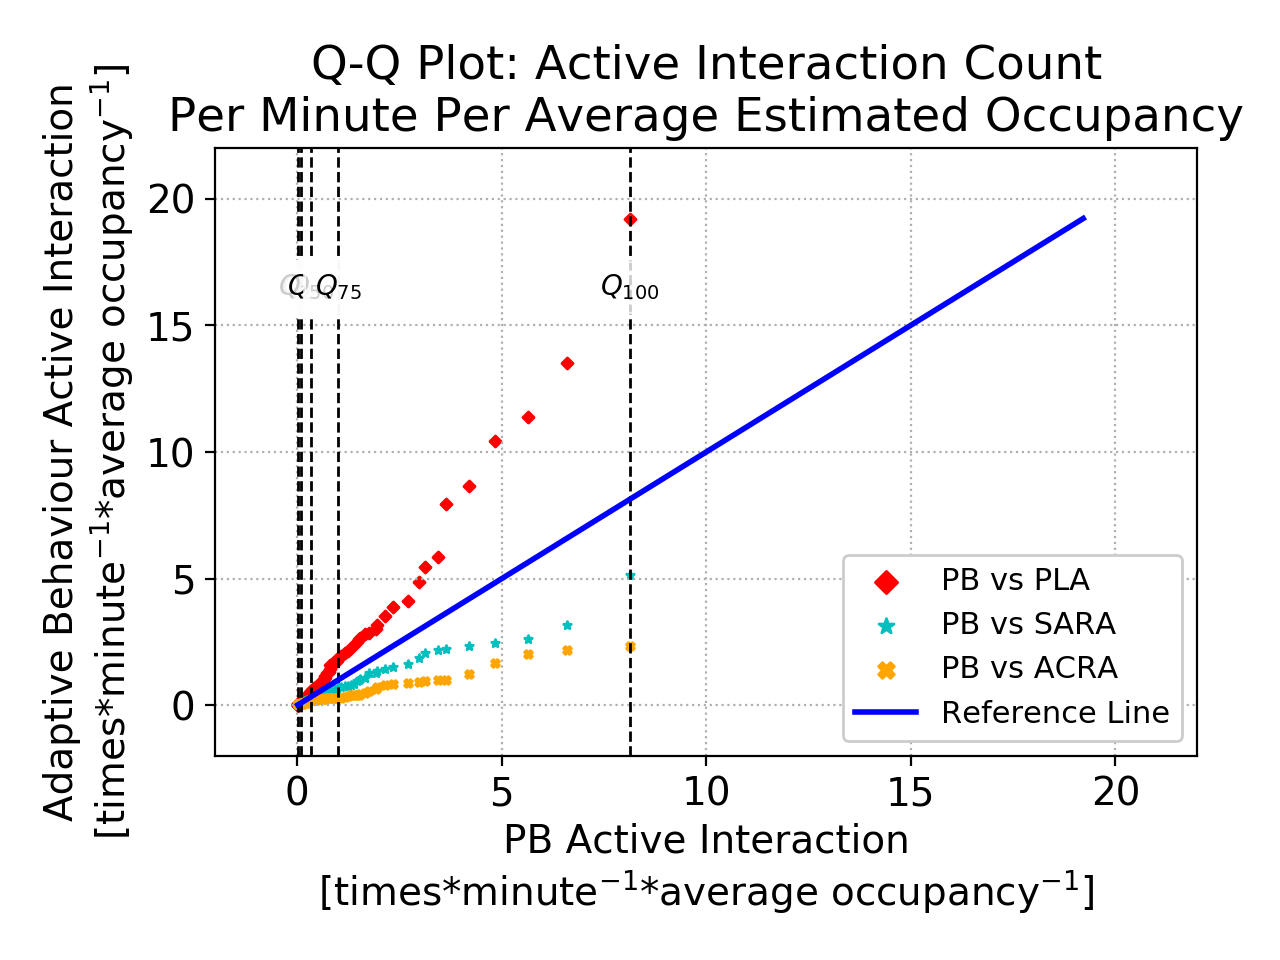

In [73]:

qq_plot((active_interaction_PB_delete_zero) / point_avg_PB.mean(), 
        (active_interaction_PLA_delete_zero) / point_avg_PLA.mean(), 
        (active_interaction_SARA_delete_zero) / point_avg_SARA.mean(), 
        (active_interaction_ACRA_delete_zero) / point_avg_ACRA.mean(),
        title='Active Interaction Count\nPer Minute Per Average Estimated Occupancy',
        figname='Active_Interaction_Count_Per_Average_Occupancy',axis_lim = [-2,22],
#         xlabel='PB Active Interaction\n[times/minute/average occupancy]', 
#         ylabel='Adaptive Behaviour Active Interaction\n[times/minute/average occupancy]')
        xlabel='PB Active Interaction\n[times*minute$^{-1}$*average occupancy$^{-1}$]', 
        ylabel='Adaptive Behaviour Active Interaction\n[times*minute$^{-1}$*average occupancy$^{-1}$]')

0.3375713041238456
0.5210266650021738
0.23030542440285753
0.22040890903746702


<IPython.core.display.Javascript object>


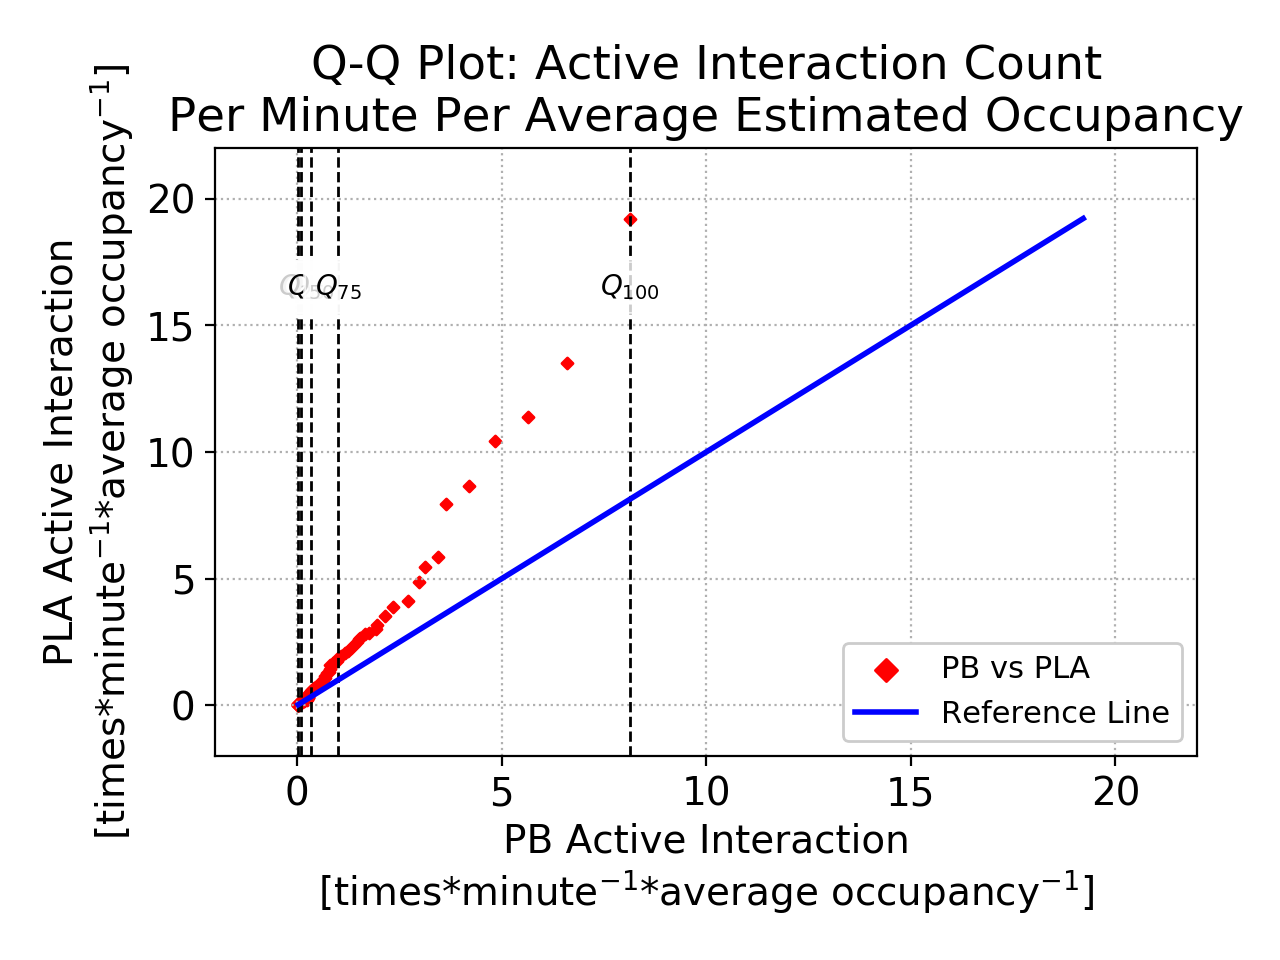

In [74]:

qq_plot_PB_PLA((active_interaction_PB_delete_zero) / point_avg_PB.mean(), 
        (active_interaction_PLA_delete_zero) / point_avg_PLA.mean(), 
        (active_interaction_SARA_delete_zero) / point_avg_SARA.mean(), 
        (active_interaction_ACRA_delete_zero) / point_avg_ACRA.mean(),
        title='Active Interaction Count\nPer Minute Per Average Estimated Occupancy',
        figname='Active_Interaction_Count_Per_Average_Occupancy',axis_lim = [-2,22],
#         xlabel='PB Active Interaction\n[times/minute/average occupancy]', 
#         ylabel='Adaptive Behaviour Active Interaction\n[times/minute/average occupancy]')
        xlabel='PB Active Interaction\n[times*minute$^{-1}$*average occupancy$^{-1}$]', 
        ylabel='PLA Active Interaction\n[times*minute$^{-1}$*average occupancy$^{-1}$]')

## 1-way ANOVA

In [75]:
# f_value, p_value = stats.f_oneway(active_interaction_PB, 
#                                   active_interaction_PLA, 
#                                   active_interaction_SARA, 
#                                   active_interaction_ACRA)
# print('f_value={0:.4f}, p_value={1:.4f}'.format(f_value, p_value))

In [76]:
f_value, p_value = stats.f_oneway(active_interaction_PB_delete_zero, 
                                  active_interaction_PLA_delete_zero, 
                                  active_interaction_SARA_delete_zero, 
                                  active_interaction_ACRA_delete_zero)
print('f_value={0:.4f}, p_value={1:.4f}'.format(f_value, p_value))

f_value=10.8787, p_value=0.0000


## Kruskal-Wallis H-test for independent samples

In [77]:
# Kruskal_Wallis_H_statistic, p_value = stats.kruskal(active_interaction_PB, 
#                                                     active_interaction_PLA, 
#                                                     active_interaction_SARA, 
#                                                     active_interaction_ACRA)
# print('Kruskal_Wallis_H_statistic={0:.4f}, p_value={1:.4f}'.format(Kruskal_Wallis_H_statistic, p_value))

In [78]:
Kruskal_Wallis_H_statistic, p_value = stats.kruskal(active_interaction_PB_delete_zero, 
                                                    active_interaction_PLA_delete_zero, 
                                                    active_interaction_SARA_delete_zero, 
                                                    active_interaction_ACRA_delete_zero)
print('Kruskal_Wallis_H_statistic={0:.4f}, p_value={1:.4f}'.format(Kruskal_Wallis_H_statistic, p_value))

Kruskal_Wallis_H_statistic=32.8445, p_value=0.0000


In [199]:
Kruskal_Wallis_H_statistic, p_value = stats.kruskal(active_interaction_PB_delete_zero, 
                                                    active_interaction_PLA_delete_zero)
print('Kruskal_Wallis_H_statistic={0:.4f}, p_value={1:.4f}'.format(Kruskal_Wallis_H_statistic, p_value))

Kruskal_Wallis_H_statistic=10.6313, p_value=0.0011


In [200]:
norm_active_interaction_PB = active_interaction_PB_delete_zero / point_avg_PB.mean()
norm_active_interaction_PLA = active_interaction_PLA_delete_zero / point_avg_PLA.mean()
Kruskal_Wallis_H_statistic, p_value = stats.kruskal(norm_active_interaction_PB, 
                                                    norm_active_interaction_PLA)
print('Kruskal_Wallis_H_statistic={0:.4f}, p_value={1:.4f}'.format(Kruskal_Wallis_H_statistic, p_value))

Kruskal_Wallis_H_statistic=5.5218, p_value=0.0188


### Normalty test

In [172]:
 # normality test
print('\tD’Agostino and Pearson’s Test')
statistic_PB, pvalue_PB = stats.normaltest(active_interaction_PB_delete_zero)
statistic_PLA, pvalue_PLA = stats.normaltest(active_interaction_PLA_delete_zero)
print('\t\tPB Normality: statistic={}, pvalue={}'.format(statistic_PB, pvalue_PB))
print('\t\tPLA Normality: statistic={}, pvalue={}'.format(statistic_PLA, pvalue_PLA))

statistic_PB, pvalue_PB = stats.shapiro(active_interaction_PB_delete_zero)
statistic_PLA, pvalue_PLA = stats.shapiro(active_interaction_PLA_delete_zero)
print('\tShapiro-Wilk Test')
print('\t\tPB Normality: statistic={}, pvalue={}'.format(statistic_PB, pvalue_PB))
print('\t\tPLA Normality: statistic={}, pvalue={}'.format(statistic_PLA, pvalue_PLA))

	D’Agostino and Pearson’s Test
		PB Normality: statistic=203.08322119491834, pvalue=7.962305449634581e-45
		PLA Normality: statistic=303.8242077868681, pvalue=1.060257967597048e-66
	Shapiro-Wilk Test
		PB Normality: statistic=0.6356173157691956, pvalue=1.6285765915137112e-25
		PLA Normality: statistic=0.5689587593078613, pvalue=4.941262537975304e-30


In [175]:
active_interaction_PB_delete_zero_log = np.log10(active_interaction_PB_delete_zero)
active_interaction_PB_delete_zero_log = active_interaction_PB_delete_zero_log[np.isfinite(active_interaction_PB_delete_zero_log)]
active_interaction_PLA_delete_zero_log = np.log10(active_interaction_PLA_delete_zero)
active_interaction_PLA_delete_zero_log = active_interaction_PLA_delete_zero_log[np.isfinite(active_interaction_PLA_delete_zero_log)]

# normality test
print('\tD’Agostino and Pearson’s Test')
statistic_PB, pvalue_PB = stats.normaltest(active_interaction_PB_delete_zero_log)
statistic_PLA, pvalue_PLA = stats.normaltest(active_interaction_PLA_delete_zero_log)
print('\t\tPB Normality: statistic={}, pvalue={}'.format(statistic_PB, pvalue_PB))
print('\t\tPLA Normality: statistic={}, pvalue={}'.format(statistic_PLA, pvalue_PLA))

statistic_PB, pvalue_PB = stats.shapiro(active_interaction_PB_delete_zero_log)
statistic_PLA, pvalue_PLA = stats.shapiro(active_interaction_PLA_delete_zero_log)
print('\tShapiro-Wilk Test')
print('\t\tPB Normality: statistic={}, pvalue={}'.format(statistic_PB, pvalue_PB))
print('\t\tPLA Normality: statistic={}, pvalue={}'.format(statistic_PLA, pvalue_PLA))

	D’Agostino and Pearson’s Test
		PB Normality: statistic=47.81844724751419, pvalue=4.1338633236117163e-11
		PLA Normality: statistic=50.600169698138615, pvalue=1.0287568935287594e-11
	Shapiro-Wilk Test
		PB Normality: statistic=0.951790988445282, pvalue=9.99431382098237e-09
		PLA Normality: statistic=0.9669879674911499, pvalue=9.164364200842101e-08


## t-test

In [79]:
from scipy import stats

t_PB_PLA, p_PB_PLA = stats.ttest_ind(active_interaction_PB_delete_zero, active_interaction_PLA_delete_zero)
t_PB_SARA, p_PB_SARA = stats.ttest_ind(active_interaction_PB_delete_zero, active_interaction_SARA_delete_zero)
t_PB_ACRA, p_PB_ACRA =stats.ttest_ind(active_interaction_PB_delete_zero, active_interaction_ACRA_delete_zero)
t_PLA_SARA, p_PLA_SARA =stats.ttest_ind(active_interaction_PLA_delete_zero, active_interaction_SARA_delete_zero)
t_PLA_ACRA, p_PLA_ACRA = stats.ttest_ind(active_interaction_PLA_delete_zero, active_interaction_ACRA_delete_zero)
t_SARA_ACRA, t_SARA_ACRA =stats.ttest_ind(active_interaction_SARA_delete_zero, active_interaction_ACRA_delete_zero)
print('t_PB_PLA={0:.4f}, p_PB_PLA={1:.4f}'.format(t_PB_PLA, p_PB_PLA))
print('t_PB_SARA={0:.4f}, p_PB_SARA={1:.4f}'.format(t_PB_SARA, p_PB_SARA))
print('t_PB_ACRA={0:.4f}, p_PB_ACRA={1:.4f}'.format(t_PB_ACRA, p_PB_ACRA))
print('t_PLA_SARA={0:.4f}, p_PLA_SARA={1:.4f}'.format(t_PLA_SARA, p_PLA_SARA))
print('t_PLA_ACRA={0:.4f}, p_PLA_ACRA={1:.4f}'.format(t_PLA_ACRA, p_PLA_ACRA))
print('t_SARA_ACRA={0:.4f}, t_SARA_ACRA={1:.4f}'.format(t_SARA_ACRA, t_SARA_ACRA))


t_PB_PLA=-4.2710, p_PB_PLA=0.0000
t_PB_SARA=-0.2411, p_PB_SARA=0.8096
t_PB_ACRA=3.0423, p_PB_ACRA=0.0025
t_PLA_SARA=2.4850, p_PLA_SARA=0.0133
t_PLA_ACRA=3.1655, p_PLA_ACRA=0.0017
t_SARA_ACRA=0.0012, t_SARA_ACRA=0.0012


Welch's t-test

raw

In [80]:
# from scipy import stats

# t_PB_PLA, p_PB_PLA = stats.ttest_ind(active_interaction_PB, 
#                                      active_interaction_PLA, equal_var=False)
# t_PB_SARA, p_PB_SARA = stats.ttest_ind(active_interaction_PB, 
#                                        active_interaction_SARA, equal_var=False)
# t_PB_ACRA, p_PB_ACRA =stats.ttest_ind(active_interaction_PB, 
#                                       active_interaction_ACRA, equal_var=False)
# t_PLA_SARA, p_PLA_SARA =stats.ttest_ind(active_interaction_PLA, 
#                                         active_interaction_SARA, equal_var=False)
# t_PLA_ACRA, p_PLA_ACRA = stats.ttest_ind(active_interaction_PLA, 
#                                          active_interaction_ACRA, equal_var=False)
# t_SARA_ACRA, t_SARA_ACRA =stats.ttest_ind(active_interaction_SARA, 
#                                           active_interaction_ACRA, equal_var=False)
# print('t_PB_PLA={0:.4f}, p_PB_PLA={1:.4f}'.format(t_PB_PLA, p_PB_PLA))
# print('t_PB_SARA={0:.4f}, p_PB_SARA={1:.4f}'.format(t_PB_SARA, p_PB_SARA))
# print('t_PB_ACRA={0:.4f}, p_PB_ACRA={1:.4f}'.format(t_PB_ACRA, p_PB_ACRA))
# print('t_PLA_SARA={0:.4f}, p_PLA_SARA={1:.4f}'.format(t_PLA_SARA, p_PLA_SARA))
# print('t_PLA_ACRA={0:.4f}, p_PLA_ACRA={1:.4f}'.format(t_PLA_ACRA, p_PLA_ACRA))
# print('t_SARA_ACRA={0:.4f}, t_SARA_ACRA={1:.4f}'.format(t_SARA_ACRA, t_SARA_ACRA))


In [81]:
from scipy import stats

t_PB_PLA, p_PB_PLA = stats.ttest_ind(active_interaction_PB_delete_zero, 
                                     active_interaction_PLA_delete_zero, equal_var=False)
t_PB_SARA, p_PB_SARA = stats.ttest_ind(active_interaction_PB_delete_zero, 
                                       active_interaction_SARA_delete_zero, equal_var=False)
t_PB_ACRA, p_PB_ACRA =stats.ttest_ind(active_interaction_PB_delete_zero, 
                                      active_interaction_ACRA_delete_zero, equal_var=False)
t_PLA_SARA, p_PLA_SARA =stats.ttest_ind(active_interaction_PLA_delete_zero, 
                                        active_interaction_SARA_delete_zero, equal_var=False)
t_PLA_ACRA, p_PLA_ACRA = stats.ttest_ind(active_interaction_PLA_delete_zero, 
                                         active_interaction_ACRA_delete_zero, equal_var=False)
t_SARA_ACRA, t_SARA_ACRA =stats.ttest_ind(active_interaction_SARA_delete_zero, 
                                          active_interaction_ACRA_delete_zero, equal_var=False)
print('t_PB_PLA={0:.4f}, p_PB_PLA={1:.4f}'.format(t_PB_PLA, p_PB_PLA))
print('t_PB_SARA={0:.4f}, p_PB_SARA={1:.4f}'.format(t_PB_SARA, p_PB_SARA))
print('t_PB_ACRA={0:.4f}, p_PB_ACRA={1:.4f}'.format(t_PB_ACRA, p_PB_ACRA))
print('t_PLA_SARA={0:.4f}, p_PLA_SARA={1:.4f}'.format(t_PLA_SARA, p_PLA_SARA))
print('t_PLA_ACRA={0:.4f}, p_PLA_ACRA={1:.4f}'.format(t_PLA_ACRA, p_PLA_ACRA))
print('t_SARA_ACRA={0:.4f}, t_SARA_ACRA={1:.4f}'.format(t_SARA_ACRA, t_SARA_ACRA))


t_PB_PLA=-4.5699, p_PB_PLA=0.0000
t_PB_SARA=-0.2451, p_PB_SARA=0.8066
t_PB_ACRA=6.6452, p_PB_ACRA=0.0000
t_PLA_SARA=3.7015, p_PLA_SARA=0.0002
t_PLA_ACRA=8.8043, p_PLA_ACRA=0.0000
t_SARA_ACRA=0.0000, t_SARA_ACRA=0.0000


normalized

In [82]:
# from scipy import stats
# norm_active_interaction_PB = active_interaction_PB / point_avg_PB.mean()
# norm_active_interaction_PLA = active_interaction_PLA / point_avg_PLA.mean()
# norm_active_interaction_SARA = active_interaction_SARA / point_avg_SARA.mean()
# norm_active_interaction_ACRA = active_interaction_ACRA / point_avg_ACRA.mean()

# t_PB_PLA, p_PB_PLA = stats.ttest_ind(norm_active_interaction_PB, 
#                                      norm_active_interaction_PLA, equal_var=False)
# t_PB_SARA, p_PB_SARA = stats.ttest_ind(norm_active_interaction_PB, 
#                                        norm_active_interaction_SARA, equal_var=False)
# t_PB_ACRA, p_PB_ACRA =stats.ttest_ind(norm_active_interaction_PB, 
#                                       norm_active_interaction_ACRA, equal_var=False)
# t_PLA_SARA, p_PLA_SARA =stats.ttest_ind(norm_active_interaction_PLA, 
#                                         norm_active_interaction_SARA, equal_var=False)
# t_PLA_ACRA, p_PLA_ACRA = stats.ttest_ind(norm_active_interaction_PLA, 
#                                          norm_active_interaction_ACRA, equal_var=False)
# t_SARA_ACRA, t_SARA_ACRA =stats.ttest_ind(norm_active_interaction_SARA, 
#                                           norm_active_interaction_ACRA, equal_var=False)
# print('t_PB_PLA={0:.4f}, p_PB_PLA={1:.4f}'.format(t_PB_PLA, p_PB_PLA))
# print('t_PB_SARA={0:.4f}, p_PB_SARA={1:.4f}'.format(t_PB_SARA, p_PB_SARA))
# print('t_PB_ACRA={0:.4f}, p_PB_ACRA={1:.4f}'.format(t_PB_ACRA, p_PB_ACRA))
# print('t_PLA_SARA={0:.4f}, p_PLA_SARA={1:.4f}'.format(t_PLA_SARA, p_PLA_SARA))
# print('t_PLA_ACRA={0:.4f}, p_PLA_ACRA={1:.4f}'.format(t_PLA_ACRA, p_PLA_ACRA))
# print('t_SARA_ACRA={0:.4f}, t_SARA_ACRA={1:.4f}'.format(t_SARA_ACRA, t_SARA_ACRA))


In [83]:
from scipy import stats
norm_active_interaction_PB = active_interaction_PB_delete_zero / point_avg_PB.mean()
norm_active_interaction_PLA = active_interaction_PLA_delete_zero / point_avg_PLA.mean()
norm_active_interaction_SARA = active_interaction_SARA_delete_zero / point_avg_SARA.mean()
norm_active_interaction_ACRA = active_interaction_ACRA_delete_zero / point_avg_ACRA.mean()

t_PB_PLA, p_PB_PLA = stats.ttest_ind(norm_active_interaction_PB, 
                                     norm_active_interaction_PLA, equal_var=False)
t_PB_SARA, p_PB_SARA = stats.ttest_ind(norm_active_interaction_PB, 
                                       norm_active_interaction_SARA, equal_var=False)
t_PB_ACRA, p_PB_ACRA =stats.ttest_ind(norm_active_interaction_PB, 
                                      norm_active_interaction_ACRA, equal_var=False)
t_PLA_SARA, p_PLA_SARA =stats.ttest_ind(norm_active_interaction_PLA, 
                                        norm_active_interaction_SARA, equal_var=False)
t_PLA_ACRA, p_PLA_ACRA = stats.ttest_ind(norm_active_interaction_PLA, 
                                         norm_active_interaction_ACRA, equal_var=False)
t_SARA_ACRA, t_SARA_ACRA =stats.ttest_ind(norm_active_interaction_SARA, 
                                          norm_active_interaction_ACRA, equal_var=False)
print('t_PB_PLA={0:.4f}, p_PB_PLA={1:.4f}'.format(t_PB_PLA, p_PB_PLA))
print('t_PB_SARA={0:.4f}, p_PB_SARA={1:.4f}'.format(t_PB_SARA, p_PB_SARA))
print('t_PB_ACRA={0:.4f}, p_PB_ACRA={1:.4f}'.format(t_PB_ACRA, p_PB_ACRA))
print('t_PLA_SARA={0:.4f}, p_PLA_SARA={1:.4f}'.format(t_PLA_SARA, p_PLA_SARA))
print('t_PLA_ACRA={0:.4f}, p_PLA_ACRA={1:.4f}'.format(t_PLA_ACRA, p_PLA_ACRA))
print('t_SARA_ACRA={0:.4f}, t_SARA_ACRA={1:.4f}'.format(t_SARA_ACRA, t_SARA_ACRA))


t_PB_PLA=-4.3418, p_PB_PLA=0.0000
t_PB_SARA=2.8553, p_PB_SARA=0.0046
t_PB_ACRA=5.2314, p_PB_ACRA=0.0000
t_PLA_SARA=6.2426, p_PLA_SARA=0.0000
t_PLA_ACRA=7.8496, p_PLA_ACRA=0.0000
t_SARA_ACRA=0.0304, t_SARA_ACRA=0.0304


In [84]:
# t_PB_PLA, p_PB_PLA = stats.ks_2samp(active_interaction_PB_delete_zero, active_interaction_PLA_delete_zero)
# t_PB_SARA, p_PB_SARA = stats.ks_2samp(active_interaction_PB_delete_zero, active_interaction_SARA_delete_zero)
# t_PB_ACRA, p_PB_ACRA =stats.ks_2samp(active_interaction_PB_delete_zero, active_interaction_ACRA_delete_zero)
# t_PLA_SARA, p_PLA_SARA =stats.ks_2samp(active_interaction_PLA_delete_zero, active_interaction_SARA_delete_zero)
# t_PLA_ACRA, p_PLA_ACRA = stats.ks_2samp(active_interaction_PLA_delete_zero, active_interaction_ACRA_delete_zero)
# t_SARA_ACRA, t_SARA_ACRA =stats.ks_2samp(active_interaction_SARA_delete_zero, active_interaction_ACRA_delete_zero)
# print('KS_PB_PLA={0:.4f}, p_PB_PLA={1:.4f}'.format(t_PB_PLA, p_PB_PLA))
# print('KS_PB_SARA={0:.4f}, p_PB_SARA={1:.4f}'.format(t_PB_SARA, p_PB_SARA))
# print('KS_PB_ACRA={0:.4f}, p_PB_ACRA={1:.4f}'.format(t_PB_ACRA, p_PB_ACRA))
# print('KS_PLA_SARA={0:.4f}, p_PLA_SARA={1:.4f}'.format(t_PLA_SARA, p_PLA_SARA))
# print('KS_PLA_ACRA={0:.4f}, p_PLA_ACRA={1:.4f}'.format(t_PLA_ACRA, p_PLA_ACRA))
# print('KS_SARA_ACRA={0:.4f}, t_SARA_ACRA={1:.4f}'.format(t_SARA_ACRA, t_SARA_ACRA))


<IPython.core.display.Javascript object>


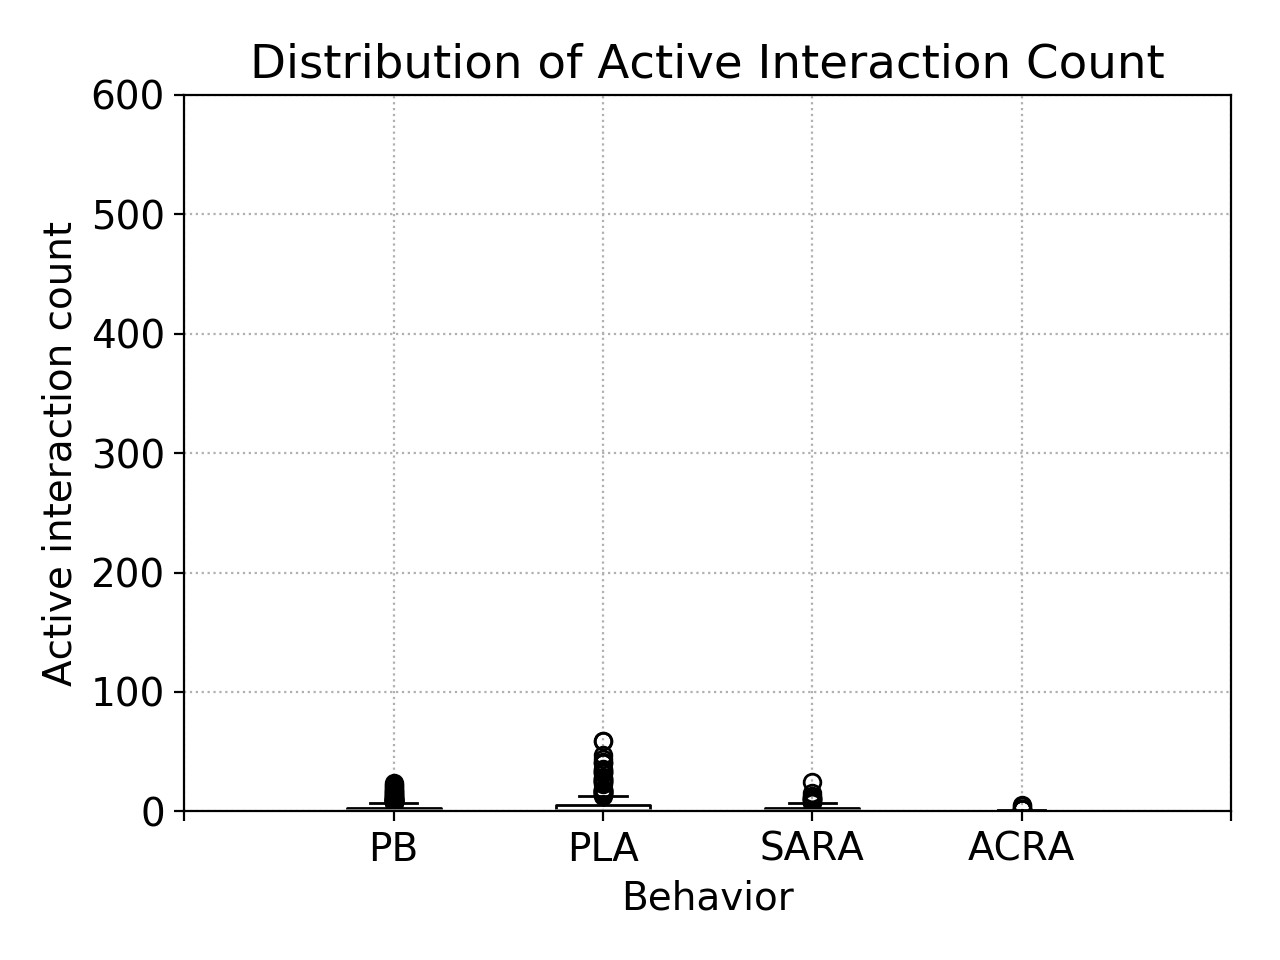

In [85]:
active_interaction = [active_interaction_PB_delete_zero, active_interaction_PLA_delete_zero, 
                       active_interaction_SARA_delete_zero, active_interaction_ACRA_delete_zero]

plt.figure()
plt.rcParams.update({'font.size': 14})
plt.boxplot(active_interaction, meanline=True)
plt.xticks(np.arange(0,6), ['','PB', 'PLA', 'SARA', 'ACRA'])
plt.ylim(0,activate_interaction_datapoint_ylim)
plt.ylabel('Active interaction count')
plt.xlabel('Behavior')
plt.title('Distribution of Active Interaction Count')
plt.tight_layout()
plt.grid(True, linestyle=':')
plt.show()
plt.savefig('./figures/Distribution_of_active_interaction.png', dpi=300)



In [86]:
active_interaction = [active_interaction_PB_delete_zero, active_interaction_PLA_delete_zero, 
                      active_interaction_SARA_delete_zero, active_interaction_ACRA_delete_zero]
behavior_name = ['PB', 'PLA', 'SARA', 'ACRA']
for i in range(4):
    mean = active_interaction[i].mean()
    std = active_interaction[i].std()
    print('{0}: mean={1:.4f}, std={2:.4f}'.format(behavior_name[i], mean, std))
    

PB: mean=2.5787, std=4.0087
PLA: mean=4.8069, std=8.5772
SARA: mean=2.6860, std=3.8675
ACRA: mean=0.7467, std=1.0586


In [87]:
normalized_active_interaction = [active_interaction_PB_delete_zero / point_avg_PB.mean(), 
                                 active_interaction_PLA_delete_zero / point_avg_PLA.mean(),
                                 active_interaction_SARA_delete_zero / point_avg_SARA.mean(), 
                                 active_interaction_ACRA_delete_zero / point_avg_ACRA.mean()]
behavior_name = ['PB', 'PLA', 'SARA', 'ACRA']
for i in range(4):
    mean = normalized_active_interaction[i].mean()
    std = normalized_active_interaction[i].std()
    print('{0}: mean={1:.4f}, std={2:.4f}'.format(behavior_name[i], mean, std))
    

PB: mean=0.8705, std=1.3532
PLA: mean=1.5653, std=2.7931
SARA: mean=0.5593, std=0.8053
ACRA: mean=0.3291, std=0.4667


In [88]:
active_interaction_PB_delete_zero.shape

(319,)

In [89]:

# average_active_interaction = [active_interaction_PB.mean(),
#                               active_interaction_PLA.mean(),
#                               active_interaction_SARA.mean(),
#                               active_interaction_ACRA.mean()]
# std_active_interaction = [active_interaction_PB.std(),
#                               active_interaction_PLA.std(),
#                               active_interaction_SARA.std(),
#                               active_interaction_ACRA.std()]
# SEM_active_interaction = [active_interaction_PB.std()/np.sqrt(active_interaction_PB.shape[0]),
#                               active_interaction_PLA.std()/np.sqrt(active_interaction_PLA.shape[0]),
#                               active_interaction_SARA.std()/np.sqrt(active_interaction_SARA.shape[0]),
#                               active_interaction_ACRA.std()/np.sqrt(active_interaction_ACRA.shape[0])]

# plt.figure()
# plt.bar(np.arange(0,4), average_active_interaction,  yerr=SEM_active_interaction, capsize=10, color=(0.2, 0, 1, 0.6), width=0.4)
# plt.ylabel('Number of Active Interaction')
# # plt.ylim(0,activate_interaction_average_ylim)
# plt.ylim(0,3)
# # plt.ylim(0,170)
# # ax=plt.gca()
# # ax.set_yticks(ax.get_yticks()[2:-2])

# plt.xlabel('Behavior')
# plt.xticks(np.arange(0,4),['PB', 'PLA', 'SARA', 'ACRA'])
# plt.title('Average Active Interaction Count\nPer Minute')
# plt.grid(True, linestyle=':')
# plt.tight_layout()
# plt.savefig('./figures/Average_Active_Interaction_Count', dpi=300)

<IPython.core.display.Javascript object>


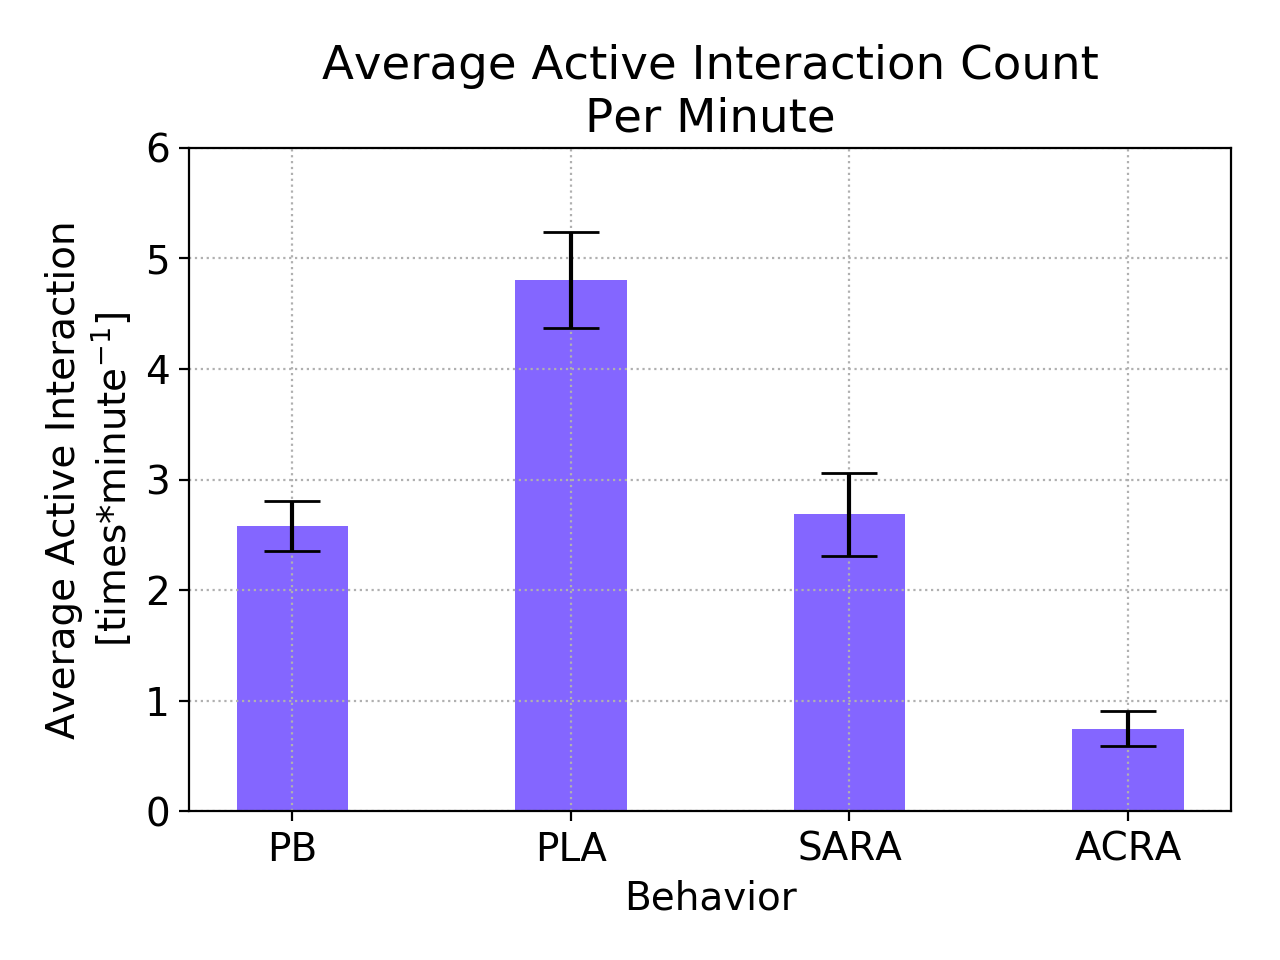

In [90]:

average_active_interaction = [active_interaction_PB_delete_zero.mean(),
                              active_interaction_PLA_delete_zero.mean(),
                              active_interaction_SARA_delete_zero.mean(),
                              active_interaction_ACRA_delete_zero.mean()]
std_active_interaction = [active_interaction_PB_delete_zero.std(),
                              active_interaction_PLA_delete_zero.std(),
                              active_interaction_SARA_delete_zero.std(),
                              active_interaction_ACRA_delete_zero.std()]
SEM_active_interaction = [active_interaction_PB_delete_zero.std()/np.sqrt(active_interaction_PB_delete_zero.shape[0]),
                              active_interaction_PLA_delete_zero.std()/np.sqrt(active_interaction_PLA_delete_zero.shape[0]),
                              active_interaction_SARA_delete_zero.std()/np.sqrt(active_interaction_SARA_delete_zero.shape[0]),
                              active_interaction_ACRA_delete_zero.std()/np.sqrt(active_interaction_ACRA_delete_zero.shape[0])]

plt.figure()
plt.bar(np.arange(0,4), average_active_interaction,  yerr=SEM_active_interaction, capsize=10, color=(0.2, 0, 1, 0.6), width=0.4)
plt.ylabel('Average Active Interaction\n[times*minute$^{-1}$]')
# plt.ylim(0,activate_interaction_average_ylim)
plt.ylim(0,6)
# plt.ylim(0,170)
# ax=plt.gca()
# ax.set_yticks(ax.get_yticks()[2:-2])

plt.xlabel('Behavior')
plt.xticks(np.arange(0,4),['PB', 'PLA', 'SARA', 'ACRA'])
plt.title('Average Active Interaction Count\nPer Minute')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.savefig('./figures/Average_Active_Interaction_Count', dpi=300)

<IPython.core.display.Javascript object>


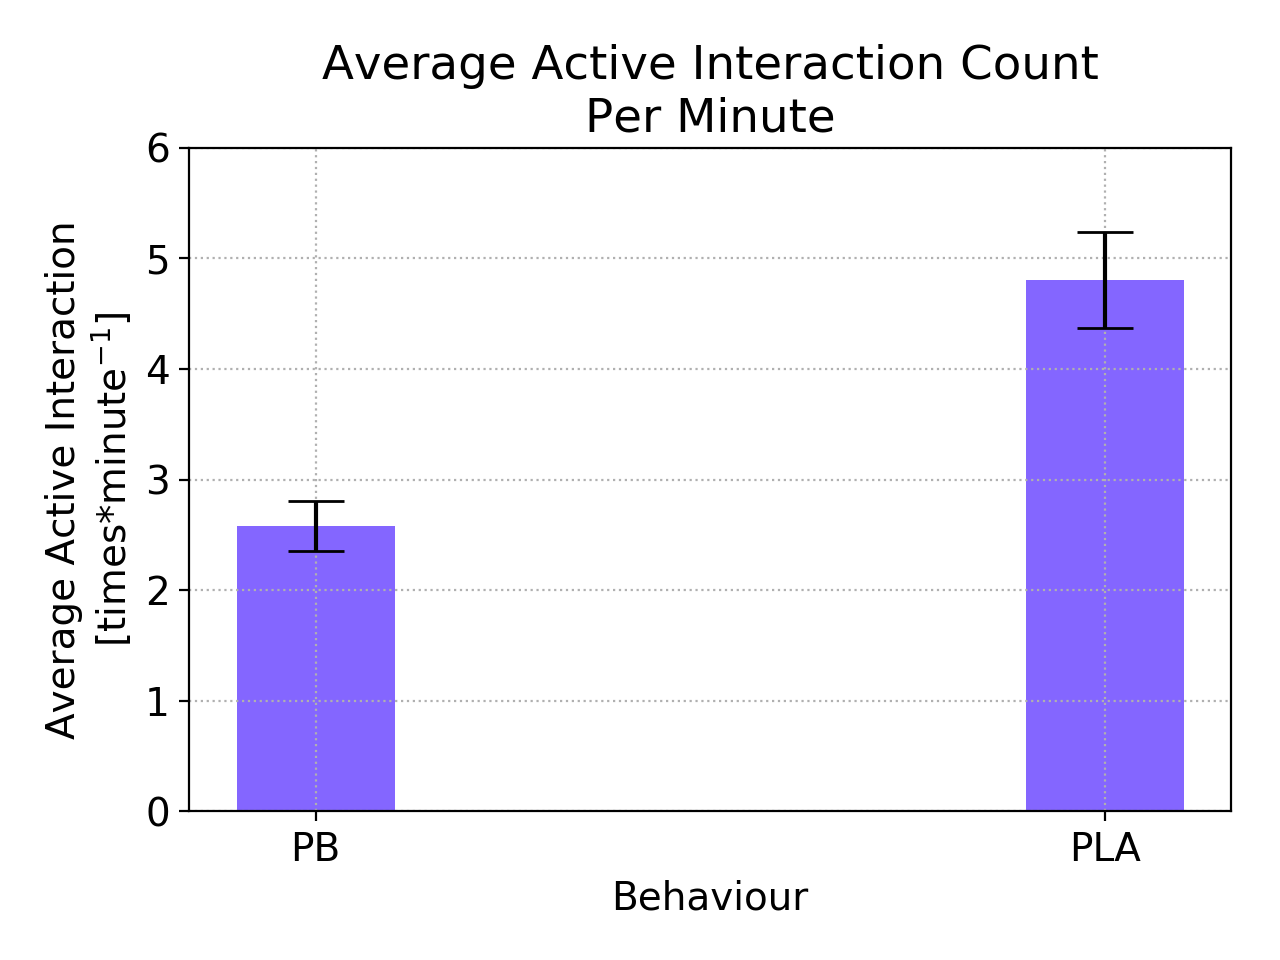

In [91]:

average_active_interaction = [active_interaction_PB_delete_zero.mean(),
                              active_interaction_PLA_delete_zero.mean()]
std_active_interaction = [active_interaction_PB_delete_zero.std(),
                              active_interaction_PLA_delete_zero.std()]
SEM_active_interaction = [active_interaction_PB_delete_zero.std()/np.sqrt(active_interaction_PB_delete_zero.shape[0]),
                              active_interaction_PLA_delete_zero.std()/np.sqrt(active_interaction_PLA_delete_zero.shape[0])]

plt.figure()
plt.bar(np.arange(0,2), average_active_interaction,  yerr=SEM_active_interaction, capsize=10, color=(0.2, 0, 1, 0.6), width=0.2)
plt.ylabel('Average Active Interaction\n[times*minute$^{-1}$]')
plt.ylim(0,6)

plt.xlabel('Behaviour')
plt.xticks(np.arange(0,2),['PB', 'PLA'])
plt.title('Average Active Interaction Count\nPer Minute')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.savefig('./figures/Average_Active_Interaction_Count', dpi=300)

In [92]:
# norm_active_interaction_PB_delete_zero = active_interaction_PB/ point_avg_PB.mean()
# norm_active_interaction_PLA_delete_zero = active_interaction_PLA/ point_avg_PLA.mean()
# norm_active_interaction_SARA_delete_zero = active_interaction_SARA/ point_avg_SARA.mean()
# norm_active_interaction_ACRA_delete_zero = active_interaction_ACRA/ point_avg_ACRA.mean()

# avrage_norm_active_interaction = [norm_active_interaction_PB_delete_zero.mean(),
#                                   norm_active_interaction_PLA_delete_zero.mean(),
#                                   norm_active_interaction_SARA_delete_zero.mean(),
#                                   norm_active_interaction_ACRA_delete_zero.mean()]
# std_norm_active_interaction = [norm_active_interaction_PB_delete_zero.std(),
#                                   norm_active_interaction_PLA_delete_zero.std(),
#                                   norm_active_interaction_SARA_delete_zero.std(),
#                                   norm_active_interaction_ACRA_delete_zero.std()]
# SEM_norm_active_interaction = [norm_active_interaction_PB_delete_zero.std()/np.sqrt(norm_active_interaction_PB_delete_zero.shape[0]),
#                                   norm_active_interaction_PLA_delete_zero.std()/np.sqrt(norm_active_interaction_PLA_delete_zero.shape[0]),
#                                   norm_active_interaction_SARA_delete_zero.std()/np.sqrt(norm_active_interaction_SARA_delete_zero.shape[0]),
#                                   norm_active_interaction_ACRA_delete_zero.std()/np.sqrt(norm_active_interaction_ACRA_delete_zero.shape[0])]

# plt.figure()
# plt.bar(np.arange(0,4), avrage_norm_active_interaction,  yerr=SEM_norm_active_interaction, capsize=10, 
#         color=(0.2, 0, 1, 0.6), width=0.4)
# plt.ylabel('Average Active Interaction\n[times/minute/average occupancy]')
# # plt.ylim(0,activate_interaction_average_ylim)
# plt.ylim(0,1)
# plt.xlabel('Behavior')
# plt.xticks(np.arange(0,4),['PB', 'PLA', 'SARA', 'ACRA'])
# plt.title('Average Active Interaction Count\nPer Minute Per Average Occupancy')
# plt.grid(True, linestyle=':')
# plt.tight_layout()
# plt.savefig('./figures/Average_Active_Interaction_Count_Per_Average_Occupancy.png', dpi=300)

<IPython.core.display.Javascript object>


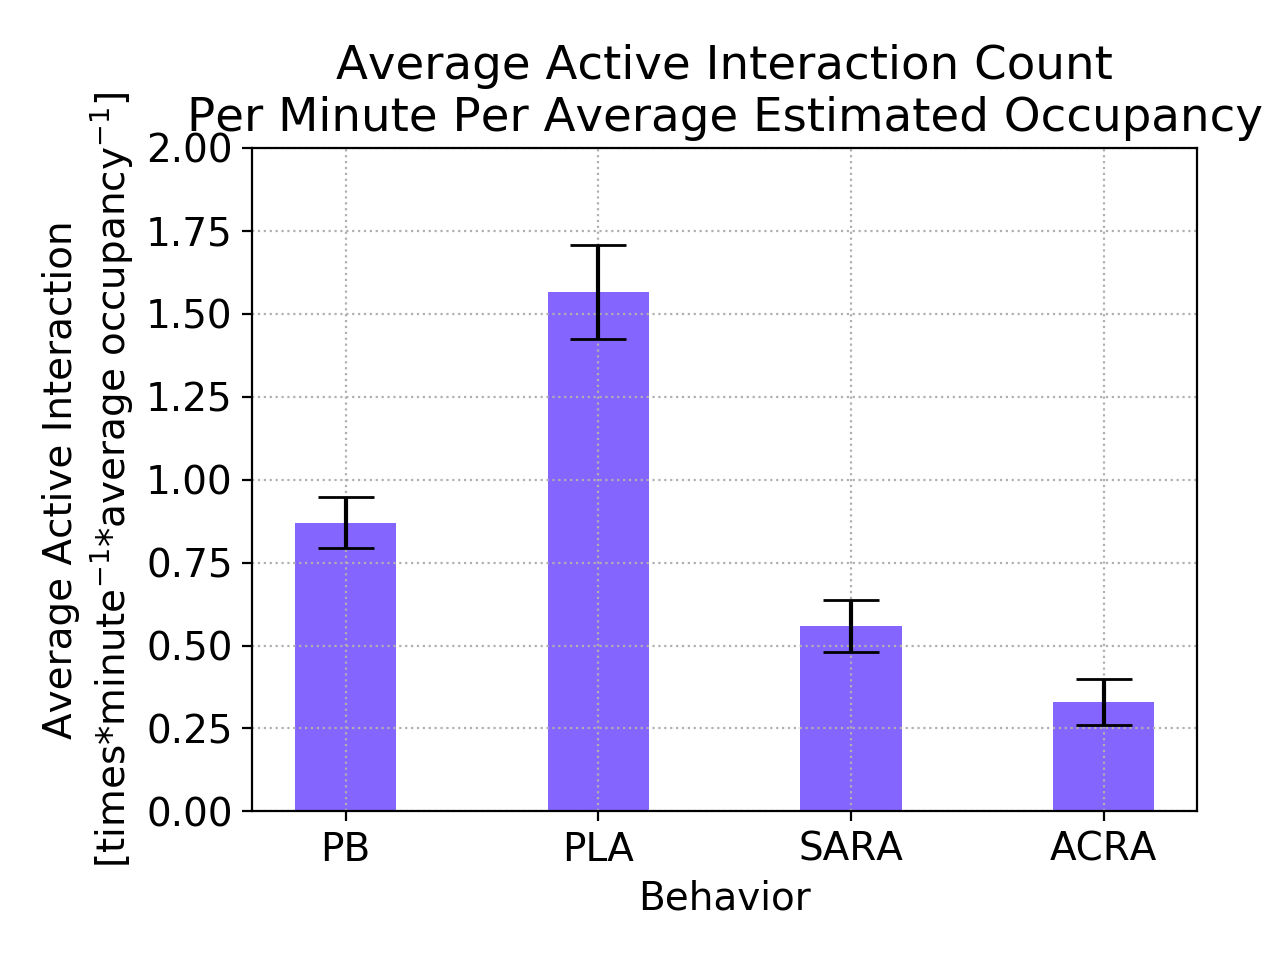

In [81]:
norm_active_interaction_PB_delete_zero = active_interaction_PB_delete_zero/ point_avg_PB.mean()
norm_active_interaction_PLA_delete_zero = active_interaction_PLA_delete_zero/ point_avg_PLA.mean()
norm_active_interaction_SARA_delete_zero = active_interaction_SARA_delete_zero/ point_avg_SARA.mean()
norm_active_interaction_ACRA_delete_zero = active_interaction_ACRA_delete_zero/ point_avg_ACRA.mean()

avrage_norm_active_interaction = [norm_active_interaction_PB_delete_zero.mean(),
                                  norm_active_interaction_PLA_delete_zero.mean(),
                                  norm_active_interaction_SARA_delete_zero.mean(),
                                  norm_active_interaction_ACRA_delete_zero.mean()]
std_norm_active_interaction = [norm_active_interaction_PB_delete_zero.std(),
                                  norm_active_interaction_PLA_delete_zero.std(),
                                  norm_active_interaction_SARA_delete_zero.std(),
                                  norm_active_interaction_ACRA_delete_zero.std()]
SEM_norm_active_interaction = [norm_active_interaction_PB_delete_zero.std()/np.sqrt(norm_active_interaction_PB_delete_zero.shape[0]),
                                  norm_active_interaction_PLA_delete_zero.std()/np.sqrt(norm_active_interaction_PLA_delete_zero.shape[0]),
                                  norm_active_interaction_SARA_delete_zero.std()/np.sqrt(norm_active_interaction_SARA_delete_zero.shape[0]),
                                  norm_active_interaction_ACRA_delete_zero.std()/np.sqrt(norm_active_interaction_ACRA_delete_zero.shape[0])]

plt.figure()
plt.bar(np.arange(0,4), avrage_norm_active_interaction,  yerr=SEM_norm_active_interaction, capsize=10, 
        color=(0.2, 0, 1, 0.6), width=0.4)
plt.ylabel('Average Active Interaction\n[times*minute$^{-1}$*average occupancy$^{-1}$]')
# plt.ylim(0,activate_interaction_average_ylim)
plt.ylim(0,2)
plt.xlabel('Behavior')
plt.xticks(np.arange(0,4),['PB', 'PLA', 'SARA', 'ACRA'])
plt.title('Average Active Interaction Count\nPer Minute Per Average Estimated Occupancy')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.savefig('./figures/Average_Active_Interaction_Count_Per_Average_Occupancy.png', dpi=300)

<IPython.core.display.Javascript object>


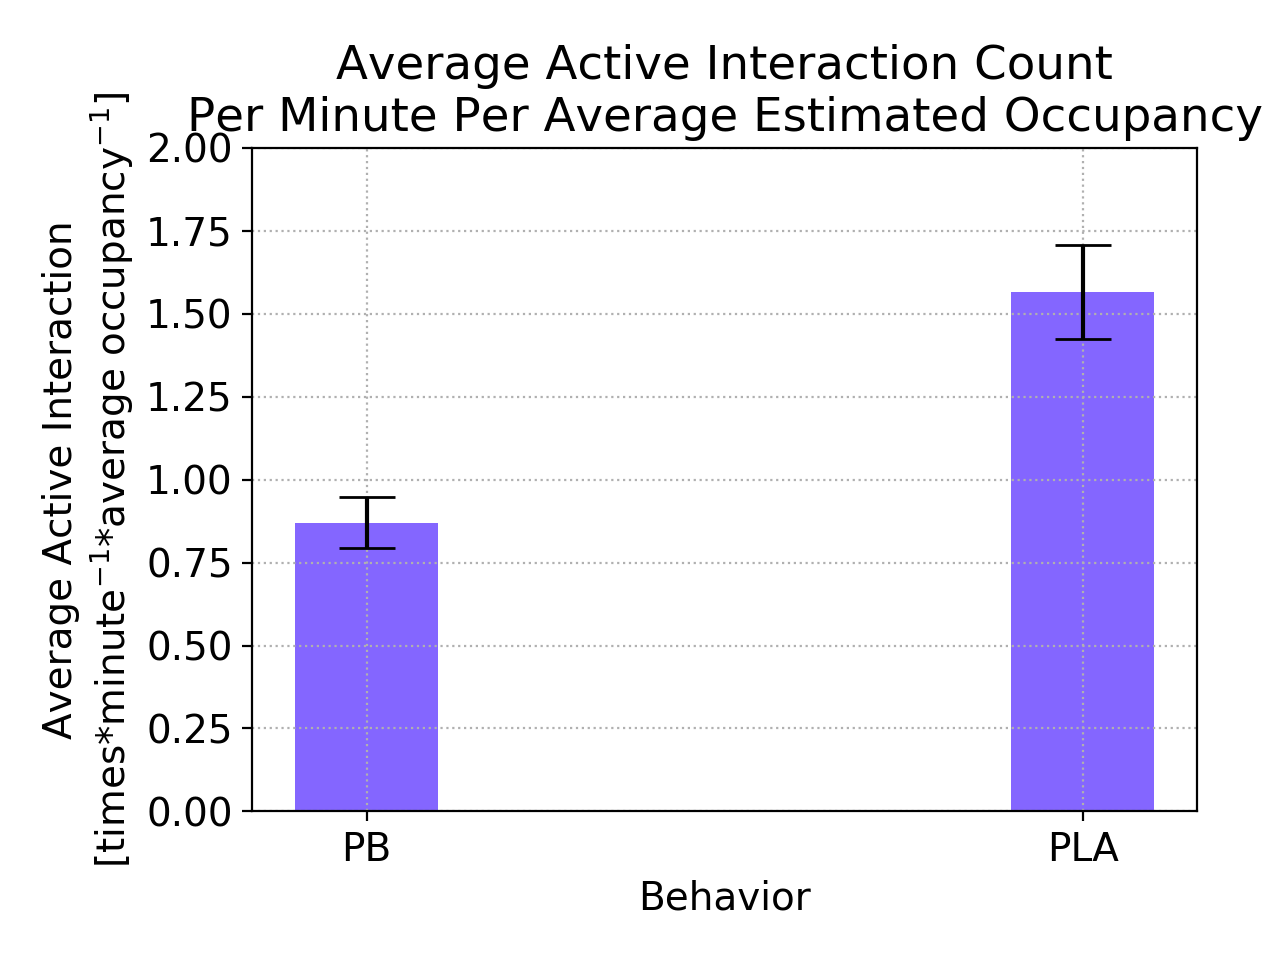

In [124]:
norm_active_interaction_PB_delete_zero = active_interaction_PB_delete_zero/ point_avg_PB.mean()
norm_active_interaction_PLA_delete_zero = active_interaction_PLA_delete_zero/ point_avg_PLA.mean()

avrage_norm_active_interaction = [norm_active_interaction_PB_delete_zero.mean(),
                                  norm_active_interaction_PLA_delete_zero.mean()]
std_norm_active_interaction = [norm_active_interaction_PB_delete_zero.std(),
                                  norm_active_interaction_PLA_delete_zero.std()]
SEM_norm_active_interaction = [norm_active_interaction_PB_delete_zero.std()/np.sqrt(norm_active_interaction_PB_delete_zero.shape[0]),
                                  norm_active_interaction_PLA_delete_zero.std()/np.sqrt(norm_active_interaction_PLA_delete_zero.shape[0])]

plt.figure()
plt.bar(np.arange(0,2), avrage_norm_active_interaction,  yerr=SEM_norm_active_interaction, capsize=10, 
        color=(0.2, 0, 1, 0.6), width=0.2)
plt.ylabel('Average Active Interaction\n[times*minute$^{-1}$*average occupancy$^{-1}$]')
# plt.ylim(0,activate_interaction_average_ylim)
plt.ylim(0,2)
plt.xlabel('Behavior')
plt.xticks(np.arange(0,2),['PB', 'PLA'])
plt.title('Average Active Interaction Count\nPer Minute Per Average Estimated Occupancy')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.savefig('./figures/Average_Active_Interaction_Count_Per_Average_Occupancy.png', dpi=300)

<IPython.core.display.Javascript object>


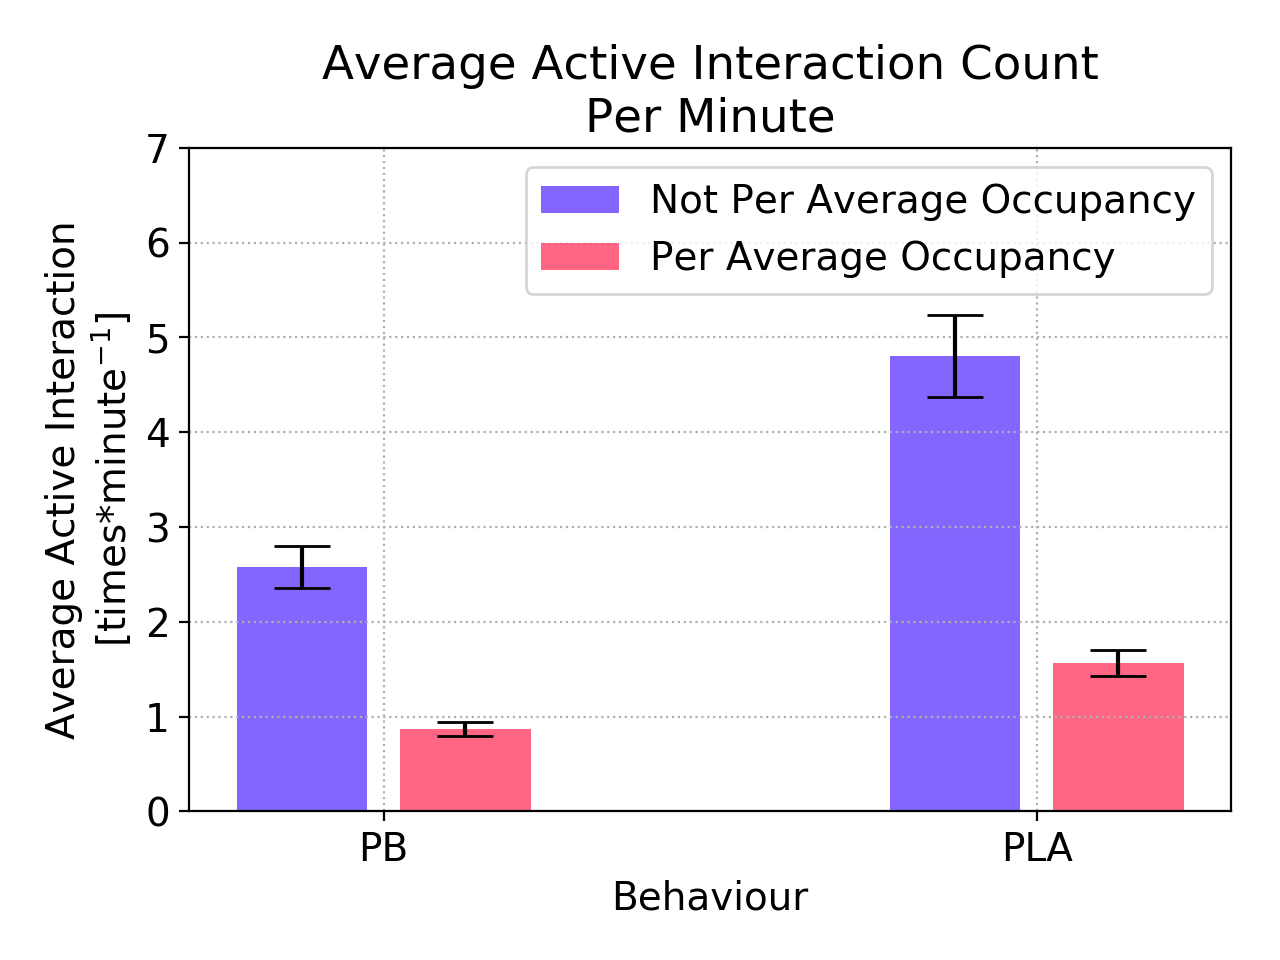

In [93]:
average_active_interaction = [active_interaction_PB_delete_zero.mean(),
                              active_interaction_PLA_delete_zero.mean()]
std_active_interaction = [active_interaction_PB_delete_zero.std(),
                              active_interaction_PLA_delete_zero.std()]
SEM_active_interaction = [active_interaction_PB_delete_zero.std()/np.sqrt(active_interaction_PB_delete_zero.shape[0]),
                              active_interaction_PLA_delete_zero.std()/np.sqrt(active_interaction_PLA_delete_zero.shape[0])]

norm_active_interaction_PB_delete_zero = active_interaction_PB_delete_zero/ point_avg_PB.mean()
norm_active_interaction_PLA_delete_zero = active_interaction_PLA_delete_zero/ point_avg_PLA.mean()

avrage_norm_active_interaction = [norm_active_interaction_PB_delete_zero.mean(),
                                  norm_active_interaction_PLA_delete_zero.mean()]
std_norm_active_interaction = [norm_active_interaction_PB_delete_zero.std(),
                                  norm_active_interaction_PLA_delete_zero.std()]
SEM_norm_active_interaction = [norm_active_interaction_PB_delete_zero.std()/np.sqrt(norm_active_interaction_PB_delete_zero.shape[0]),
                                  norm_active_interaction_PLA_delete_zero.std()/np.sqrt(norm_active_interaction_PLA_delete_zero.shape[0])]

plt.figure()
plt.bar(np.arange(0,2)-0.125, average_active_interaction,  yerr=SEM_active_interaction, 
        capsize=10, color=(0.2, 0, 1, 0.6), width=0.2)
plt.bar(np.arange(0,2)+0.125, avrage_norm_active_interaction,  yerr=SEM_norm_active_interaction,
        capsize=10, color=(1, 0, 0.2, 0.6), width=0.2)
plt.ylim(0,7)
plt.ylabel('Average Active Interaction\n[times*minute$^{-1}$]')
plt.xlabel('Behaviour')
plt.xticks(np.arange(0,2), ['PB', 'PLA'])
plt.title('Average Active Interaction Count\nPer Minute')
plt.grid(True, linestyle=':')
plt.legend(['Not Per Average Occupancy', 'Per Average Occupancy'])
plt.tight_layout()
plt.savefig('./figures/Average_Active_Interaction_Count', dpi=150)

In [82]:
# norm_active_interaction_PB_delete_zero = active_interaction_PB_delete_zero/ point_avg_PB.mean()
# norm_active_interaction_PLA_delete_zero = active_interaction_PLA_delete_zero/ point_avg_PLA.mean()
# norm_active_interaction_SARA_delete_zero = active_interaction_SARA_delete_zero/ point_avg_SARA.mean()
# norm_active_interaction_ACRA_delete_zero = active_interaction_ACRA_delete_zero/ point_avg_ACRA.mean()

# avrage_norm_active_interaction = [norm_active_interaction_PB_delete_zero.mean(),
#                                   norm_active_interaction_PLA_delete_zero.mean(),
#                                   norm_active_interaction_SARA_delete_zero.mean(),
#                                   norm_active_interaction_ACRA_delete_zero.mean()]

# plt.figure()
# plt.bar(np.arange(0,4), np.divide(average_active_interaction, average_occupancy_estimate),
#         color=(0.2, 0, 1, 0.6), width=0.4)
# plt.ylabel('Number of Active Interaction')
# plt.ylim(0,activate_interaction_average_ylim)
# plt.xlabel('Behavior')
# plt.xticks(np.arange(0,4),['PB', 'PLA', 'SARA', 'ACRA'])
# plt.title('Normalized Average Active Interaction Count')
# plt.grid(True, linestyle=':')
# plt.tight_layout()
# plt.savefig('./figures/Normalized_Average_of_Active_Interaction_Count.png', dpi=300)

In [83]:
with open('./cleaned_active_interaction_data/PB_active_interaction.pickle', 'rb') as handle:
    PB_data = pickle.load(handle)
    
with open('./cleaned_active_interaction_data/PLA_active_interaction.pickle', 'rb') as handle:
    PLA_data = pickle.load(handle)

with open('./cleaned_active_interaction_data/SARA_active_interaction.pickle', 'rb') as handle:
    SARA_data = pickle.load(handle)

with open('./cleaned_active_interaction_data/ACRA_active_interaction.pickle', 'rb') as handle:
    ACRA_data = pickle.load(handle)

KS_percentage_PB_PLA=0.2375, p_percentage_PB_PLA=0.0180
KS_decimal_PB_PLA=0.2375, p_decimal_PB_PLA=0.0180


<IPython.core.display.Javascript object>


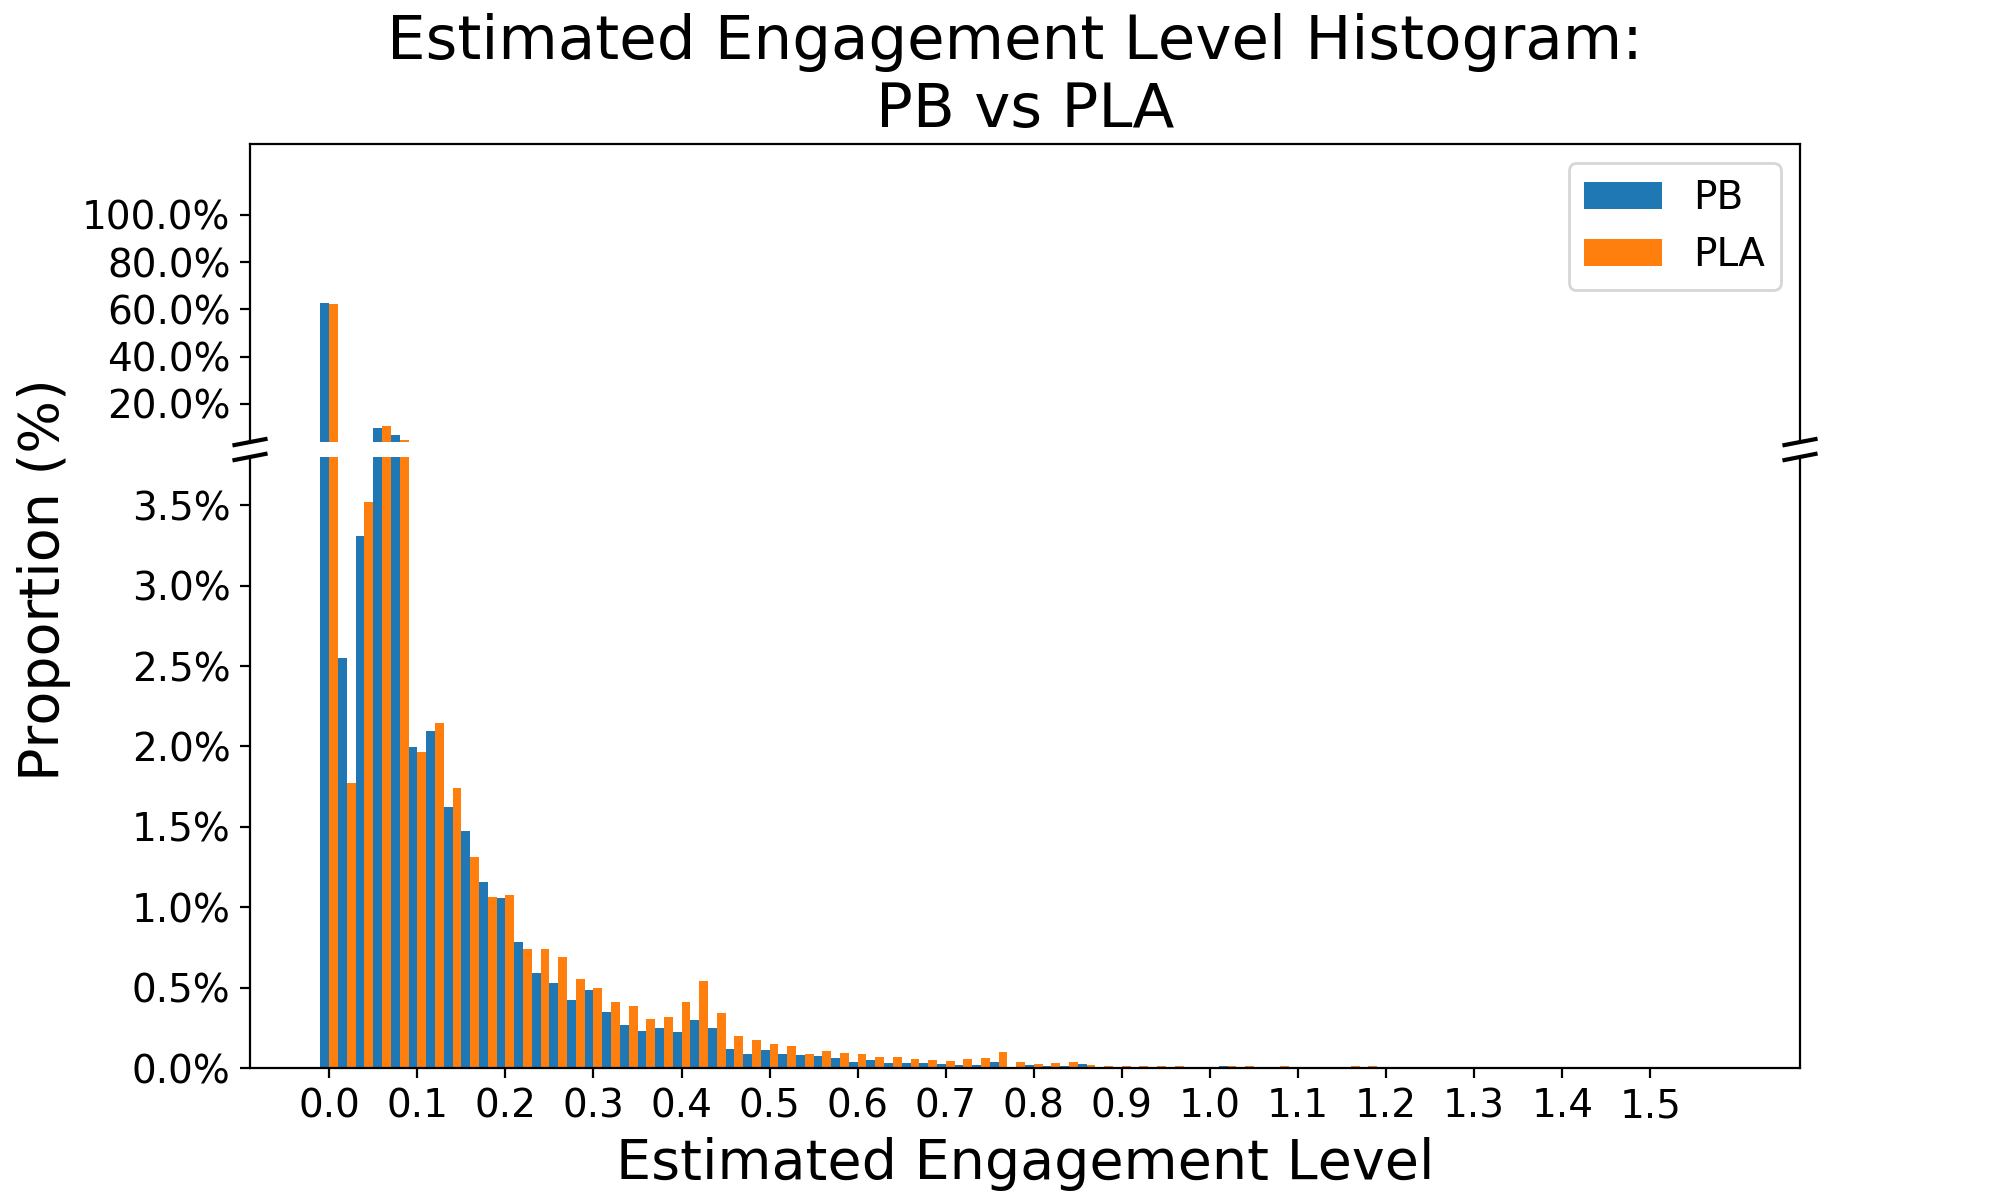

KS_percentage_SARA_ACRA=0.3125, p_percentage_SARA_ACRA=0.0006
KS_decimal_SARA_ACRA=0.3125, p_decimal_SARA_ACRA=0.0006


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


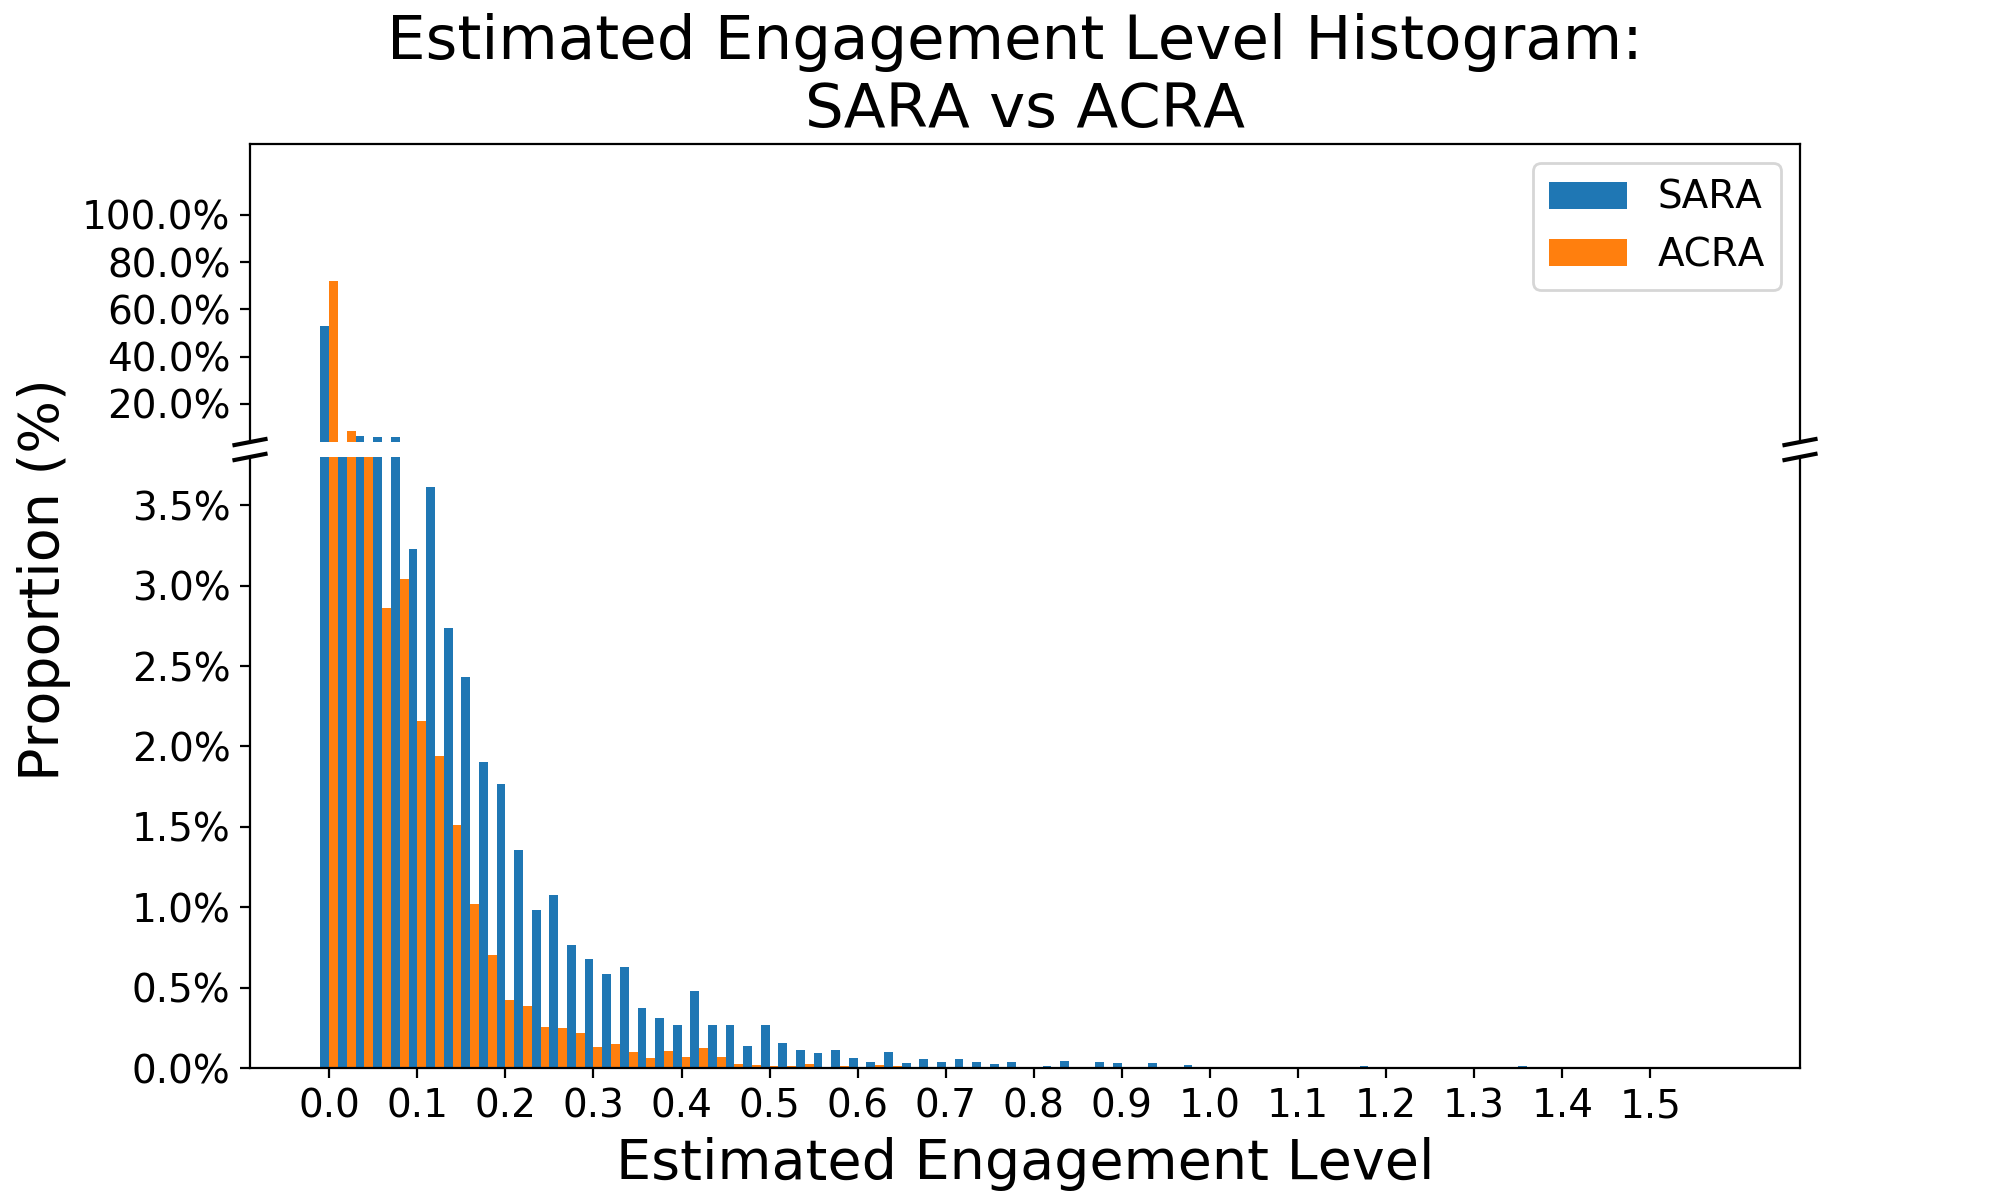

In [84]:
import matplotlib.gridspec as gridspec

def plot_reward_distribution(prescribed_behavior,para_learning_agent, 
                             behavior_name1='PB',behavior_name2='PLA',
                             reward_low = 0, reward_up = 2):

    
    bin_low = reward_low
    bin_up = reward_up
    bin_step = 0.02
    bins = np.arange(bin_low, bin_up+0.1*bin_step, bin_step)
    binWidth = 0.01

    # Prescribed Behavior
    reward_data_pb = prescribed_behavior['data']['reward_IR_distance'].astype(float).values
    reward_data_pb = reward_data_pb[reward_data_pb!=0] # remove 0
    hist_data_pb = reward_data_pb[reward_data_pb>=bin_low]
    hist_data_pb = hist_data_pb[hist_data_pb<bin_up]
    results_pb, edges_pb = np.histogram(hist_data_pb, bins)
    percentage_pb = (results_pb / sum(results_pb)) * 100

    # Parameterized Learning Agent
    reward_data_pla = para_learning_agent['data']['reward_IR_distance'].astype(float).values
    reward_data_pla = reward_data_pla[reward_data_pla!=0] # remove 0
    hist_data_pla = reward_data_pla[reward_data_pla>=bin_low]
    hist_data_pla = hist_data_pla[hist_data_pla<bin_up]
    results_pla, edges_pla = np.histogram(hist_data_pla, bins)
    percentage_pla = (results_pla / sum(results_pla)) * 100
    
    # Calculate KS-test
    from scipy import stats
    KS_percentage_PB_PLA, p_percentage_PB_PLA = stats.ks_2samp(percentage_pb, percentage_pla)
    KS_decimal_PB_PLA, p_decimal_PB_PLA = stats.ks_2samp(results_pb, results_pla)
    print('KS_percentage_{0}_{1}={2:.4f}, p_percentage_{0}_{1}={3:.4f}'.format(behavior_name1, 
                                                                               behavior_name2, 
                                                                               KS_percentage_PB_PLA, 
                                                                               p_percentage_PB_PLA))
    print('KS_decimal_{0}_{1}={2:.4f}, p_decimal_{0}_{1}={3:.4f}'.format(behavior_name1, 
                                                                         behavior_name2, 
                                                                         KS_decimal_PB_PLA, 
                                                                         p_decimal_PB_PLA))


    # Plot figure with subplots of different sizes
#     fig = plt.figure(figsize=(10,6))
    fig = plt.figure(figsize=(10,6))
    # set up subplot grid
    gs = gridspec.GridSpec(3,1,hspace=0.05)
    ax= plt.subplot(gs[0,:])
    ax2 = plt.subplot(gs[1:,:])

    ax.bar(edges_pb[:-1]-binWidth/2, percentage_pb, binWidth)
    ax.bar(edges_pla[:-1]+binWidth/2, percentage_pla, binWidth)
    ax.legend([behavior_name1, behavior_name2])
    
    ax2.bar(edges_pb[:-1]-binWidth/2, percentage_pb, binWidth)
    ax2.bar(edges_pla[:-1]+binWidth/2, percentage_pla, binWidth)
    
    # set y-axis
    if behavior_name1=='PB':
        ax_y_min = 3.8
    else:
        ax_y_min = 3.8
    ax.set_ylim(ax_y_min, 130)  # outliers only
    ax2.set_ylim(0, ax_y_min)  # most of the data

    ax.set_yticks(np.arange(20, 105, 20))
    ax2.set_yticks(np.arange(0, ax_y_min, 0.5))
    
    ax.set_yticklabels(['{:.1f}%'.format(abs(x)) for x in ax.get_yticks()])
    ax2.set_yticklabels(['{:.1f}%'.format(abs(x)) for x in ax2.get_yticks()])
    
    # set x-axis
    ax.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)

    d = .01  # how big to make the diagonal lines in axes coordinates
    # arguments to pass to plot, just so we don't keep repeating them
    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
    ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    d = .01
    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d, +d), (1 - d/2, 1 + d/2), **kwargs)  # bottom-left diagonal
    ax2.plot((1 - d, 1 + d), (1 - d/2, 1 + d/2), **kwargs)  # bottom-right diagonal

    ax.get_xaxis().set_visible(False)
    ax2.set_xticks(np.arange(reward_low, reward_up,0.1))
                                   

    ax.set_title('Estimated Engagement Level Histogram: \n{} vs {}'.format(behavior_name1, behavior_name2), fontsize=22)
    ax2.set_xlabel('Estimated Engagement Level', fontsize=20)
    ax2.set_ylabel('Proportion (%)', verticalalignment='top', fontsize=20)
    ax2.yaxis.set_label_coords(-0.15,0.8)
    plt.savefig('./figures/plot_estimated_engagement_level_distribution_in_range_0_1_6_{}_{}.png'.format(behavior_name1,behavior_name2), dpi=300)

    
plot_reward_distribution(PB_data,PLA_data, 
                         behavior_name1='PB',behavior_name2='PLA',
                         reward_low = 0, reward_up = 1.6)

plot_reward_distribution(SARA_data, ACRA_data, 
                         behavior_name1='SARA',behavior_name2='ACRA',
                         reward_low = 0, reward_up = 1.6)

# plot_reward_distribution(PB_PLA, SARA_ACRA, 
#                          behavior_name1='PB&PLA',behavior_name2='SARA&ACRA',
#                          reward_low = 0, reward_up = 2)
